## Data Understanding & preparing

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

#### Reading the dataset

In [2]:
df = pd.read_csv("social_anxiety_dataset.csv")
df.head(10)

Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0  59.0   Other    Teacher          7.0                           2.4   
1  46.0  Female    Student          5.1                           5.4   
2  40.0   Other     Lawyer          5.1                           1.9   
3  40.0    Male      Nurse          7.6                           0.9   
4  26.0    Male      Other          6.7                           3.0   
5  53.0    Male    Student          8.7                           4.8   
6  32.0    Male      Nurse          5.9                           2.0   
7  36.0    Male   Musician          6.4                           4.0   
8  56.0   Other   Engineer          3.2                           4.5   
9  27.0   Other     Artist        -10.0                           2.4   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                      40.0                                  5     Yes   
1                     156.0                                 11     NaN   
2                     570.0                                 14     Yes   
3                     129.0                                  0      No   
4                      64.0                                 13      No   
5                     324.0                                  0     Yes   
6                     318.0                                 12      No   
7                     230.0                                  4     NaN   
8                     436.0                                  1      No   
9                       NaN                                  6     Yes   

  Family History of Anxiety  Stress Level (1-10)  ...  Sweating Level (1-5)  \
0                        No                    4  ...                     5   
1                        No                    3  ...                     4   
2                       Yes                    9  ...                     3   
3                        No                    9  ...                     2   
4                        No                   15  ...                     4   
5                       Yes                    1  ...                     5   
6                       Yes                    7  ...                     4   
7                       Yes                    1  ...                     2   
8                       Yes                    2  ...                     3   
9                        No                    7  ...                     1   

   Dizziness  Medication Therapy Sessions (per month) Recent Major Life Event  \
0         No          No                            0                     Yes   
1        Yes          No                            2                      No   
2         No          No                            6                     Yes   
3         No         NaN                            2                      No   
4         No         Yes                            0                     Yes   
5        Yes         NaN                            1                     Yes   
6         No         Yes                            4                      No   
7        Yes          No                            3                     Yes   
8         No         Yes                            2                      No   
9        Yes         Yes                            1                      No   

   Diet Quality (1-10) Anxiety Level (1-10)  Target  is_Anxious  \
0                  1.0                  2.0       0           0   
1                  1.0                  4.0       0           0   
2                  4.0                  9.0       1           1   
3                  2.0                  6.0       0           0   
4                  4.0                  3.0       0           0   
5                  8.0                  1.0       0           0   
6                 10.0                  5.0       0           0   
7                  7.0                  1.0       0           0   
8                  3

## Dataset information

### Column information 

**Age**:(numerical, continuous)The person's age (in years).

**Gender**:(Categorical, nominal) The person's gender (male, female, other).

**Occupation**:(Categorical, nominal) The person's job or working status(Teacher, Student, Lawyer, Nurse, Other, Musician,
                                               Engineer, Artist, Chef, Scientist, Athlete, Freelancer,Doctor)
                                               
**Sleep Hours**:(numerical, continuous) Number of hours of sleep per day.

**Physical Activity (hrs/week)**:(numerical, continuous) Amount of physical activity per week (in hours).

**Caffeine Intake (mg/day)**:(numerical, continuous) Daily caffeine intake (in milligrams).

**Alcohol Consumption (drinks/week)**:(numerical, continuous) Number of alcoholic drinks consumed per week.

**Smoking**:(Categorical, nominal) Smoking status (yes/no).

**Family History of Anxiety**:(Categorical, nominal) Family history of anxiety (whether anxiety runs in the person's family).

**Stress Level (1-10)**:(Categorical, ordinal) Individual stress level on a scale of 1 to 10.

**Heart Rate (bpm)**:(numerical, continuous) Heart rate per minute (beats per minute).

**Breathing Rate (breaths/min)**:(numerical, continuous) Number of breaths per minute.

**Sweating Level (1-5)**:(Categorical, ordinal) Sweating intensity on a scale of 1 to 5.

**Dizziness**:(Categorical, nominal) Presence or severity of dizziness (yes/no).

**Medication**:(Categorical, nominal) Use of anxiety-related medications (yes/no).

**Therapy Sessions (per month)**:(numerical, discrete) Number of therapy or counseling sessions per month.

**Recent Major Life Event**:(Categorical, nominal) A recent major event (yes/no).

**Diet Quality (1-10)**:(Categorical, ordinal) The quality of a person's diet on a scale of 1 to 10.

**Anxiety Level (1-10)**:(Categorical, ordinal) The person's anxiety level on a scale of 1 to 10.

**Target**:(Categorical) Target column for modeling (0 or 1).

**is_Anxious**:(Categorical) A binary variable (0 or 1) that indicates whether a person is anxious or not.

**Therapy History**:(Categorical, nominal) History of past therapy or counseling sessions('Group Therapy', 'Psychodynamic Therapy',
                                                                'Cognitive Behavioral Therapy (CBT)', 'No previous history')


In [3]:
shape = df.shape
print(f"The number of rows is {shape[0]}, and the number of columns is {shape[1]}.")

The number of rows is 2030, and the number of columns is 22.


In [4]:
print(f"Number of duplicate rows: {df.duplicated().sum()}.")

Number of duplicate rows: 0.


In [5]:
target = "is_Anxious"
print(f"The target variable of the dataset is the {target}.")

The target variable of the dataset is the is_Anxious.


#### dataset summary

In [6]:
information = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1968 non-null   float64
 1   Gender                             1911 non-null   object 
 2   Occupation                         2030 non-null   object 
 3   Sleep Hours                        1994 non-null   float64
 4   Physical Activity (hrs/week)       2030 non-null   float64
 5   Caffeine Intake (mg/day)           1936 non-null   float64
 6   Alcohol Consumption (drinks/week)  2030 non-null   int64  
 7   Smoking                            1924 non-null   object 
 8   Family History of Anxiety          2030 non-null   object 
 9   Stress Level (1-10)                2030 non-null   int64  
 10  Heart Rate (bpm)                   2030 non-null   int64  
 11  Breathing Rate (breaths/min)       2030 non-null   int64

In [7]:
df.describe()

Age  Sleep Hours  Physical Activity (hrs/week)  \
count  1968.000000  1994.000000                   2030.000000   
mean     39.921748     6.424624                      2.800246   
std      13.243754     2.161544                      2.233899   
min      18.000000   -10.000000                    -10.000000   
25%      29.000000     5.800000                      1.400000   
50%      40.000000     6.700000                      2.800000   
75%      51.000000     7.500000                      4.200000   
max      64.000000    11.000000                      9.200000   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
count               1936.000000                        2030.000000   
mean                 306.275826                           9.490148   
std                  208.012717                           6.028653   
min                    0.000000                         -10.000000   
25%                  177.750000                           5.000000   
50%                  277.500000                          10.000000   
75%                  391.000000                          15.000000   
max                 1500.000000                          19.000000   

       Stress Level (1-10)  Heart Rate (bpm)  Breathing Rate (breaths/min)  \
count          2030.000000       2030.000000                   2030.000000   
mean              6.028571         93.066502                     20.955665   
std               3.137269         23.313430                      5.182524   
min               1.000000         60.000000                     12.000000   
25%               3.000000         76.000000                     17.000000   
50%               6.000000         93.000000                     21.000000   
75%               9.000000        107.000000                     26.000000   
max              15.000000        220.000000                     29.000000   

       Sweating Level (1-5)  Therapy Sessions (per month)  \
count           2030.000000                   2030.000000   
mean               3.095567                      2.359113   
std                1.392697                      2.148642   
min                1.000000                      0.000000   
25%                2.000000                      1.000000   
50%                3.000000                      2.000000   
75%                4.000000                      3.000000   
max                5.000000                     10.000000   

       Diet Quality (1-10)  Anxiety Level (1-10)       Target   is_Anxious  
count          1952.000000           2030.000000  2030.000000  2030.000000  
mean              5.234119              3.922660     0.103448     0.103448  
std               2.884946              2.139176     0.304619     0.304619  
min               1.000000              1.000000     0.000000     0.000000  
25%               3.000000              2.000000     0.000000     0.000000  
50%               5.000000              4.000000     0.000000     0.000000  
75%               8.000000              5.000000     0.000000     0.000000  
max              10.000000             10.000000     1.000000     1.000000

## columns summary

#### Numeric data

In [8]:
# Creating a DataFrame for Numeric Data
def numerical_summary(dataframe , columns):
    
    # Calculate the values of each column and put them in a list Convert to a dataframe
    numerical_list = []
    
    for col in columns:
        numerical_list.append({
            'Count' : dataframe[col].count(),                 # Number of rows without values NAN
            'Unique' : len(dataframe[col].dropna().unique()), # Number of unique numbers
            'Min' : min(dataframe[col]),   # Minimum number of numbers
            'Max' : max(dataframe[col]),   # Maximum number of numbers
            'Range' : np.subtract(max(dataframe[col]) , min(dataframe[col])),  # Range of numbers
            'Mean' : dataframe[col].mean(),                   # Mean of numbers
            'Mode' : dataframe[col].value_counts().index[0],  # Mode of numbers
            'Q1' : dataframe[col].quantile(0.25),  # Quartile first 
            'Q2' : dataframe[col].quantile(0.5),   # Quartile second 
            'Q3' : dataframe[col].quantile(0.75),  # Quartile third
            'IQR' : np.subtract(dataframe[col].quantile(0.75), dataframe[col].quantile(0.25)), # Q3 - Q1
            'Std' : dataframe[col].std(),      # Standard deviation of numbers
            'Variance': dataframe[col].var(),  # Variance of numbers
            'Skewness' : stats.skew(dataframe[col]),     # Compute the Skewness 
            'Kurtosis' : stats.kurtosis(dataframe[col]), # Compute the kurtosis
            'CV' : (dataframe[col].std() / dataframe[col].mean()) * 100  # Compute the Coefficient of Variation
        })

    # Convert to a dataframe
    numerical_df = pd.DataFrame(numerical_list, index=columns)

    return(numerical_df)   

In [9]:
# Specifying numeric columns
numerical_col = ['Age',
                 'Sleep Hours',
                 'Physical Activity (hrs/week)',
                 'Caffeine Intake (mg/day)',
                 'Alcohol Consumption (drinks/week)',
                 'Stress Level (1-10)',
                 'Heart Rate (bpm)',
                 'Breathing Rate (breaths/min)',
                 'Sweating Level (1-5)',
                 'Therapy Sessions (per month)',
                 'Diet Quality (1-10)']

print(f"{len(numerical_col)} Numeric Columns:")
numerical_col

11 Numeric Columns:


['Age',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Caffeine Intake (mg/day)',
 'Alcohol Consumption (drinks/week)',
 'Stress Level (1-10)',
 'Heart Rate (bpm)',
 'Breathing Rate (breaths/min)',
 'Sweating Level (1-5)',
 'Therapy Sessions (per month)',
 'Diet Quality (1-10)']

In [10]:
numerical_summary(df , numerical_col)

Count  Unique   Min     Max   Range  \
Age                                 1968      47  18.0    64.0    46.0   
Sleep Hours                         1994      76 -10.0    11.0    21.0   
Physical Activity (hrs/week)        2030      89 -10.0     9.2    19.2   
Caffeine Intake (mg/day)            1936     544   0.0  1500.0  1500.0   
Alcohol Consumption (drinks/week)   2030      23 -10.0    19.0    29.0   
Stress Level (1-10)                 2030      11   1.0    15.0    14.0   
Heart Rate (bpm)                    2030      61  60.0   220.0   160.0   
Breathing Rate (breaths/min)        2030      18  12.0    29.0    17.0   
Sweating Level (1-5)                2030       5   1.0     5.0     4.0   
Therapy Sessions (per month)        2030      11   0.0    10.0    10.0   
Diet Quality (1-10)                 1952      10   1.0    10.0     9.0   

                                         Mean    Mode      Q1     Q2     Q3  \
Age                                 39.921748    45.0   29.00   40.0   51.0   
Sleep Hours                          6.424624     6.7    5.80    6.7    7.5   
Physical Activity (hrs/week)         2.800246     2.8    1.40    2.8    4.2   
Caffeine Intake (mg/day)           306.275826  1500.0  177.75  277.5  391.0   
Alcohol Consumption (drinks/week)    9.490148     9.0    5.00   10.0   15.0   
Stress Level (1-10)                  6.028571    10.0    3.00    6.0    9.0   
Heart Rate (bpm)                    93.066502   110.0   76.00   93.0  107.0   
Breathing Rate (breaths/min)        20.955665    26.0   17.00   21.0   26.0   
Sweating Level (1-5)                 3.095567     4.0    2.00    3.0    4.0   
Therapy Sessions (per month)         2.359113     1.0    1.00    2.0    3.0   
Diet Quality (1-10)                  5.234119     3.0    3.00    5.0    8.0   

                                      IQR         Std      Variance  Skewness  \
Age                                 22.00   13.243754    175.397026       NaN   
Sleep Hours                          1.70    2.161544      4.672273       NaN   
Physical Activity (hrs/week)         2.80    2.233899      4.990306 -1.438129   
Caffeine Intake (mg/day)           213.25  208.012717  43269.290289       NaN   
Alcohol Consumption (drinks/week)   10.00    6.028653     36.344654 -0.258778   
Stress Level (1-10)                  6.00    3.137269      9.842456  0.081265   
Heart Rate (bpm)                    31.00   23.313430    543.516029  2.195311   
Breathing Rate (breaths/min)         9.00    5.182524     26.858556 -0.129388   
Sweating Level (1-5)                 2.00    1.392697      1.939606 -0.098560   
Therapy Sessions (per month)         2.00    2.148642      4.616662  1.052257   
Diet Quality (1-10)                  5.00    2.884946      8.322915       NaN   

                                    Kurtosis         CV  
Age                                      NaN  33.174284  
Sleep Hours                              NaN  33.644681  
Physical Activity (hrs/week)        7.727575  79.775096  
Caffeine Intake (mg/day)                 NaN  67.916792  
Alcohol Consumption (drinks/week)  -0.561056  63.525383  
Stress Level (1-10)                -0.626166  52.040005  
Heart Rate (bpm)                   10.607367  25.050292  
Breathing Rate (breaths/min)       -1.177937  24.730898  
Sweating Level (1-5)               -1.246719  44.990062  
Therapy Sessions (per month)        0.661876  91.078364  
Diet Quality (1-10)                      NaN  55.118090

#### Categorical data

In [11]:
# Creating a DataFrame for Category Data
def category_summary(dataframe , columns):

    # Calculate the values of each column and put them in a list Convert to a dataframe
    category_list = []
    
    for col in columns:
        category_list.append({
            'Count' : dataframe[col].count(),  # Number of categories without NAN
            'Unique' : len(dataframe[col].dropna().unique()),  # Number of unique categories
            'Mode': dataframe[col].value_counts().index[0]     # Mode of each column
        })

    # Convert to a dataframe
    category_df = pd.DataFrame(category_list, index=columns)

    return(category_df)    

In [12]:
# Specifying Category columns
category_col = ['Gender',
                'Occupation',
                'Smoking',
                'Family History of Anxiety',
                'Dizziness',
                'Medication',
                'Recent Major Life Event',
                'is_Anxious']
print(f"{len(category_col)} Category Columns:")
category_col

8 Category Columns:


['Gender',
 'Occupation',
 'Smoking',
 'Family History of Anxiety',
 'Dizziness',
 'Medication',
 'Recent Major Life Event',
 'is_Anxious']

In [13]:
category_summary(df , category_col)

Count  Unique     Mode
Gender                      1911       3   Female
Occupation                  2030      13  Student
Smoking                     1924       2      Yes
Family History of Anxiety   2030       2      Yes
Dizziness                   2030       2      Yes
Medication                  1921       2      Yes
Recent Major Life Event     2030       2      Yes
is_Anxious                  2030       2        0

In [14]:
null_value = df.isnull().sum()
print("Columns that have the NAN value:")
null_value[null_value > 0]

Columns that have the NAN value:


Age                           62
Gender                       119
Sleep Hours                   36
Caffeine Intake (mg/day)      94
Smoking                      106
Medication                   109
Diet Quality (1-10)           78
Therapy History             1827
dtype: int64

In [15]:
for column in category_col :
    print(f"{column}: {df[column].unique()}\n")

Gender: ['Other' 'Female' 'Male' nan]

Occupation: ['Teacher' 'Student' 'Lawyer' 'Nurse' 'Other' 'Musician' 'Engineer'
 'Artist' 'Chef' 'Scientist' 'Athlete' 'Freelancer' 'Doctor']

Smoking: ['Yes' nan 'No']

Family History of Anxiety: ['No' 'Yes']

Dizziness: ['No' 'Yes']

Medication: ['No' nan 'Yes']

Recent Major Life Event: ['Yes' 'No']

is_Anxious: [0 1]



## preparing

#### feature selection
Based on the statistics, some columns have identical values and some columns have many null values that can be removed:
1. **Therapy History**: Due to having many null values.
2. **Target & Anxiety Level (1-10)**: The output was the same as the 'is_Anxious' column.

## Visualization

In [16]:
def boxplot_outliers(data, column):
    # Draw the subplots, in 2 columns and 7 rows
    fig , ax = plt.subplots(4, 3, figsize=(18,15))

    fig.suptitle(f"Check for outliers before data cleaning\n", fontsize=20, fontweight="bold")
    
    # Draw a boxplot for each column, specifying the title
    for col, ax in zip(column, ax.flatten()):
        sns.boxplot(y=data[col].dropna(), ax=ax)
        ax.set_title(col)
    
    plt.tight_layout()
    plt.show()

In [17]:
def numerical_chart(data, column, target):

    info = data.groupby([column, target], observed=False).size().unstack()
    
    # Draw Plot with 1 row and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(20,10))

    #-------- Row 1 ---------
    # General title
    fig.suptitle(f"{column} vs {target}", fontsize=16, fontweight="bold")
    
    # Histogram with KDE
    sns.histplot(data[column], kde=True, ax=axes[0,0])
    axes[0,0].set_title("Histogram with KDE")
    
    # Boxplot
    sns.boxplot(x=data[column], ax=axes[0,1])
    axes[0,1].set_title("Boxplot")

    # QQ Plot with shapiro test
    _, p_value = stats.shapiro(data[column])
    (osm, osr), (slope, intercept, r) = stats.probplot(data[column], dist="norm")
    axes[0,2].scatter(osm, osr)
    axes[0,2].set_title(f"QQ Plot\n P Value(Shapiro test) = {p_value:.5f}")

    #-------- Row 2 ----------
    info.plot(kind="bar",ax=axes[1,0])
    axes[1,0].set_title(f"Stacked Histogram of {column}")
    
   
    # kdeplot chart to examine the impact of the target variable
    sns.kdeplot(data=data, x=column, hue=target, fill=True, ax=axes[1,1])
    axes[1,1].set_title(f"KDE of {column} by {target}")

    # Normalized Stacked Bar Chart
    normalized = info.div(info.sum(axis=1), axis=0)  # Normalization (each column sum = 1)
    normalized.plot(kind="bar", stacked=True,ax=axes[1,2])
    axes[1,2].set_title(f"Per-bin Proportion(100% Stacked) of {column}")
    
    # Adjust the distance between graphs
    plt.tight_layout()
    plt.show()

In [18]:
def categories_table(data, column, target):
    # Required data
    freq = data[column].value_counts().to_frame()
    freq["Percentage"] = (freq / freq.sum()) * 100
    info = data.groupby([column, target], observed=False).size().unstack()
    info_percentage = info.div(info.sum(axis=1), axis=0) * 100 

    # Draw Plot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # General title
    fig.suptitle(f"{column} vs {target}", fontsize=16, fontweight="bold")

    # table 1
    sns.heatmap(freq, annot=True, fmt='.2f', cmap='Blues',ax=axes[0])
    axes[0].set_title("Category Frequency")

    # table 2
    sns.heatmap(info, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[0].set_title("Count by Category and Target")

    # table 3
    sns.heatmap(info_percentage, annot=True, fmt='.2f', cmap='Blues', ax=axes[2])
    axes[0].set_title("Percentage by Category and Target")
    
    # Adjust the distance between graphs
    plt.tight_layout()
    plt.show()    

In [19]:
def categories_chart(data, column, target):
    # Required data
    freq = data[column].value_counts()
    info = data.groupby([column, target], observed=False).size().unstack()
    
    # Draw Plot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # General title
    fig.suptitle(f"{column} vs {target}", fontsize=16, fontweight="bold")
    
    # Plot 1 - requency Bar Chart
    axes[0].bar(freq.index, freq.values)
    axes[0].set_title("Frequency Bar Chart")
    
    # Plot 2 - Grouped Bar Chart
    info.plot(kind="bar", ax=axes[1])
    axes[1].set_title("Grouped Bar Chart")
    
    # Plot 3 - Normalized Stacked Bar Chart
    normalized = info.div(info.sum(axis=1), axis=0)  # Normalization (each column sum = 1)
    normalized.plot(kind="bar", stacked=True, ax=axes[2])
    axes[2].set_title("Normalized Stacked Bar Chart")

    #axes[2].pie(freq.values, labels=freq.index)
    #axes[2].set_title("Pie Chart")
    
    
    # Adjust the distance between graphs
    plt.tight_layout()
    plt.show()

In [20]:
def show_category_data(data, column, target):
    """
    Row 1: Show Tables
    Row 2: Show Charts
    """
    categories_table(data, column, target)
    categories_chart(data, column, target)

## ‌Binning

In [21]:
def binning(data, column, bins, labels):
    
    data[column] = pd.cut(data[column],
                          bins=bins, 
                          labels=labels,
                          include_lowest=[True])

    #return data

## Reclassifying

In [22]:
def reclassifying(data, column, mapping):
    # mapping : Dictionary
    data[column] = data[column].replace(mapping)

    #return data

## Statistical tests

In [23]:
def statistical_tests(data, column1, column2):

    group0 = data[column1]
    group1 = data[column2]

    def shapiro(group0, group1):
        _ , p_value1 = stats.shapiro(group0)
        _ , p_value2 = stats.shapiro(group1)
        return (p_value1, p_value2)

    def normalization(group0, group1):
        pt = PowerTransformer(method='yeo-johnson')
        yj1 = pt.fit_transform(group0.values.reshape(-1,1)).flatten()
        yj2 = pt.fit_transform(group1.values.reshape(-1,1)).flatten()
        return yj1, yj2

    p_value1, p_value2 = shapiro(group0, group1)

    if p_value1 > 0.05 and p_value2 > 0.05:
        _ , p_value_test = stats.ttest_ind(group0, group1)
        print(f"Using T Test:")
        print(f"P Value:{p_value_test}\n The data is normally distributed.")
        
    else:
        print("The data distribution is not normal.\n normalize the data...")
        new_g1, new_g2 = normalization(group0, group1)
        p_v1, p_v2 = shapiro(new_g1, new_g2)
        
        if p_v1 > 0.05 and p_v2 > 0.05:
            _ , p_value_test = stats.ttest_ind(new_g1, new_g2)
            print(f"Using T Test:")
            print(f"P Value:{p_value_test}\n The data is normal now.")
            
        else:
            _ , p_value_test = stats.mannwhitneyu(group0, group1, alternative="two-sided")
            print(f"Using Mann–Whitney U test:")
            print(f"P Value:{p_value_test}\n The data is not normalized.")

    #return (p_value_test)

In [24]:
# To test the independence between a numeric categorical (ordinal) variable and a categorical target
def ordinal_chi2(data, column, target):
    """
    Tests independence between an ordinal/numeric categorical column and a target variable.
    Uses chi-square test similar to chi2 function but designed for ordinal data.
    """
    table = pd.crosstab(data[column], data[target])
    result = stats.chi2_contingency(table)
    
    print(f"{column} vs {target}")
    print(f"Chi-square statistic: {result[0]:.4f}")
    print(f"P Value: {result[1]:.4f}")
    
    if result[1] > 0.05:
        print("Result: Fail to reject the null hypothesis (H0)")
        print("→ No significant relationship between variables\n")
        return 'fail to reject the H0'
    else:
        print("Result: Reject the null hypothesis (H0)")
        print("→ Significant relationship exists between variables\n")
        return 'reject the H0'

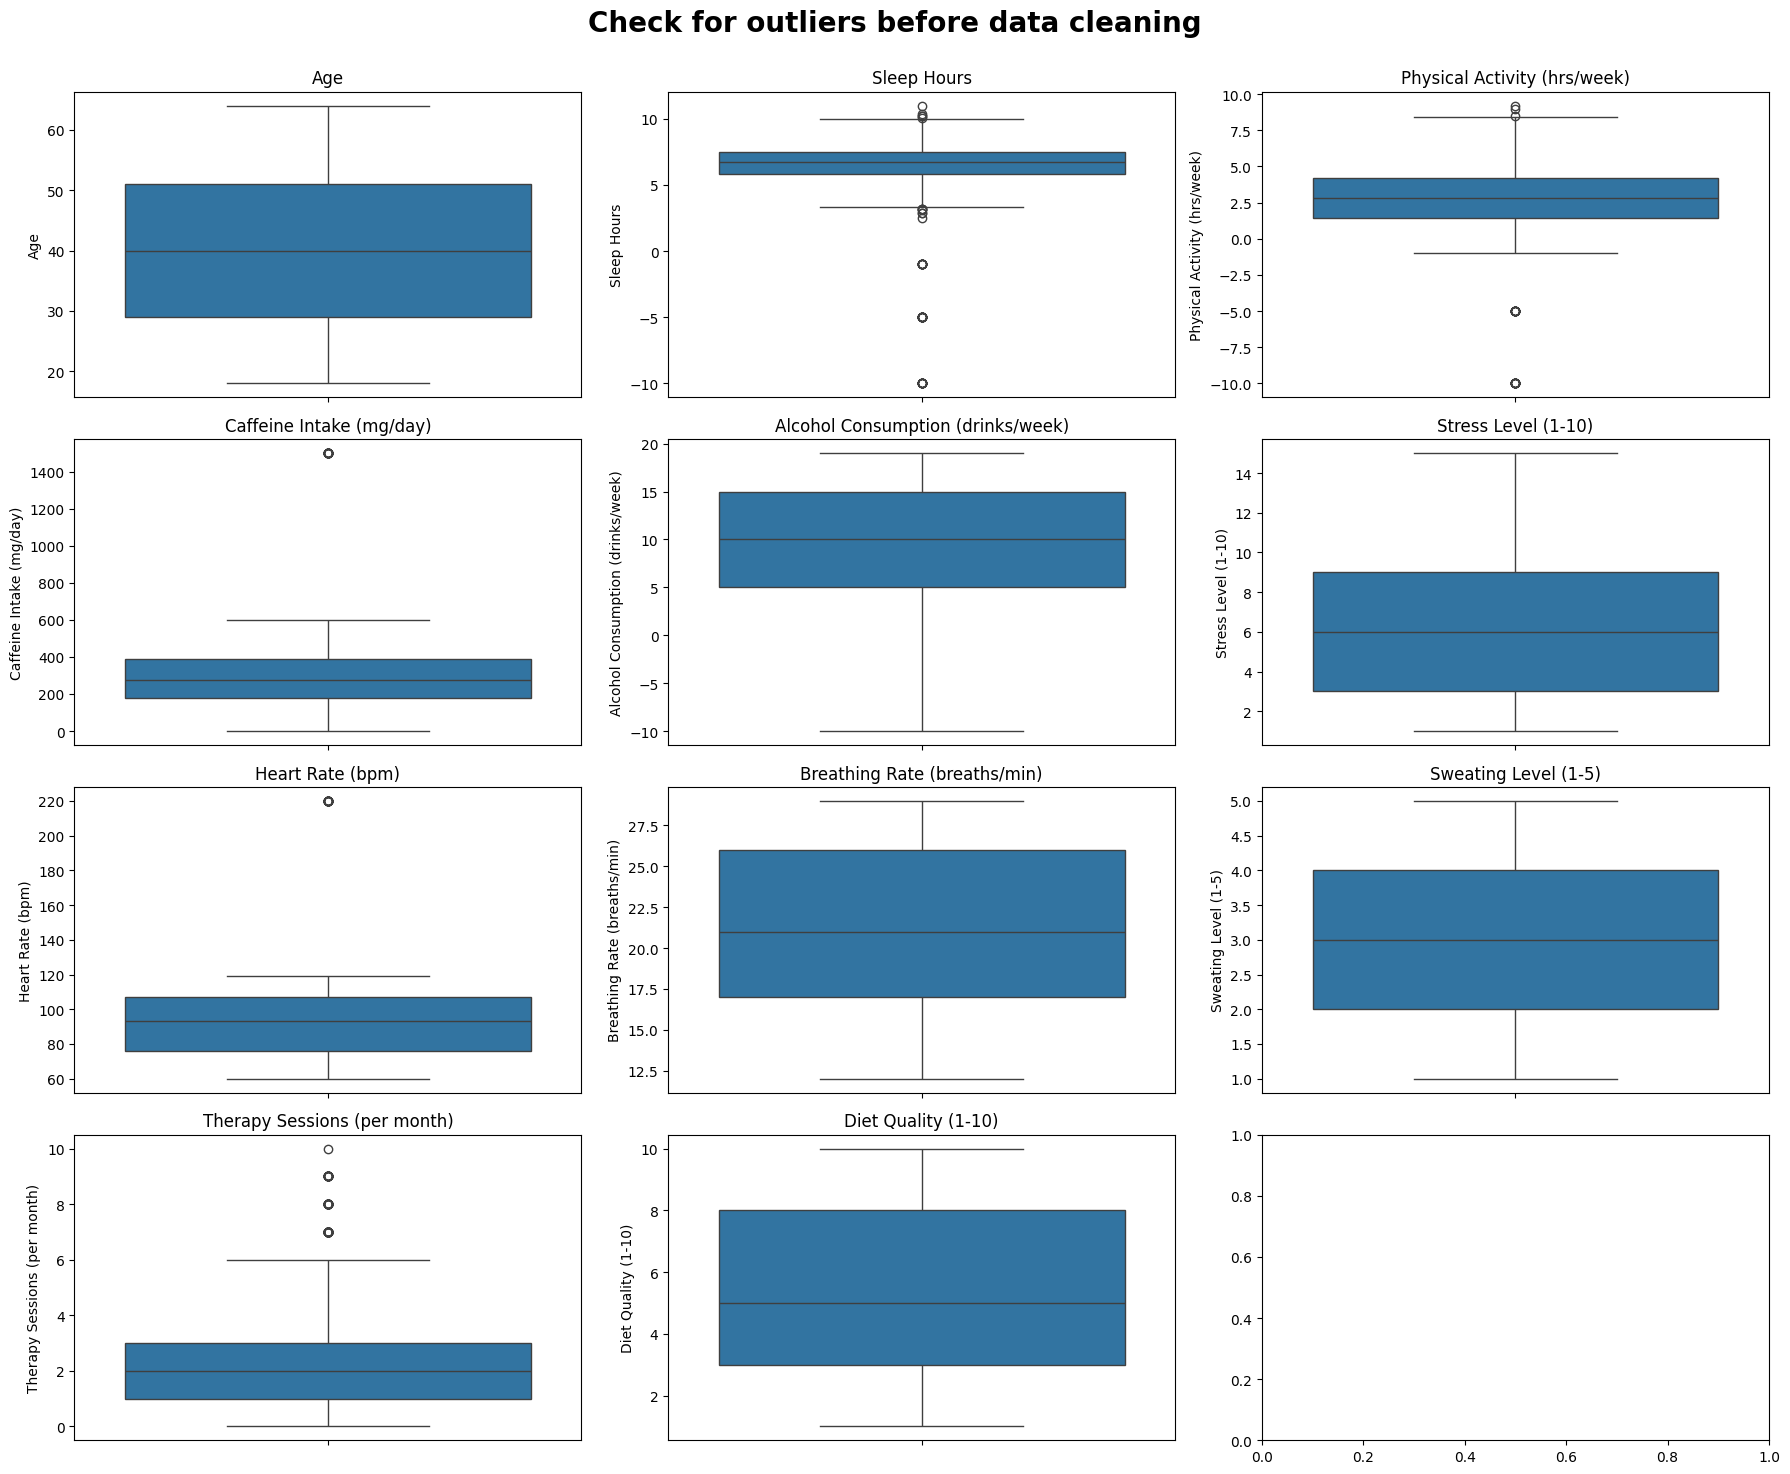

In [25]:
boxplot_outliers(df, numerical_col)

## Data Cleaning

#### Missing value and outlier

In [26]:
def replace_outliners(column , method):
    #replaces the outliners with one of the following methods (iqr - z score)
    
    column = column.astype(float).copy()
    
    def iqr (column) :
        # caculates the upper,lower with iqr 
        
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1 
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR 
        return upper, lower 


    def z_score (column):
        # caculates the upper,lower with z score 
        
        upper = column.mean() + (3 * column.std())
        lower = column.mean() - (3 * column.std())
        return upper, lower

    if method == 'iqr' :
        upper ,lower = iqr(column)

    elif method =='z_score' :
        upper ,lower = z_score(column)

    column[column > upper] = upper
    column[column < lower] = lower
    return column

In [27]:
def fillna(data, numeric_cols, qual_cols):
    
    for col_num in numeric_cols:
        data.fillna({col_num : data[col_num].median()}, inplace = True)

    for col_qual in qual_cols:
        data.fillna({col_qual : data[col_qual].mode()[0]}, inplace = True)

    return data

In [28]:
clip_list = ['Sleep Hours', 'Physical Activity (hrs/week)',
             'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)']

for col in clip_list:
    df[col] = df[col].clip(lower = 0)

#df['Stress Level (1-10)'] = df['Stress Level (1-10)'].clip(lower = 1 , upper = 10)

In [29]:
numeric_vars = ['Age', 'Sleep Hours', 'Caffeine Intake (mg/day)', 'Diet Quality (1-10)']
qual_vars = ['Occupation', 'Gender', 'Smoking', 'Medication']

df = fillna(df, numeric_vars, qual_vars)

In [30]:
replace_list = ['Age', 'Sleep Hours','Caffeine Intake (mg/day)', 
                'Alcohol Consumption (drinks/week)','Heart Rate (bpm)',
                'Physical Activity (hrs/week)', 'Therapy Sessions (per month)']

for col in replace_list:
    df[col] = replace_outliners(df[col],'iqr')

In [31]:
#df.info()

## Exploratory Data Analysis (EDA)

**Numeric columns**: Age, Sleep Hours, Physical Activity (hrs/week), Caffeine Intake (mg/day), Alcohol Consumption (drinks/week),
                     Heart Rate (bpm), Breathing Rate (breaths/min), Therapy Sessions (per month), Stress Level (1-10), Sweating Level (1-5),
                     Diet Quality (1-10)

**Category columns**: Gender, Occupation, Smoking, Family History of Anxiety, Dizziness,
                     Medication, Recent Major Life Event, is_Anxious

### Numeric 

#### Age

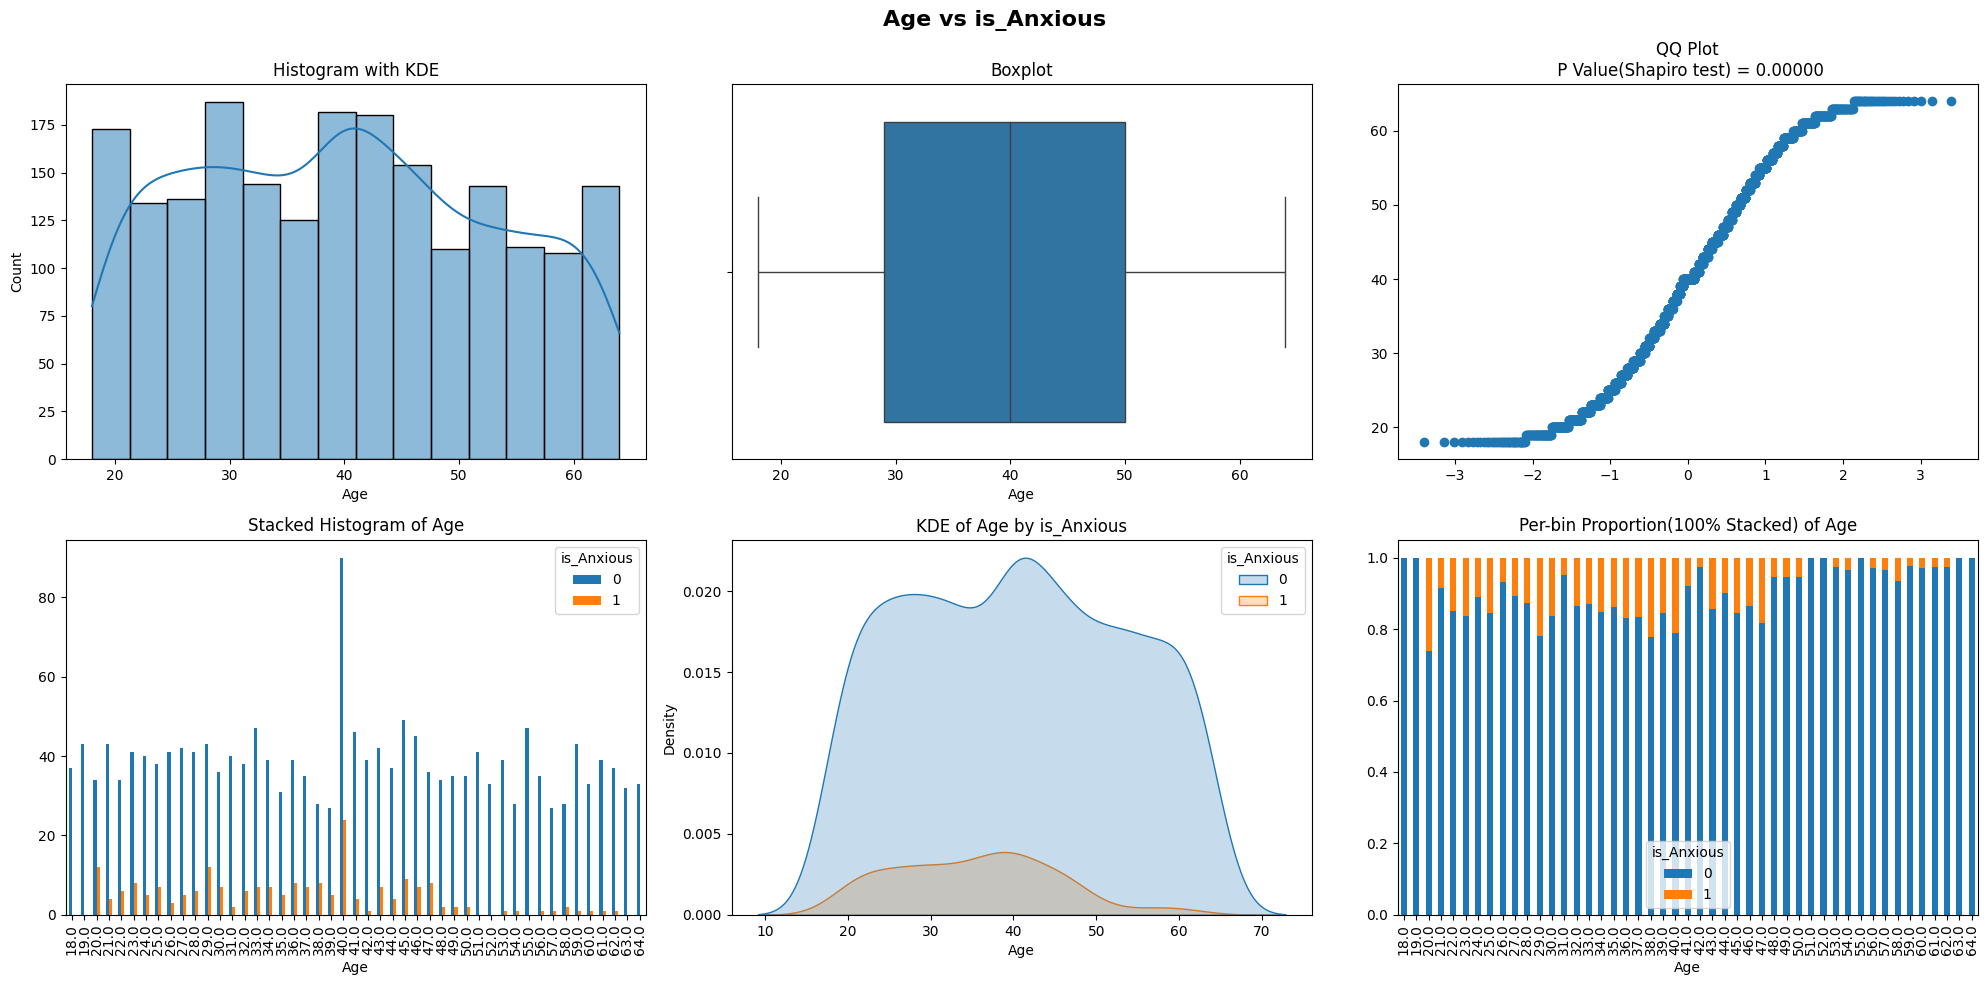

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [32]:
numerical_chart(df, "Age", "is_Anxious")
statistical_tests(df, "Age", "is_Anxious")

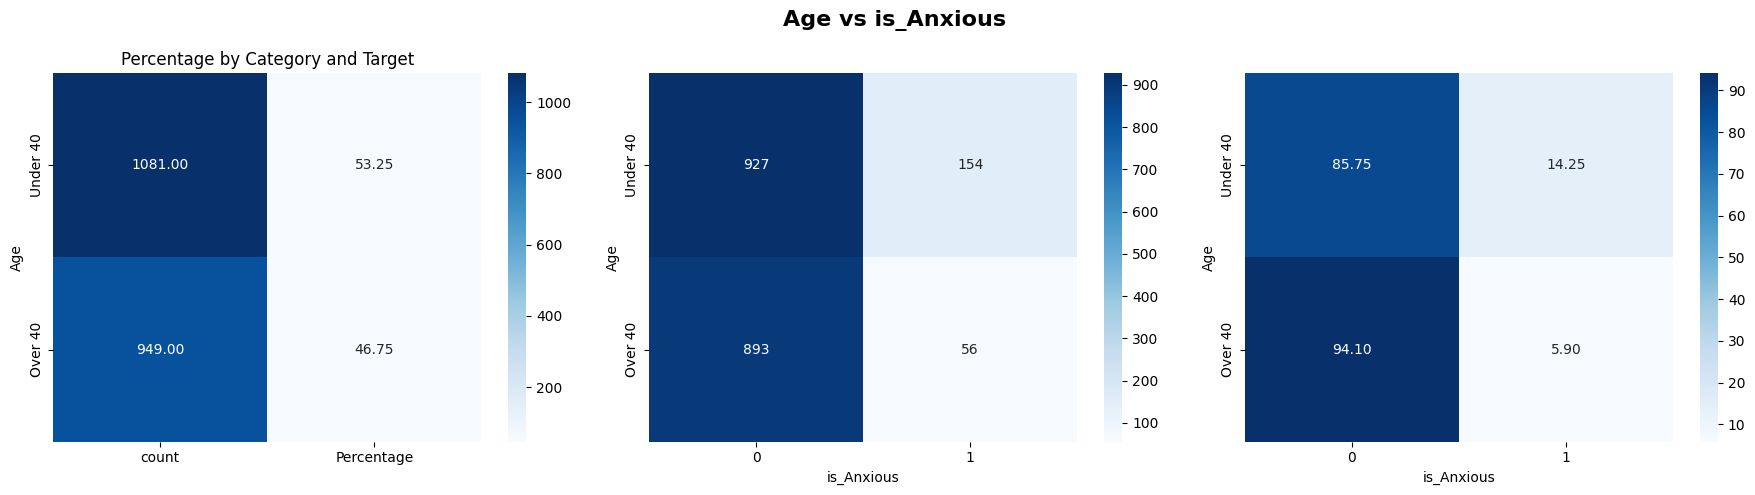

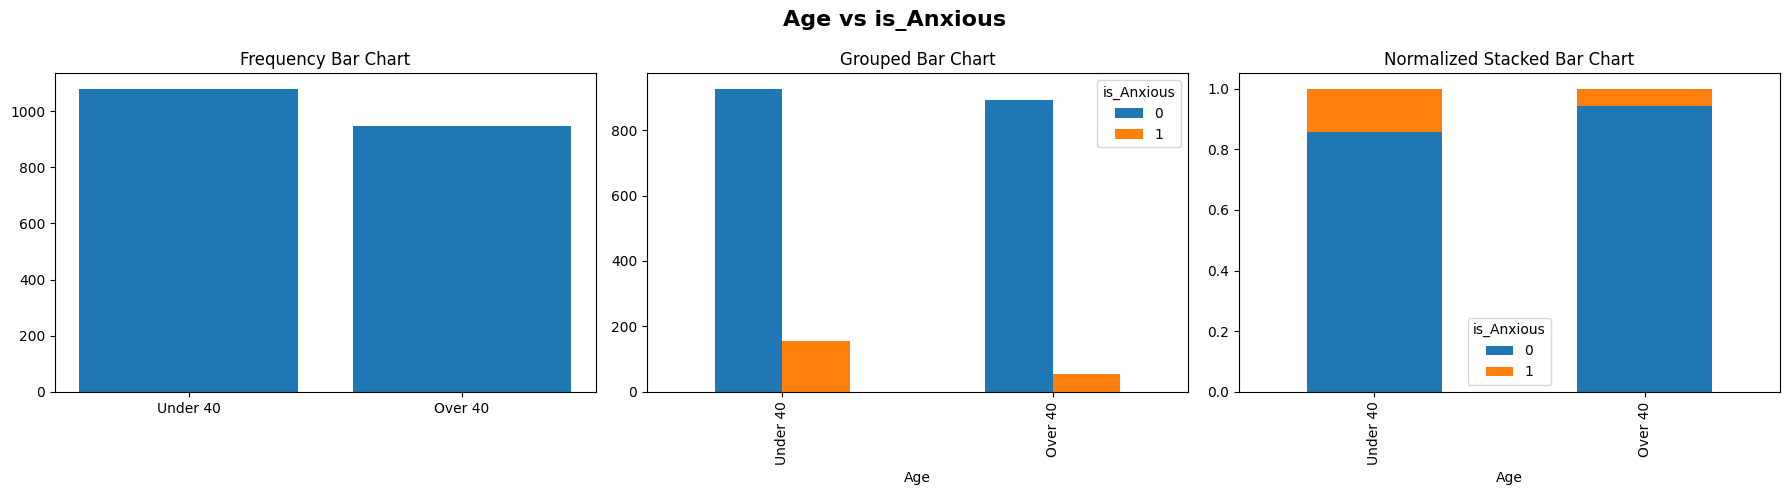

Age vs is_Anxious
Chi-square statistic: 37.0512
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [33]:
bins = [0,40,70]
labels = ["Under 40","Over 40"]
binning(df, "Age", bins, labels)

show_category_data(df, "Age", "is_Anxious")
ordinal_chi2(df, "Age", "is_Anxious")

#### Sleep Hours

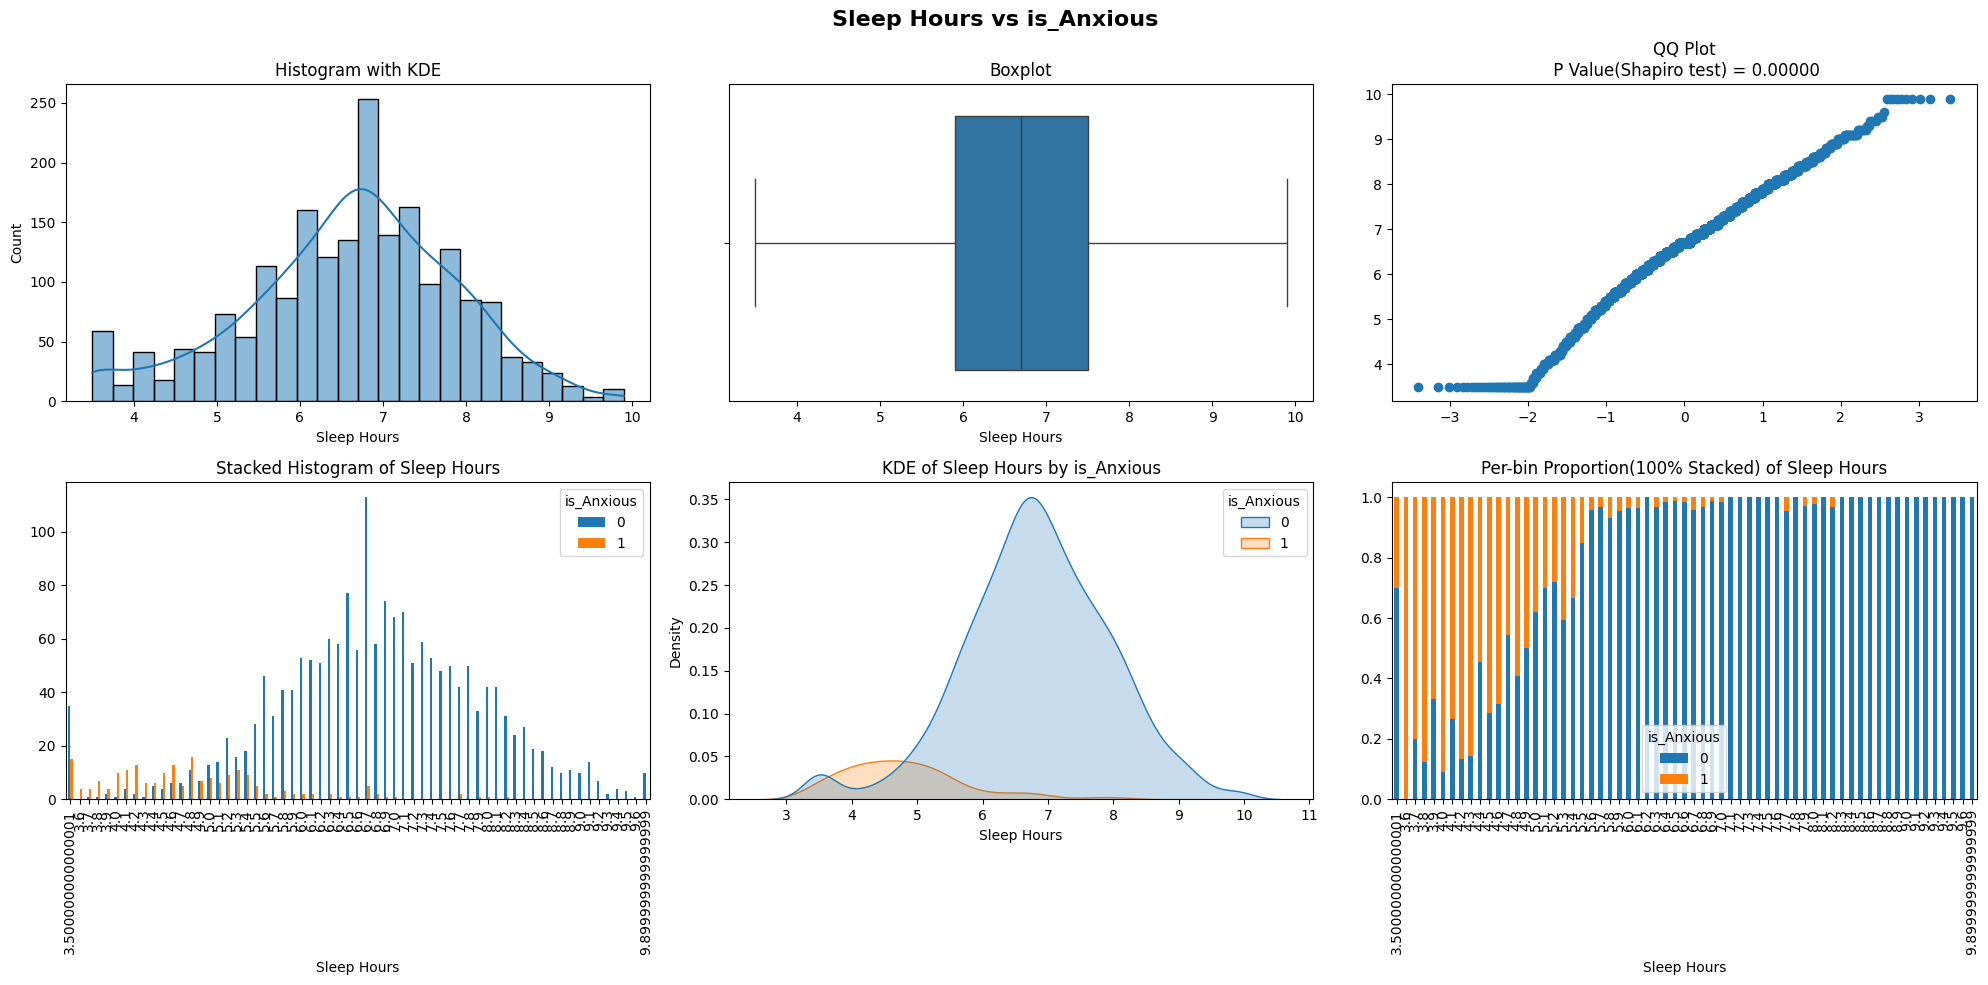

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [34]:
numerical_chart(df, "Sleep Hours", "is_Anxious")
statistical_tests(df, "Sleep Hours", "is_Anxious")

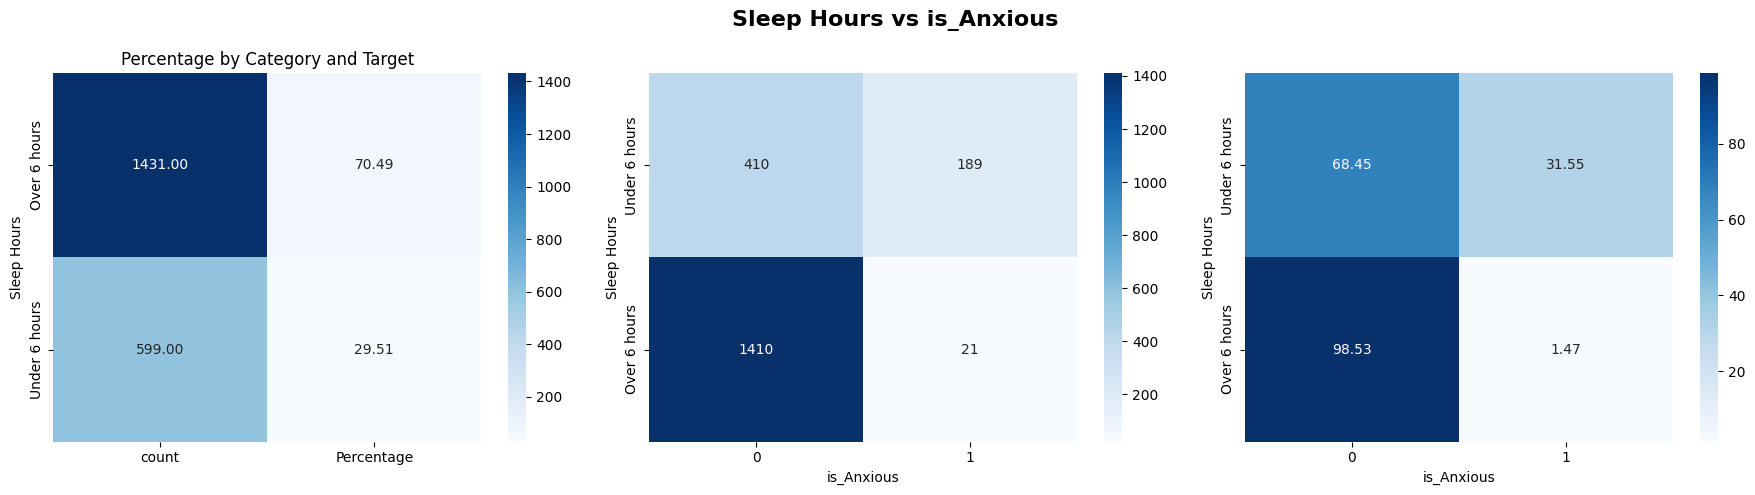

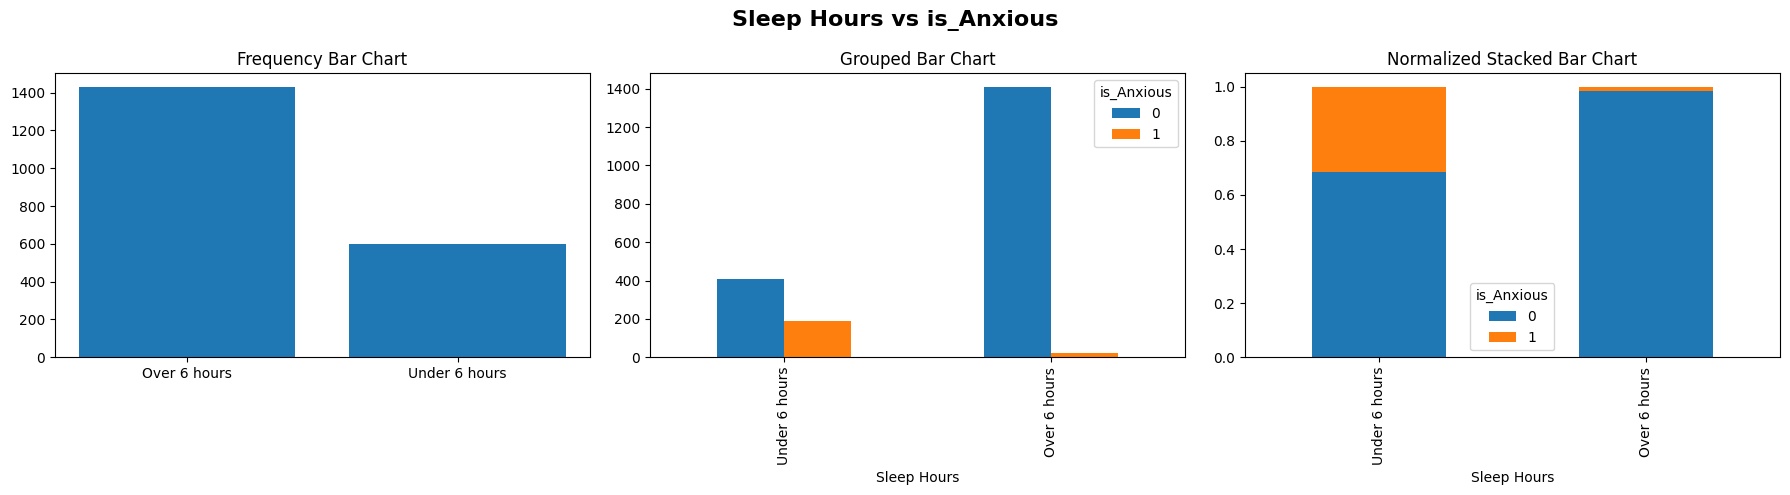

Sleep Hours vs is_Anxious
Chi-square statistic: 408.8357
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [35]:
bins = [0,6,10]
labels = ["Under 6 hours","Over 6 hours"]
binning(df, "Sleep Hours", bins, labels)

show_category_data(df, "Sleep Hours", "is_Anxious")
ordinal_chi2(df, "Sleep Hours", "is_Anxious")

#### Physical Activity (hrs/week)

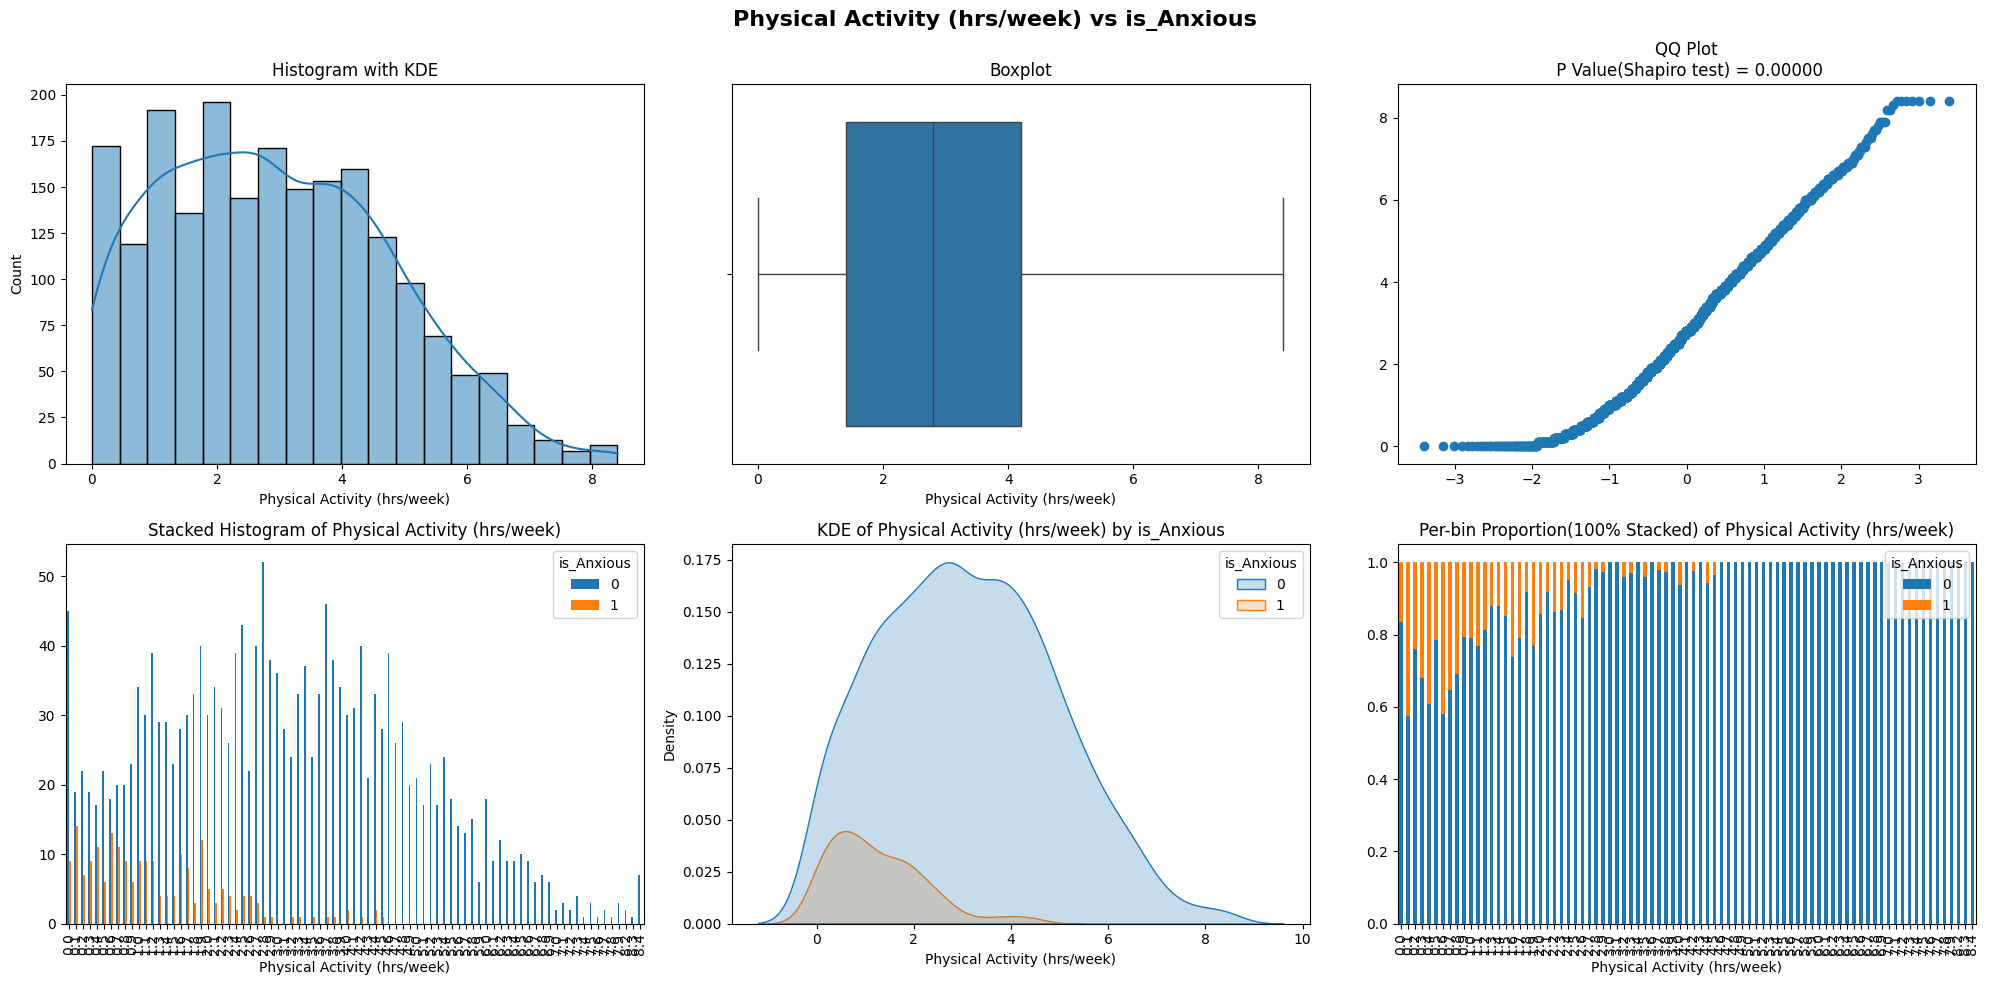

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [36]:
numerical_chart(df, "Physical Activity (hrs/week)", "is_Anxious")
statistical_tests(df, "Physical Activity (hrs/week)", "is_Anxious")

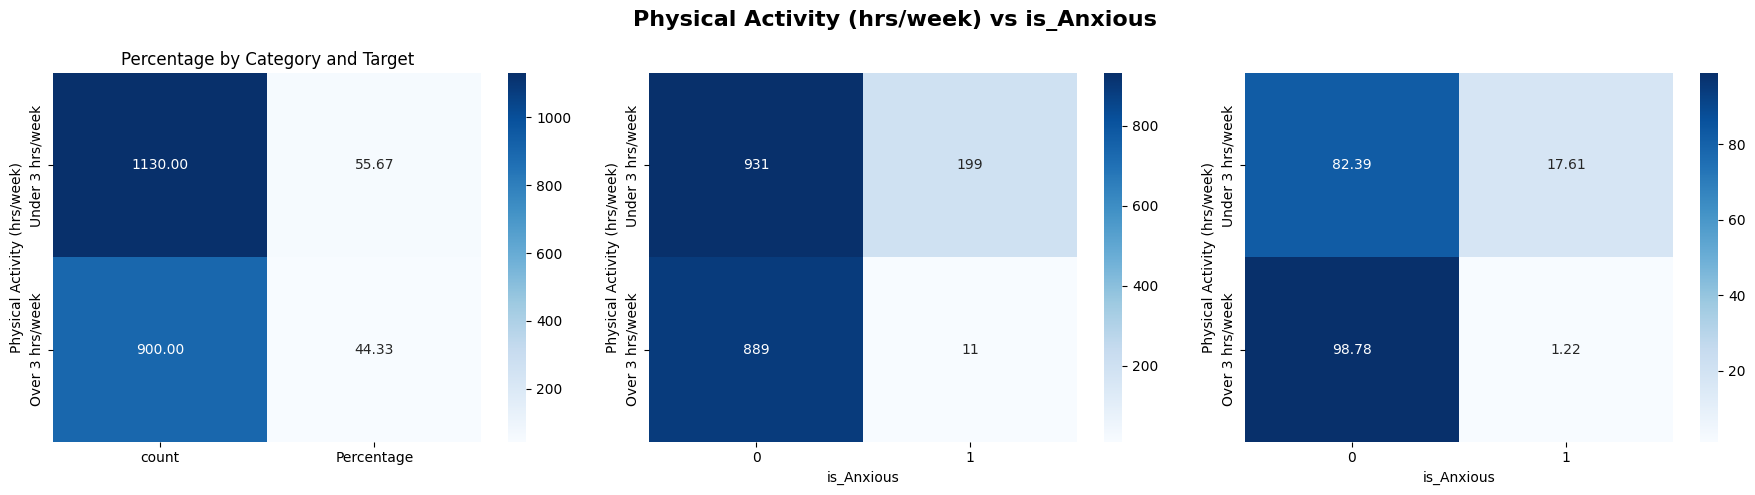

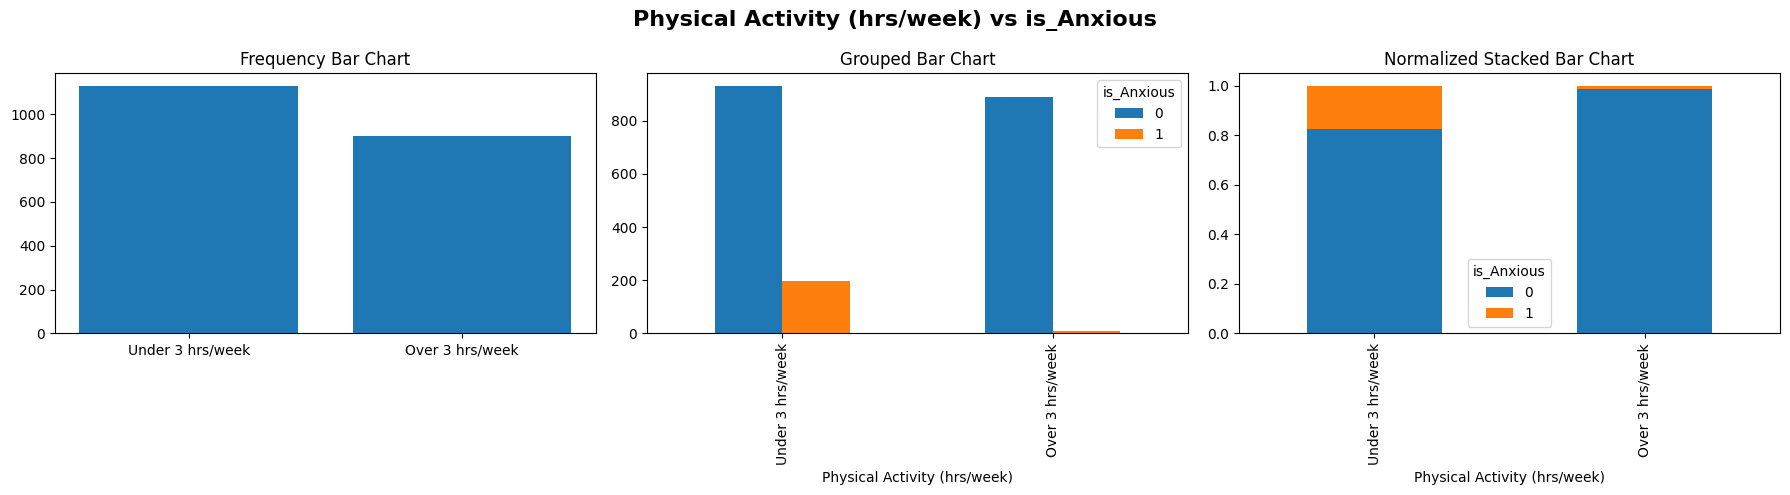

Physical Activity (hrs/week) vs is_Anxious
Chi-square statistic: 143.3156
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [37]:
bins = [0,3,10]
labels = ["Under 3 hrs/week","Over 3 hrs/week"]
binning(df, "Physical Activity (hrs/week)", bins, labels)

show_category_data(df, "Physical Activity (hrs/week)", "is_Anxious")
ordinal_chi2(df, "Physical Activity (hrs/week)", "is_Anxious")

#### Caffeine Intake (mg/day)

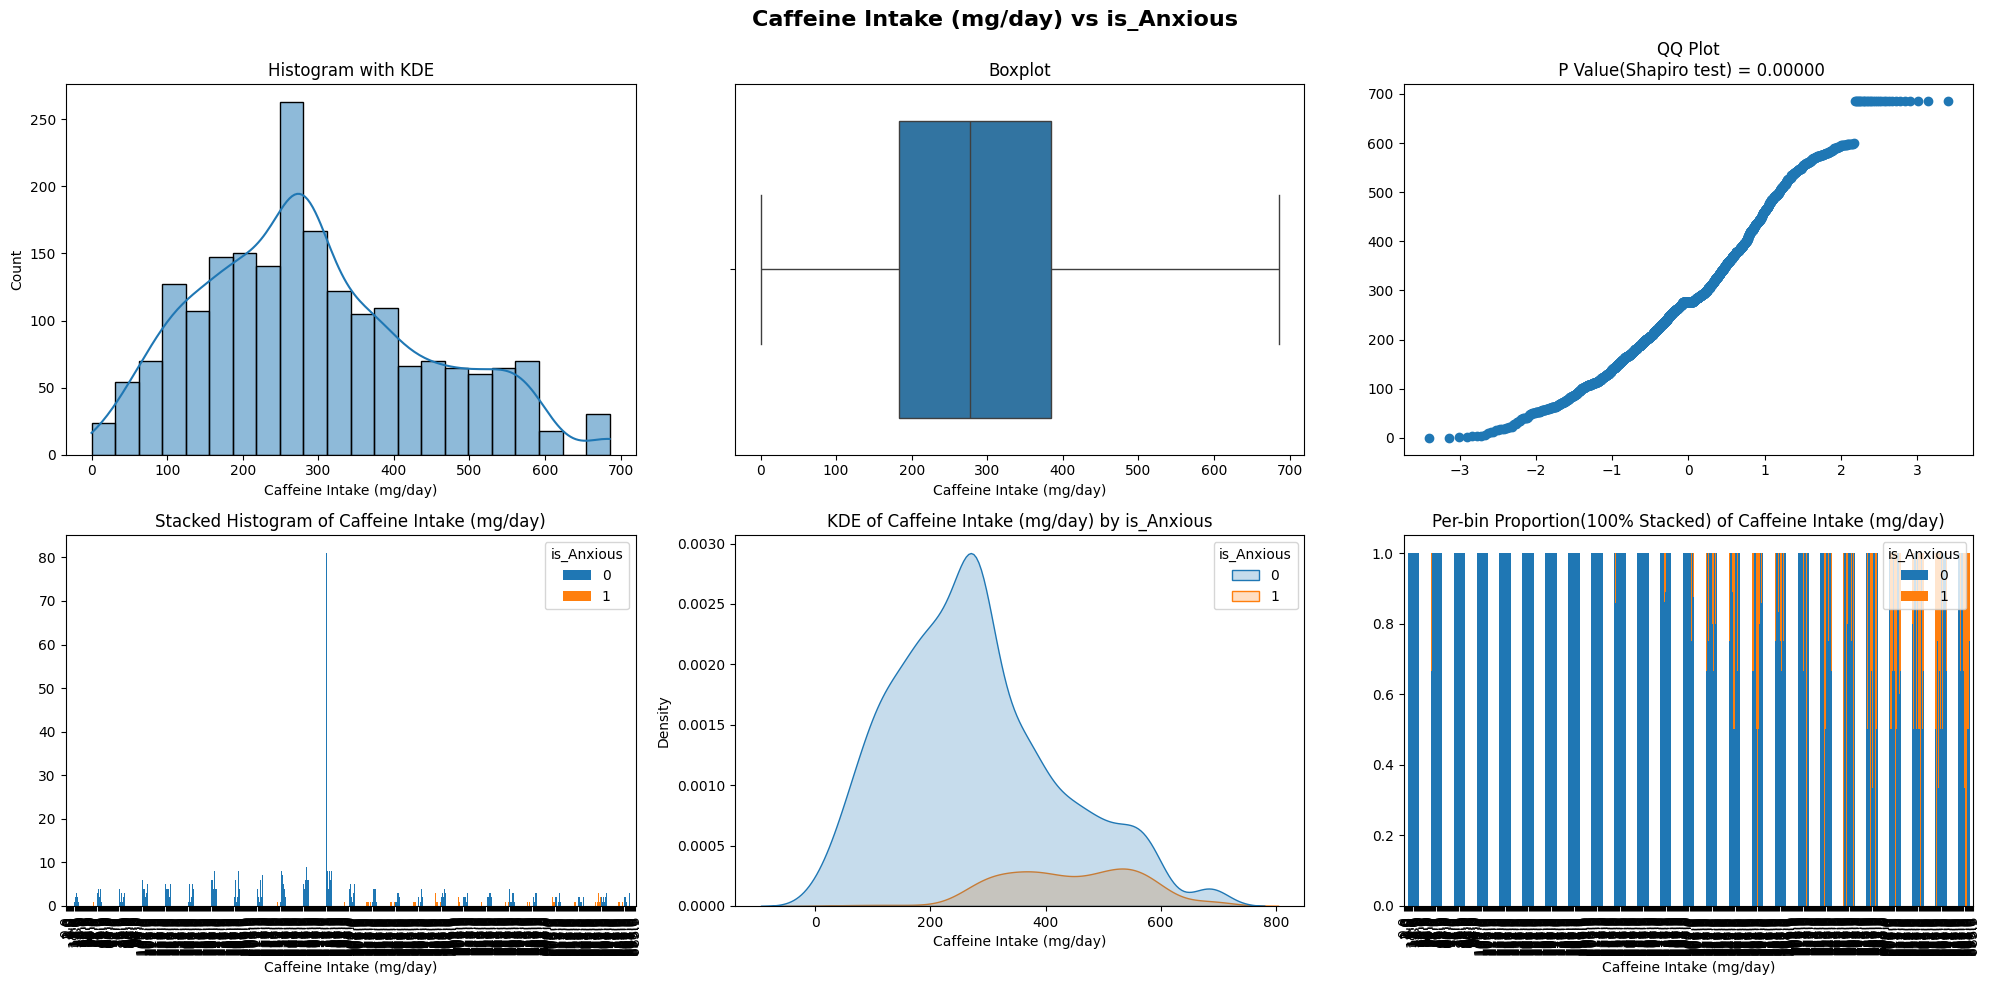

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [38]:
numerical_chart(df, "Caffeine Intake (mg/day)", "is_Anxious")
statistical_tests(df, "Caffeine Intake (mg/day)", "is_Anxious")

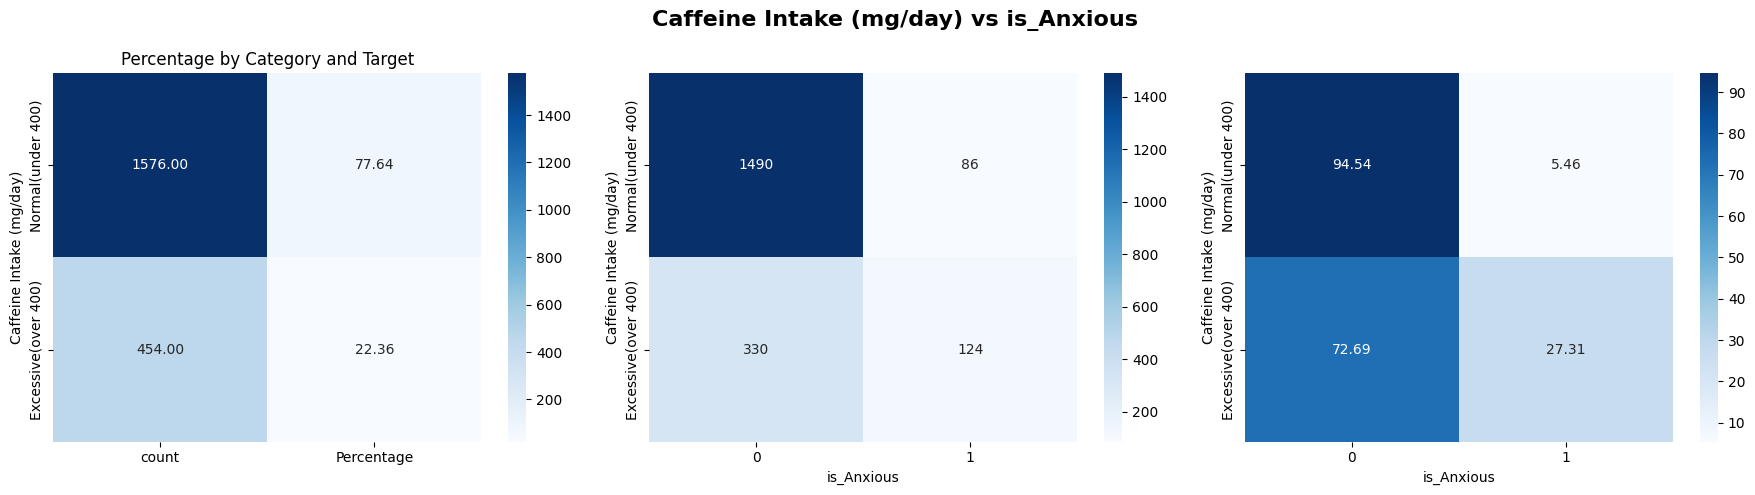

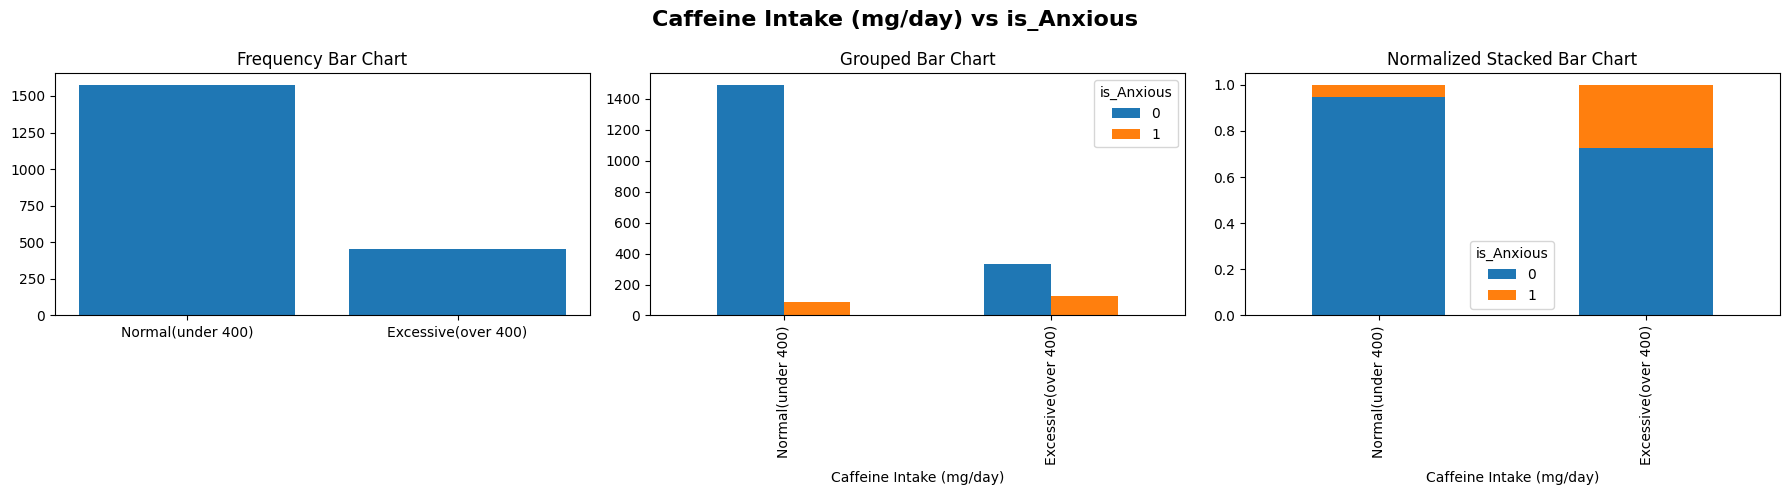

Caffeine Intake (mg/day) vs is_Anxious
Chi-square statistic: 179.1842
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [39]:
bins = [0,400,700]
labels = ["Normal(under 400)","Excessive(over 400)"]
binning(df, "Caffeine Intake (mg/day)", bins, labels)

show_category_data(df, "Caffeine Intake (mg/day)", "is_Anxious")
ordinal_chi2(df, "Caffeine Intake (mg/day)", "is_Anxious")

#### Alcohol Consumption (drinks/week)

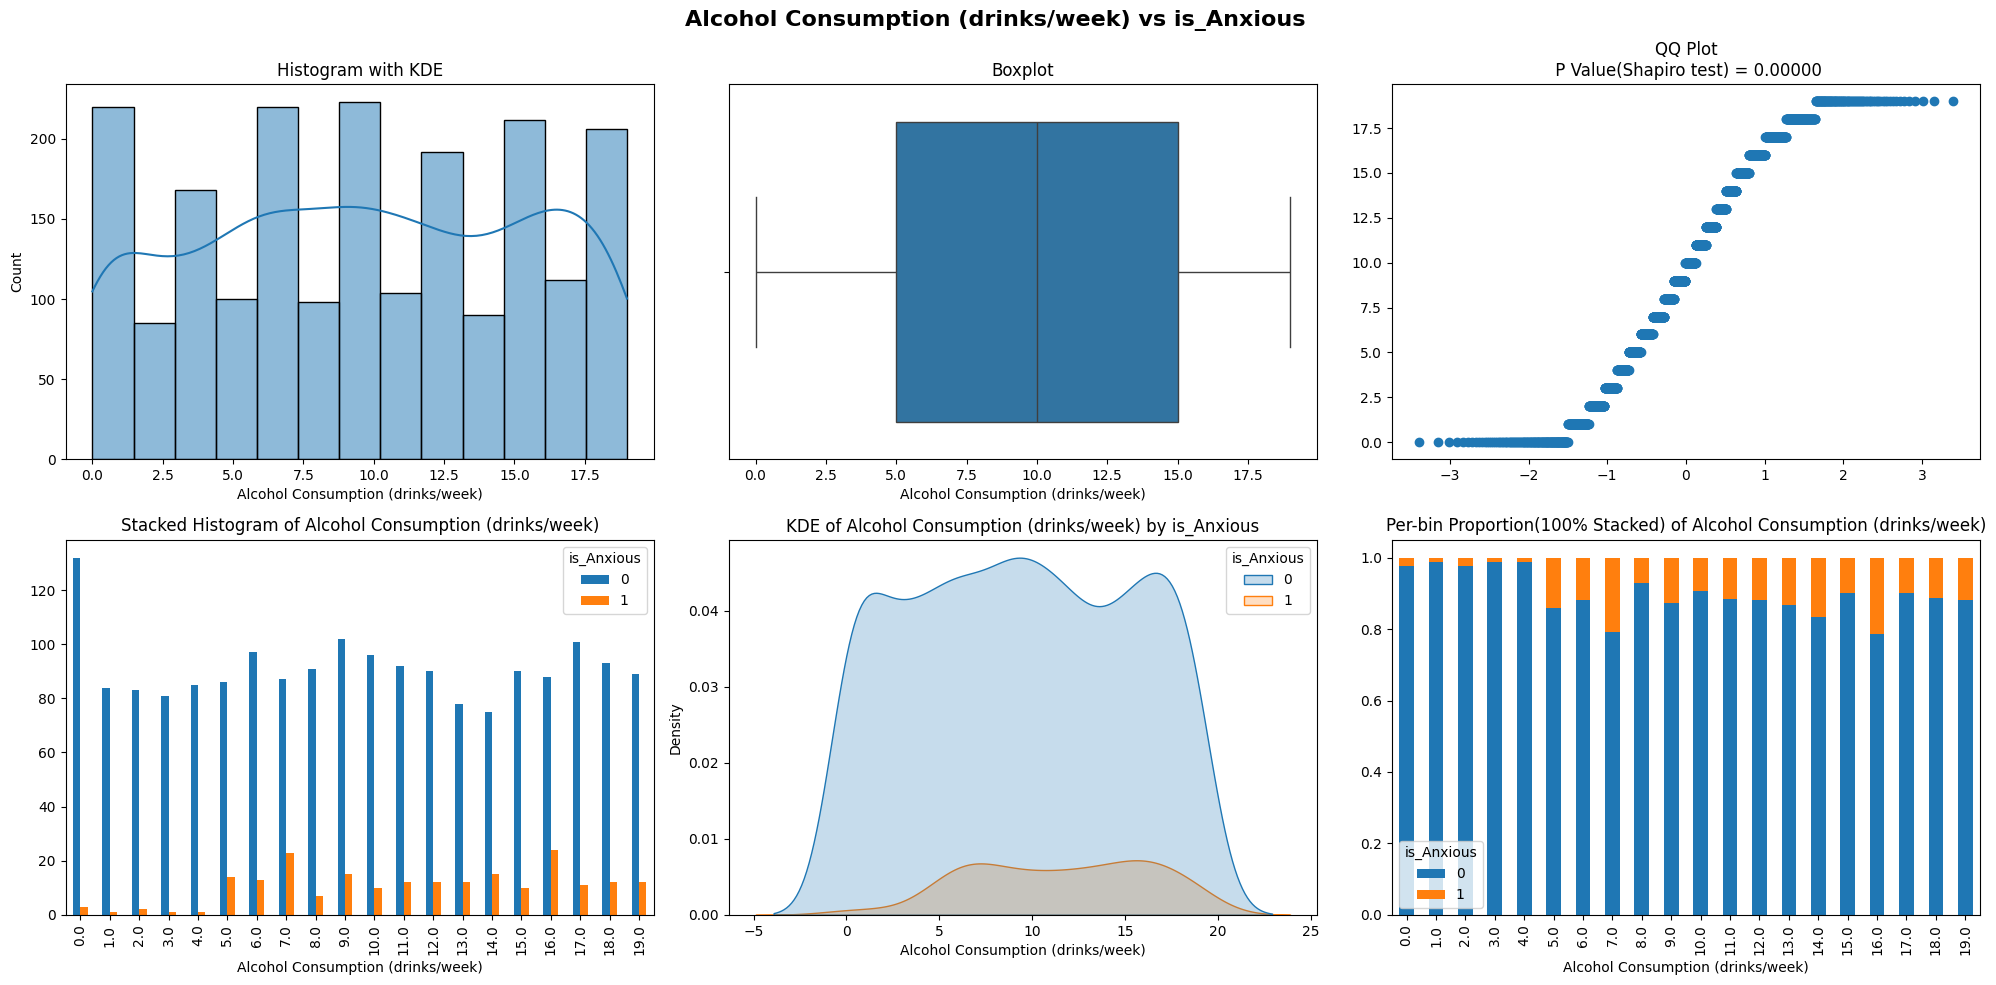

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [40]:
numerical_chart(df, "Alcohol Consumption (drinks/week)", "is_Anxious")
statistical_tests(df, "Alcohol Consumption (drinks/week)", "is_Anxious")

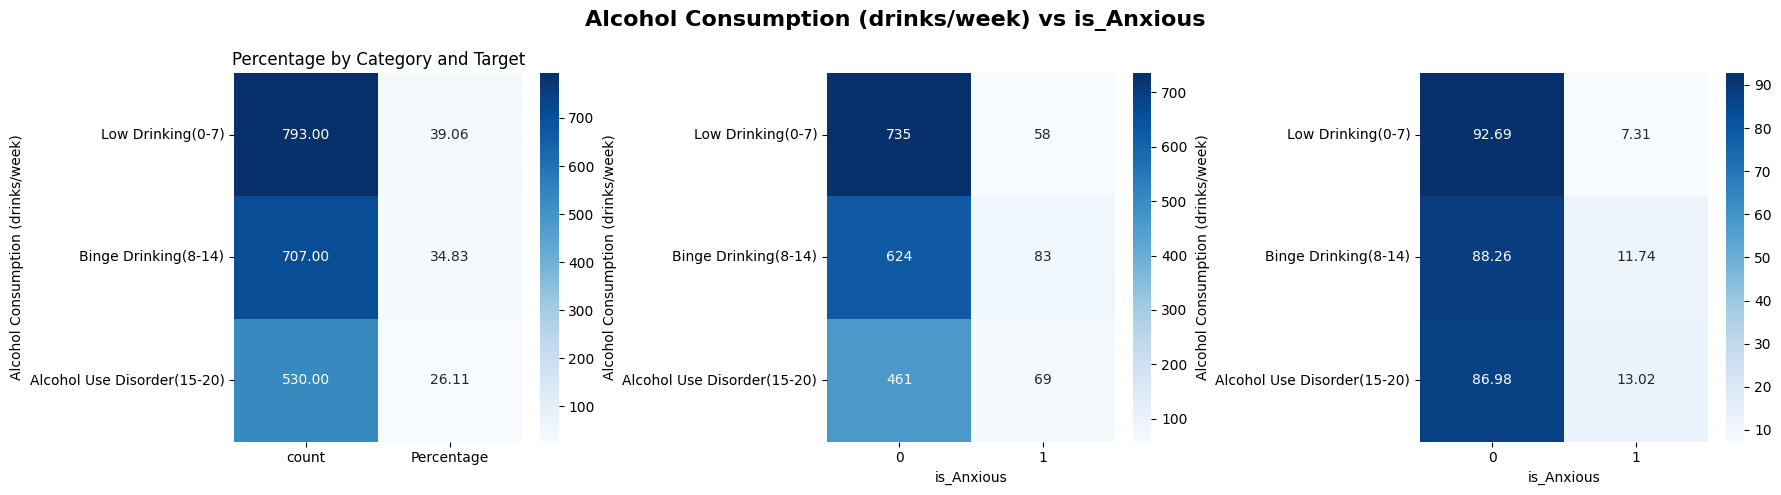

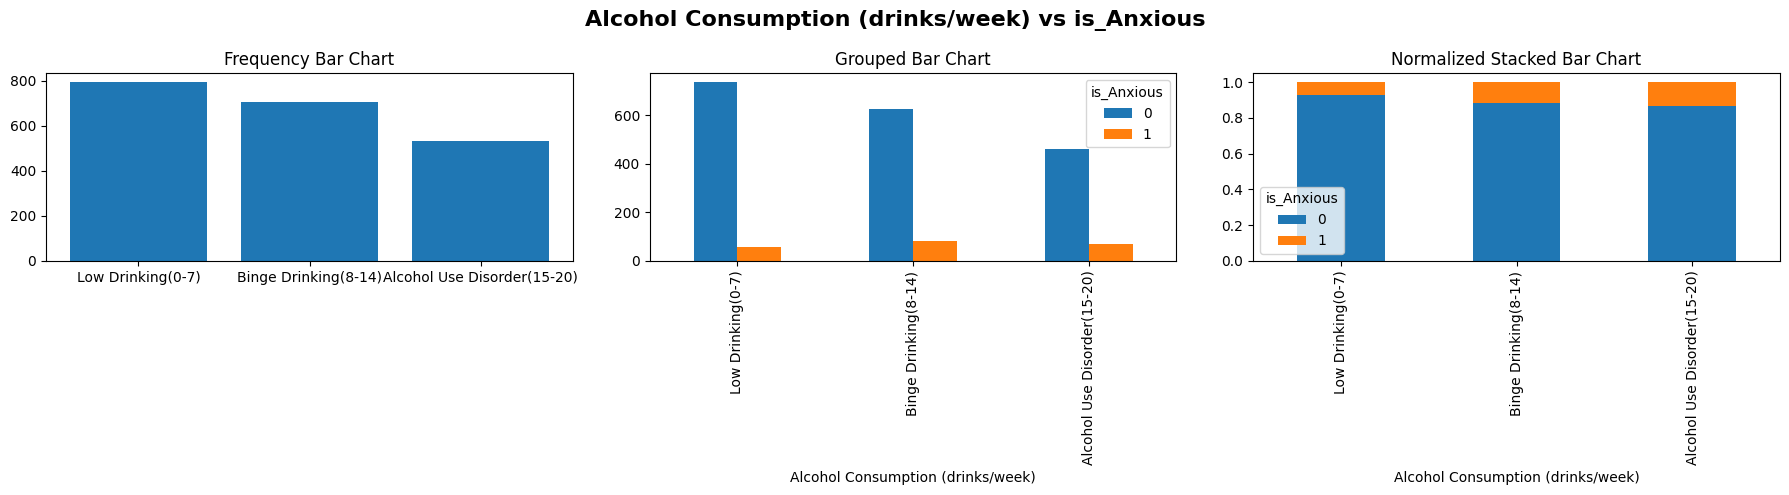

Alcohol Consumption (drinks/week) vs is_Anxious
Chi-square statistic: 13.4235
P Value: 0.0012
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [41]:
bins = [0,7,14,20]
labels = ["Low Drinking(0-7)", "Binge Drinking(8-14)", "Alcohol Use Disorder(15-20)"]
binning(df, "Alcohol Consumption (drinks/week)", bins, labels)

show_category_data(df, "Alcohol Consumption (drinks/week)", "is_Anxious")
ordinal_chi2(df, "Alcohol Consumption (drinks/week)", "is_Anxious")

#### Heart Rate (bpm)

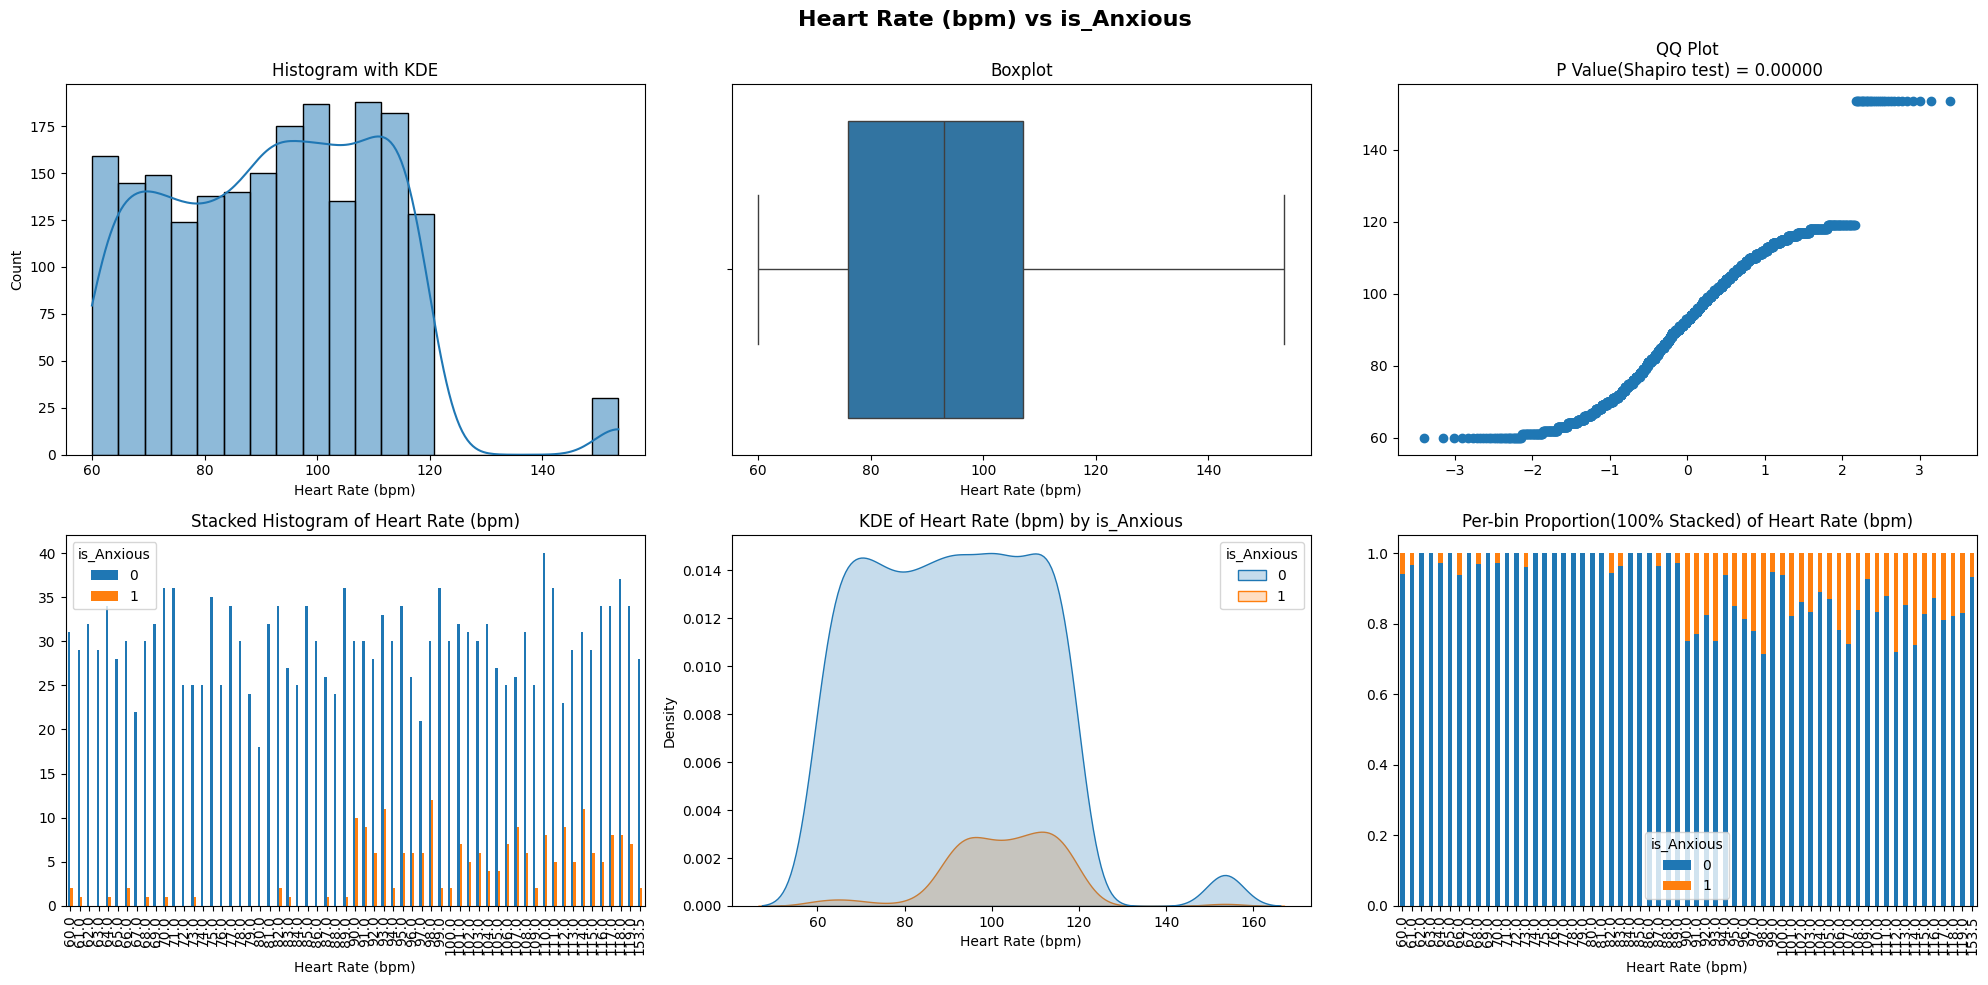

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [42]:
numerical_chart(df, "Heart Rate (bpm)", "is_Anxious")
statistical_tests(df, "Heart Rate (bpm)", "is_Anxious")

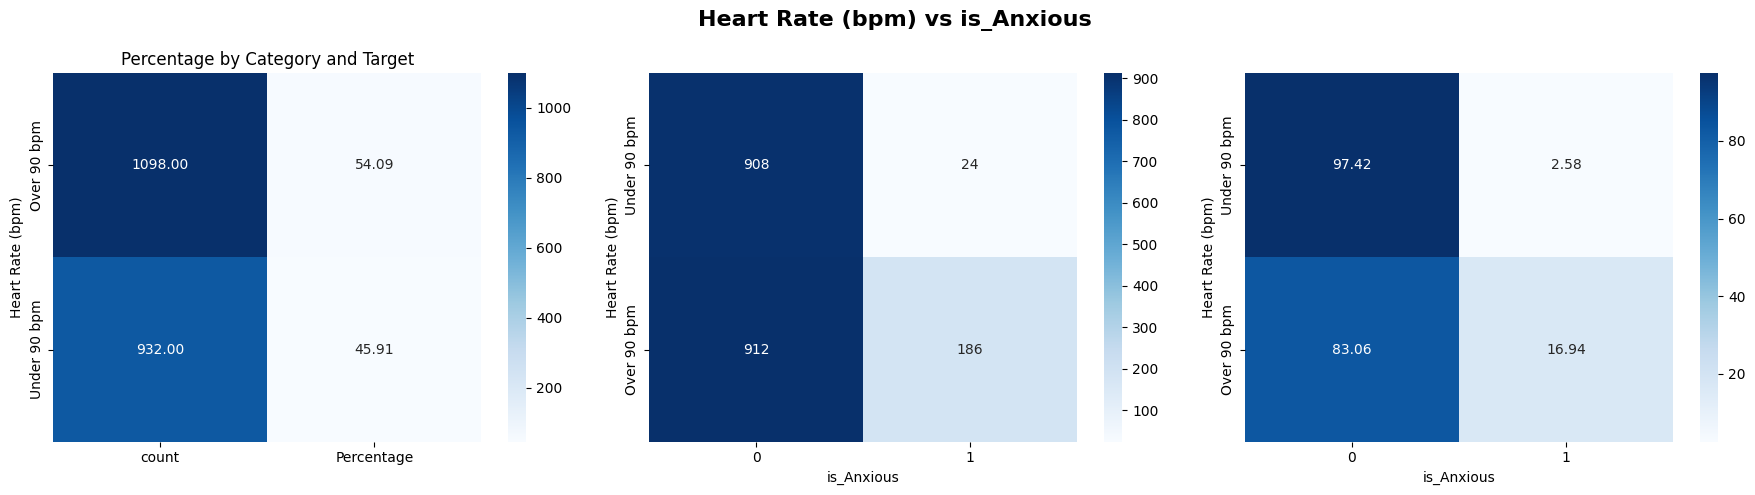

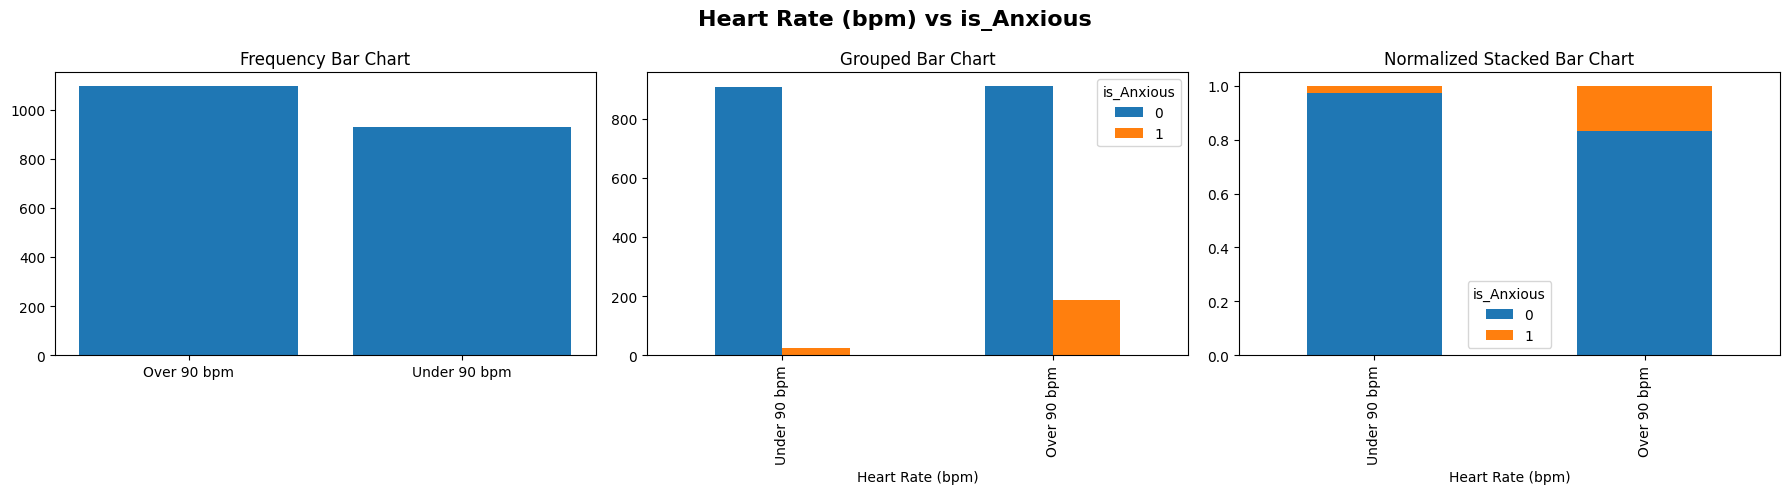

Heart Rate (bpm) vs is_Anxious
Chi-square statistic: 110.6123
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [43]:
bins = [0,90,160]
labels = ["Under 90 bpm", "Over 90 bpm"]
binning(df, "Heart Rate (bpm)", bins, labels)

show_category_data(df, "Heart Rate (bpm)", "is_Anxious")
ordinal_chi2(df, "Heart Rate (bpm)", "is_Anxious")

#### Breathing Rate (breaths/min)

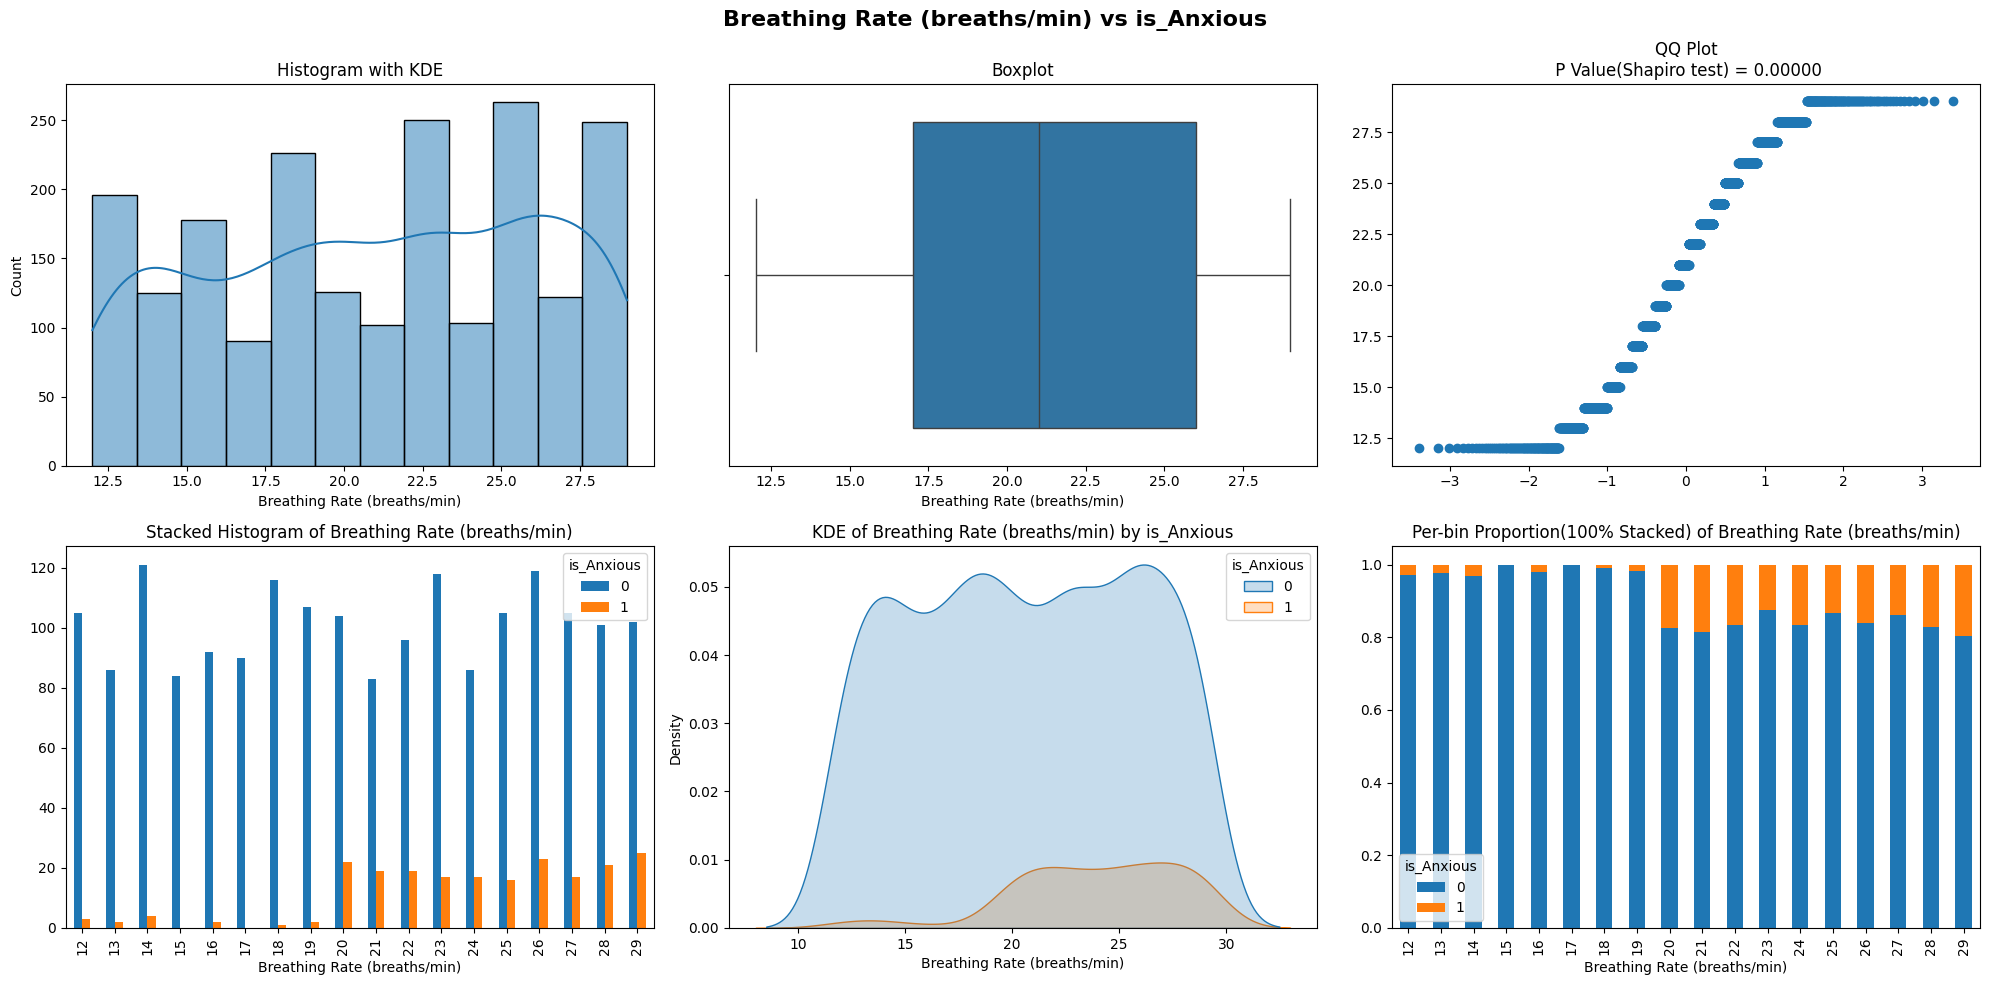

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [44]:
numerical_chart(df, "Breathing Rate (breaths/min)", "is_Anxious")
statistical_tests(df, "Breathing Rate (breaths/min)", "is_Anxious")

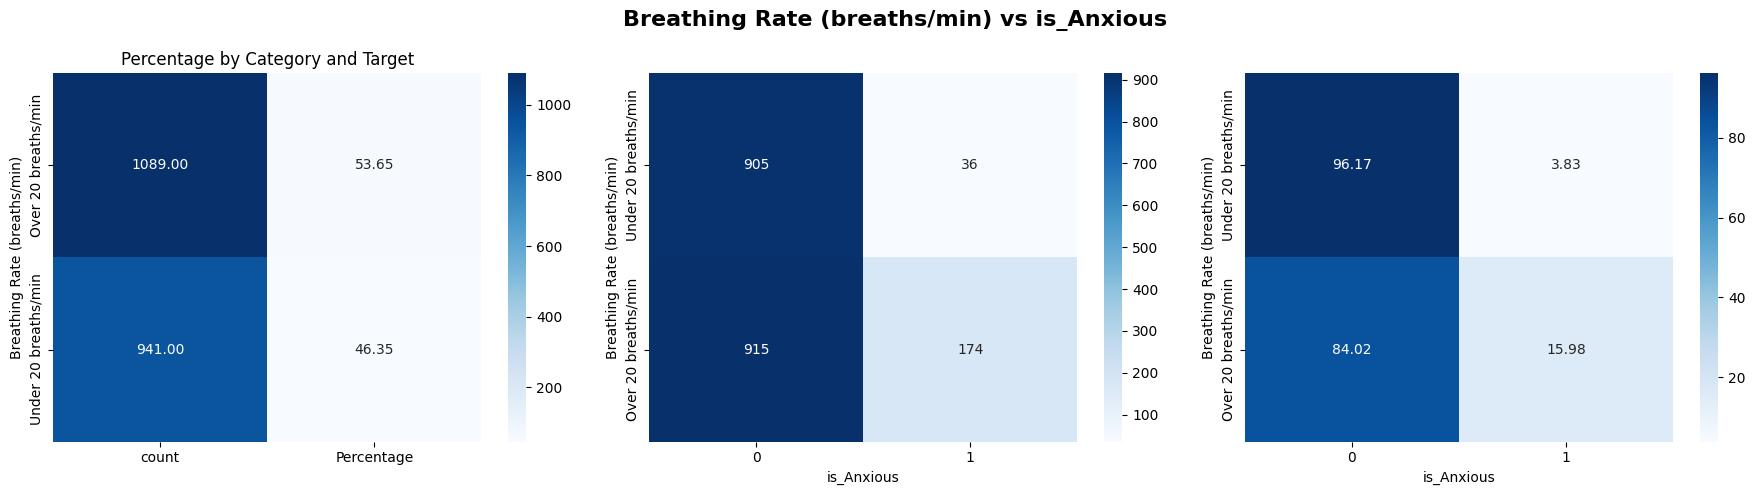

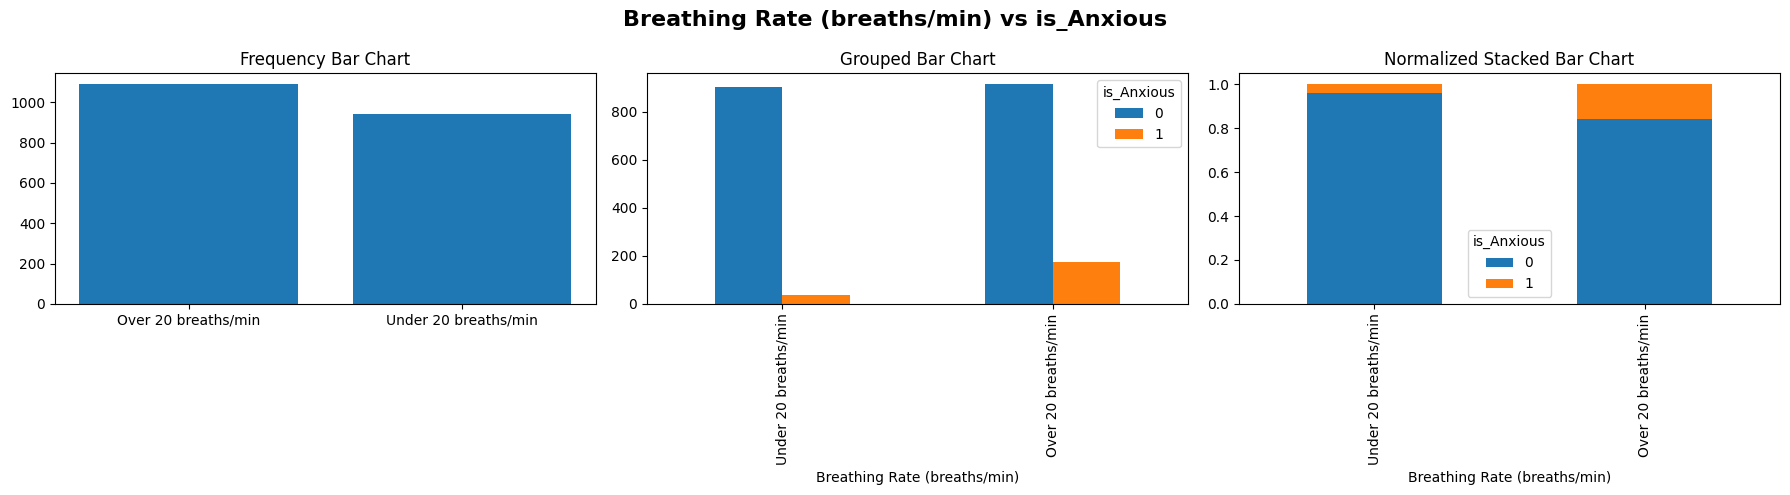

Breathing Rate (breaths/min) vs is_Anxious
Chi-square statistic: 79.0728
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [45]:
bins = [0,20,30]
labels = ["Under 20 breaths/min", "Over 20 breaths/min"]
binning(df, "Breathing Rate (breaths/min)", bins, labels)

show_category_data(df, "Breathing Rate (breaths/min)", "is_Anxious")
ordinal_chi2(df, "Breathing Rate (breaths/min)", "is_Anxious")

#### Therapy Sessions (per month)

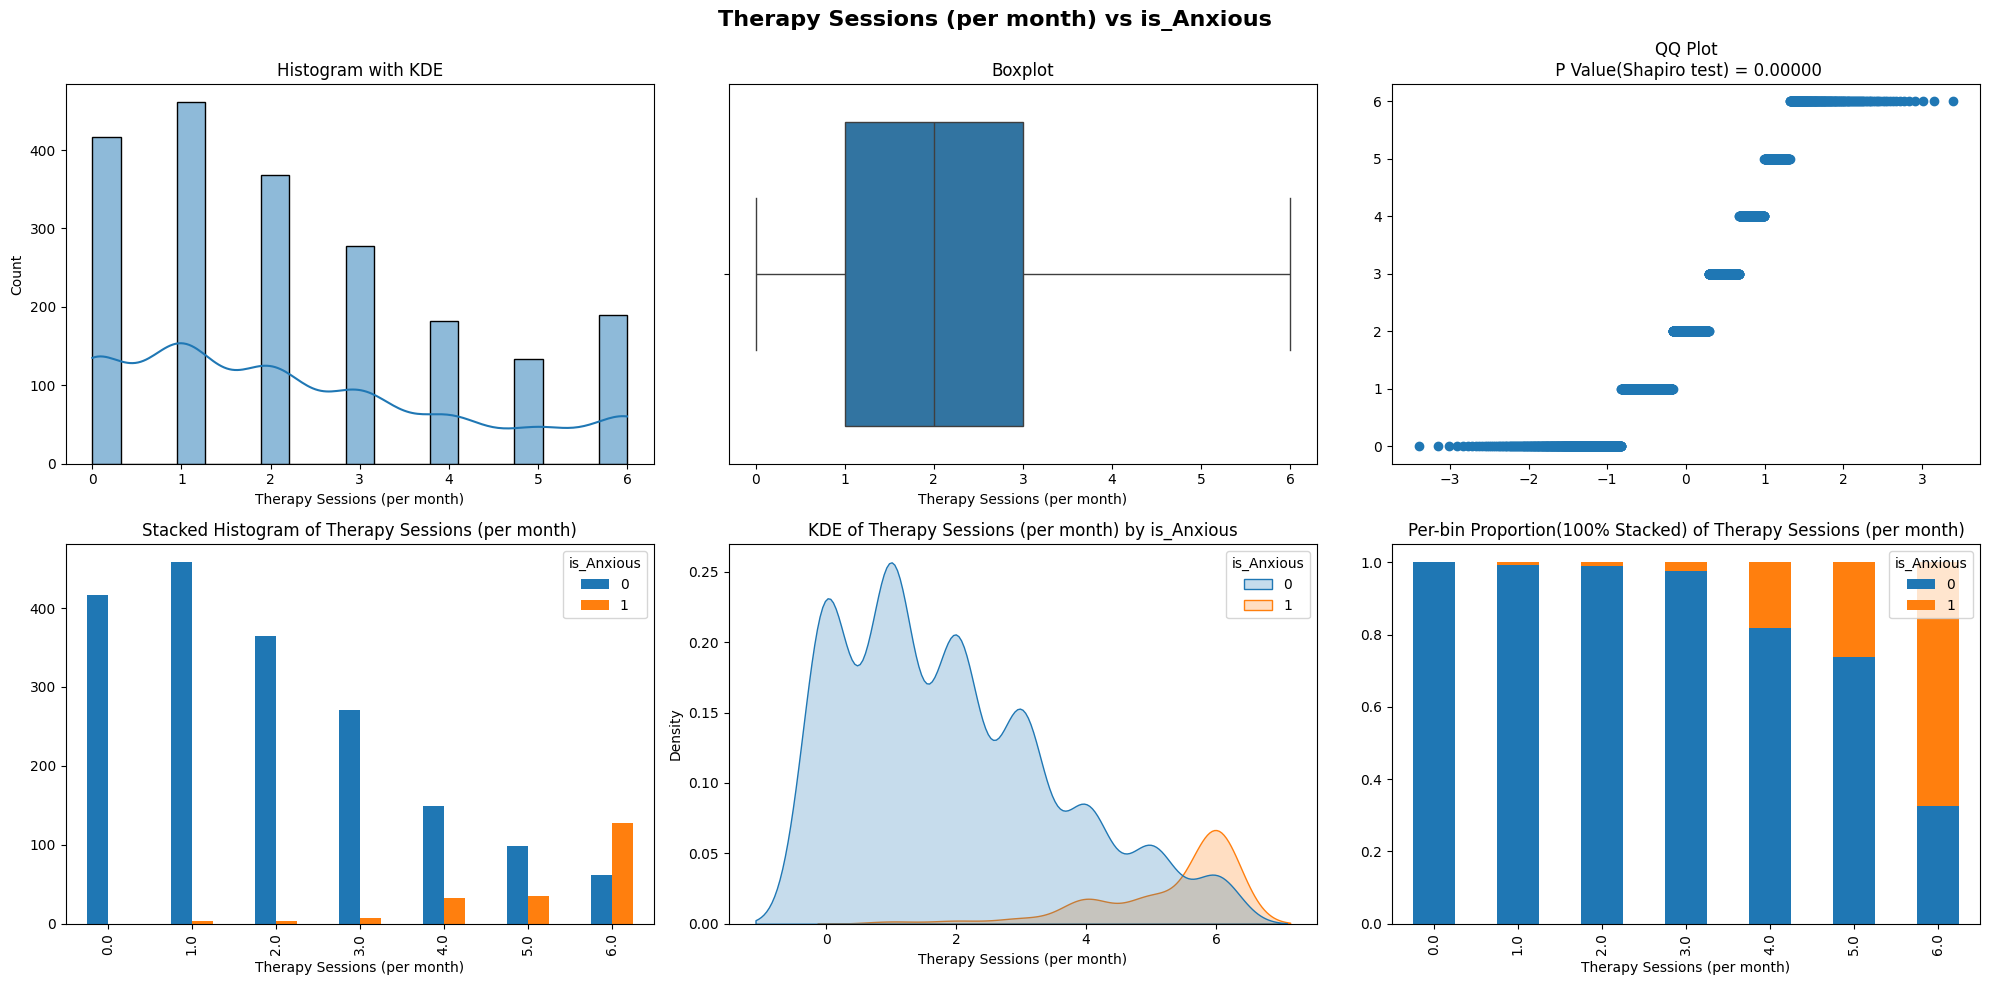

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [46]:
numerical_chart(df, "Therapy Sessions (per month)", "is_Anxious")
statistical_tests(df, "Therapy Sessions (per month)", "is_Anxious")

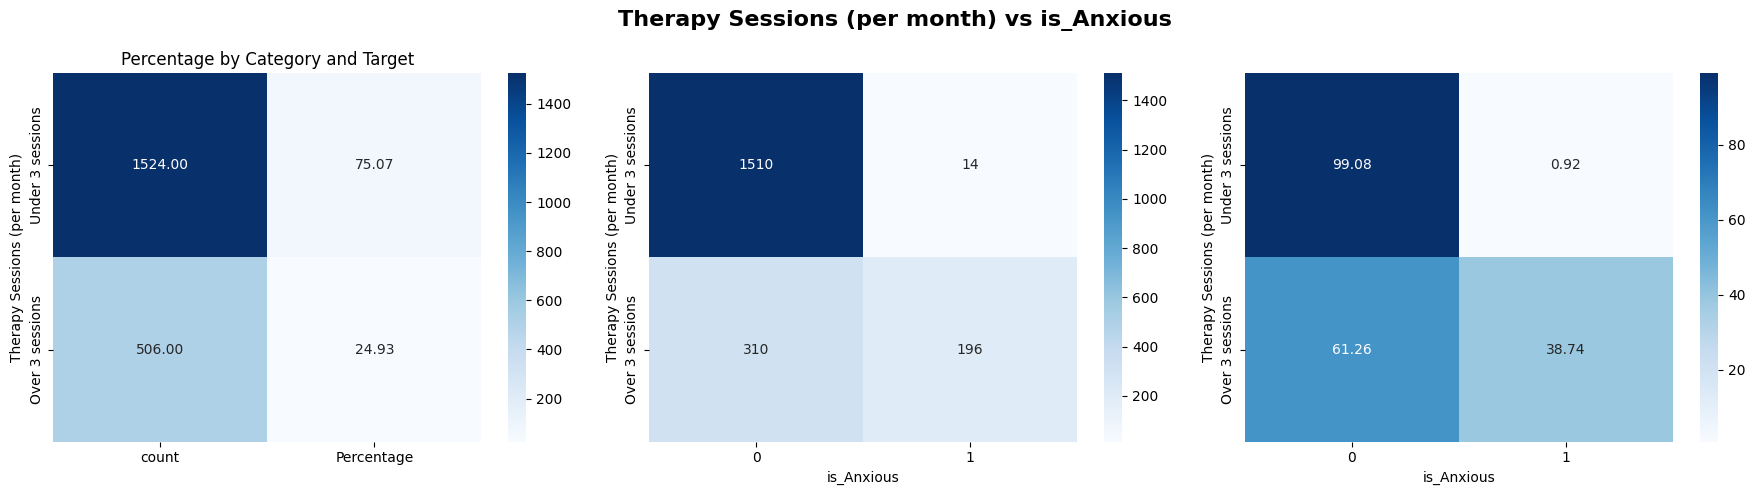

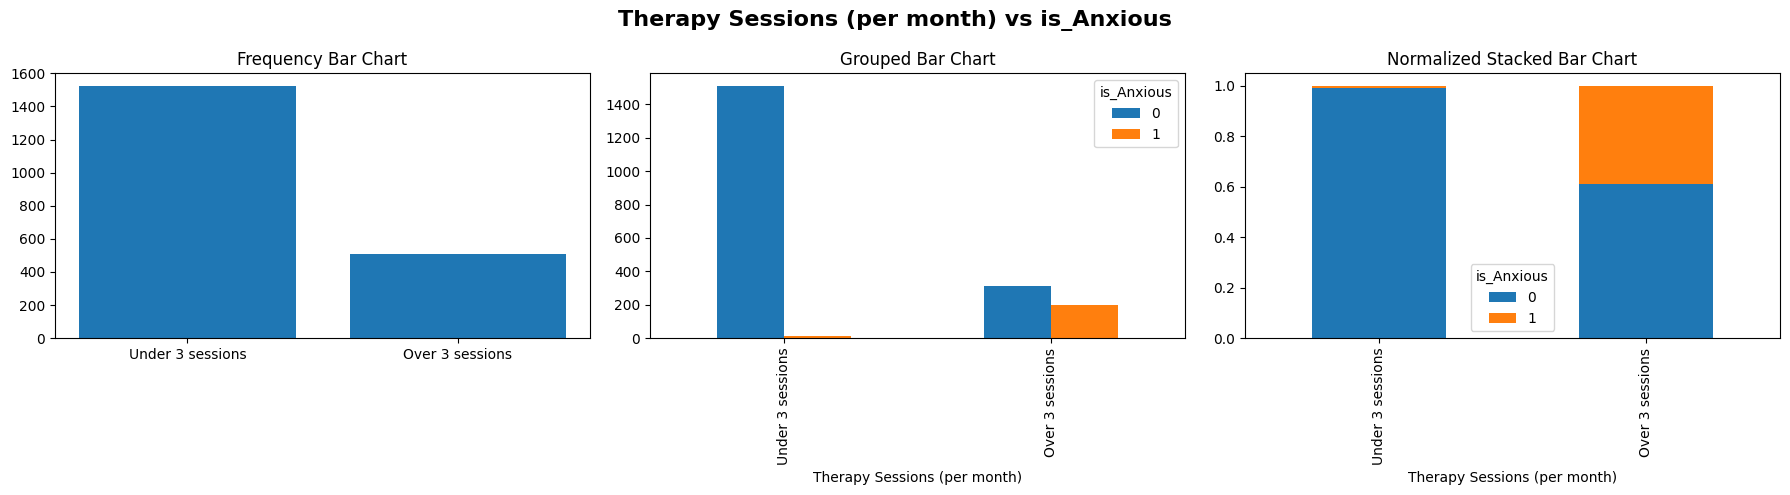

Therapy Sessions (per month) vs is_Anxious
Chi-square statistic: 581.6692
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [47]:
bins = [0,3,6]
labels = ["Under 3 sessions", "Over 3 sessions"]
binning(df, "Therapy Sessions (per month)", bins, labels)

show_category_data(df, "Therapy Sessions (per month)", "is_Anxious")
ordinal_chi2(df, "Therapy Sessions (per month)", "is_Anxious")

#### Stress Level (1-10)

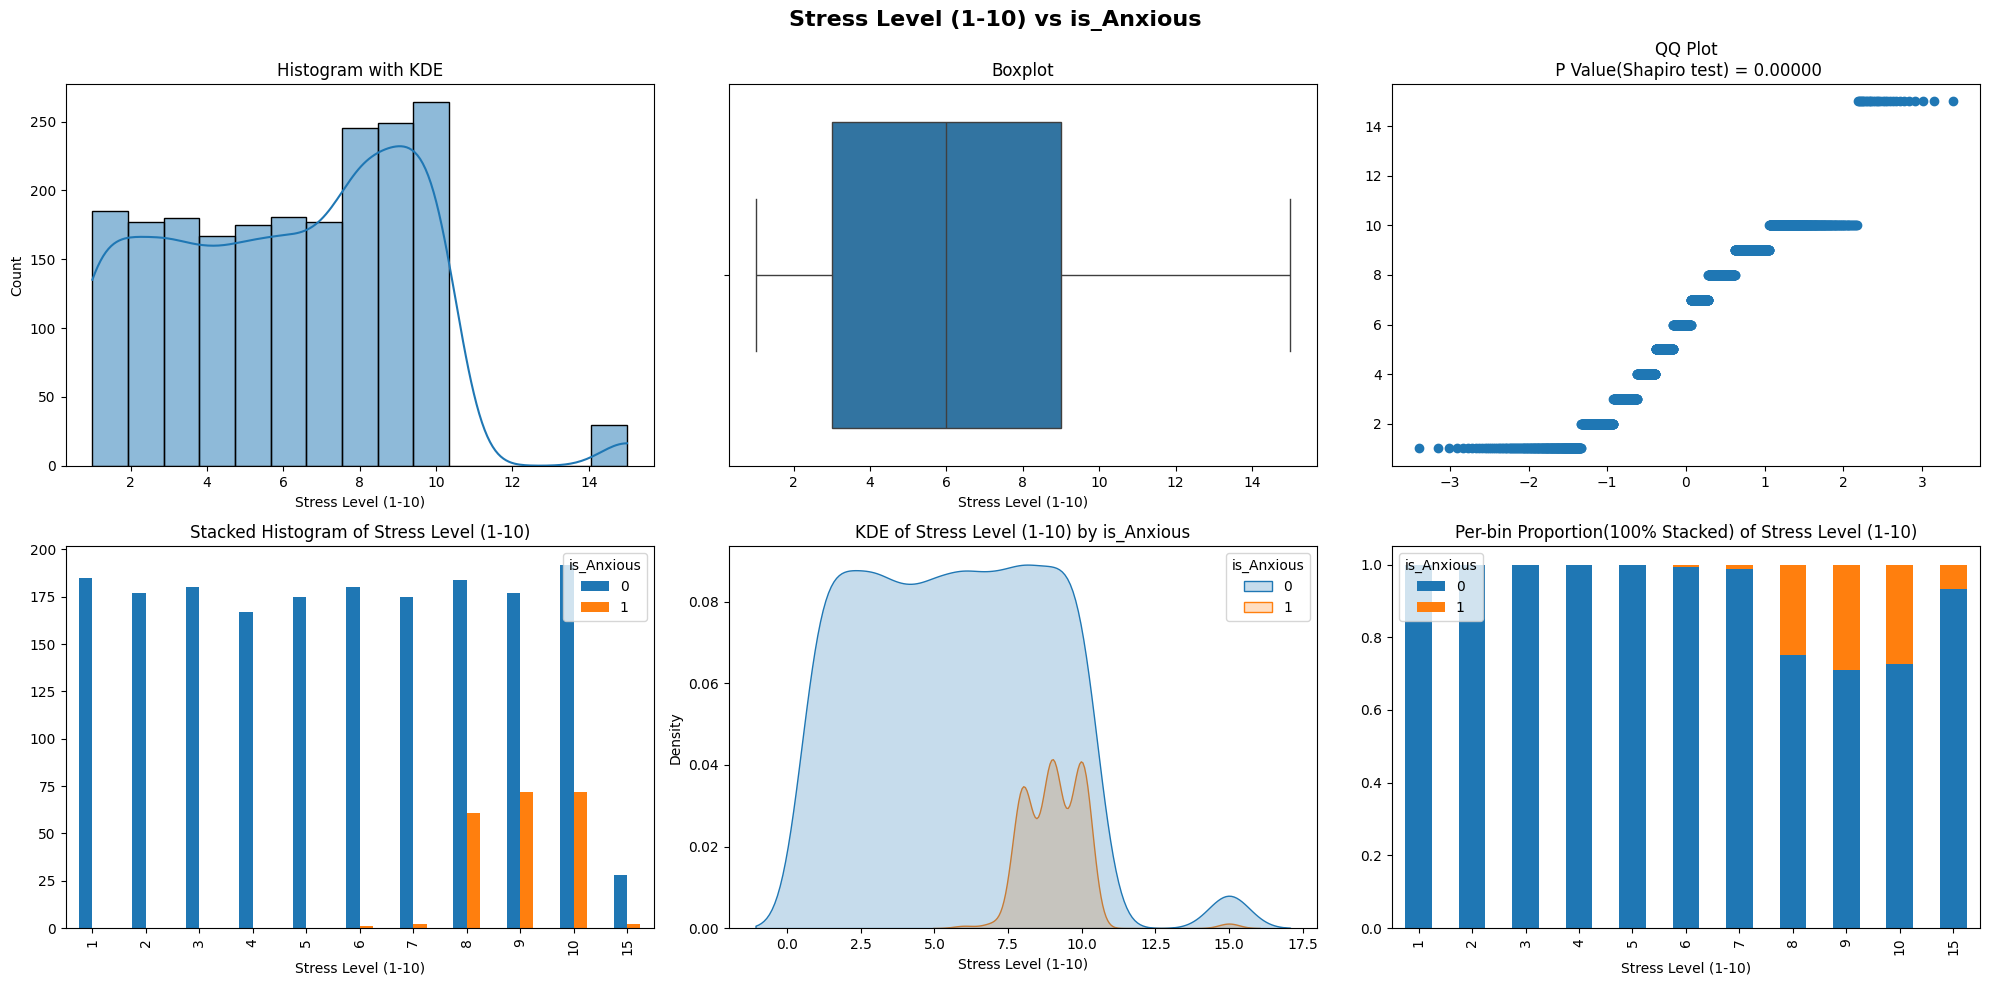

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [48]:
numerical_chart(df, "Stress Level (1-10)", "is_Anxious")
statistical_tests(df, "Stress Level (1-10)", "is_Anxious")

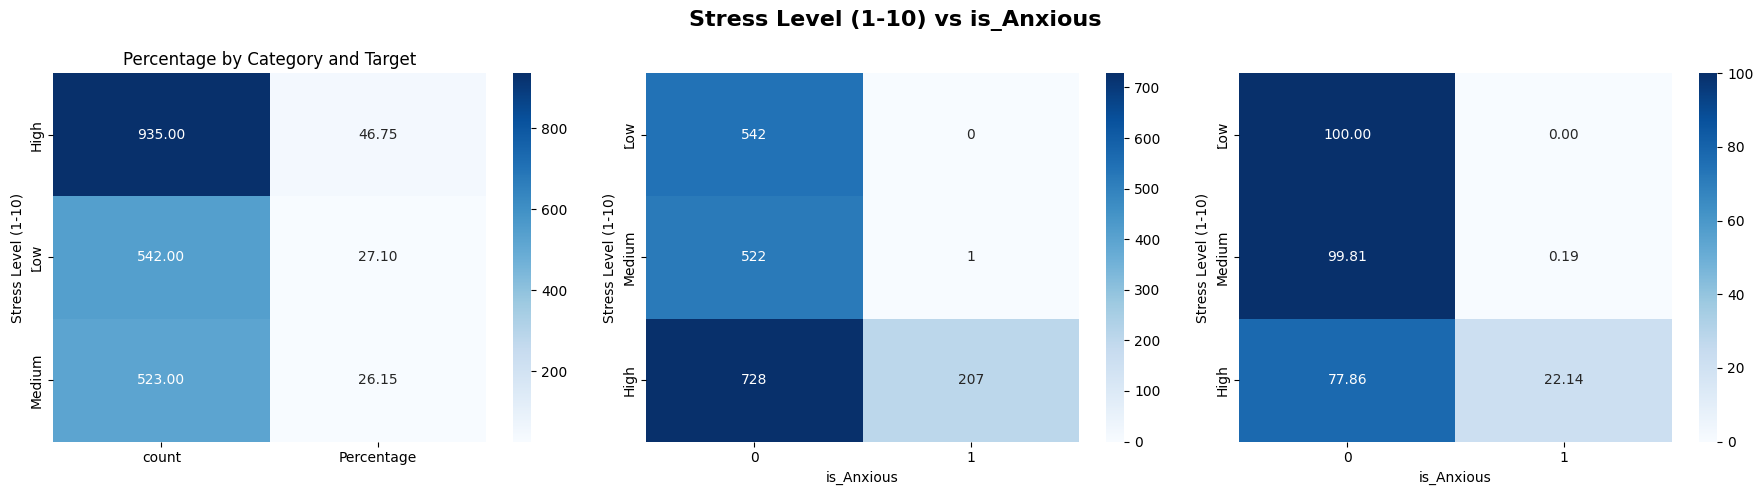

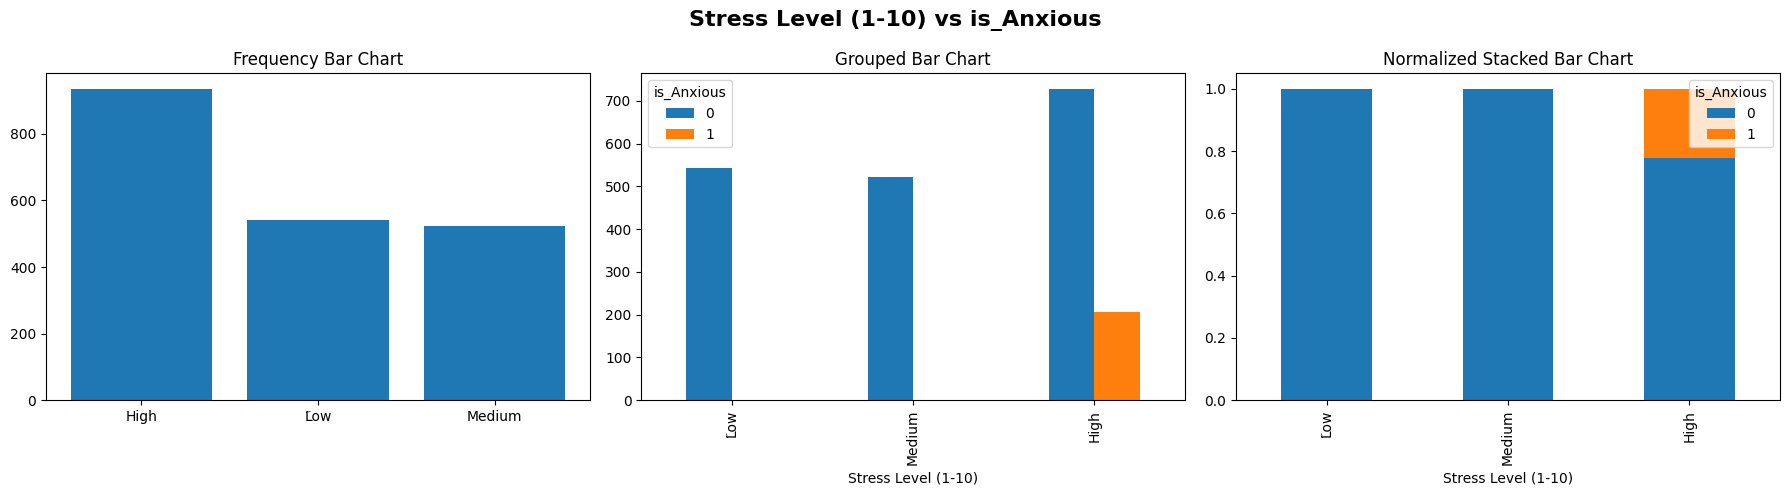

Stress Level (1-10) vs is_Anxious
Chi-square statistic: 259.6768
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [49]:
bins = [0,3,6,10]
labels = ["َLow", "Medium", "High"]
binning(df, "Stress Level (1-10)", bins, labels)

show_category_data(df, "Stress Level (1-10)", "is_Anxious")
ordinal_chi2(df, "Stress Level (1-10)", "is_Anxious")

#### Sweating Level (1-5)

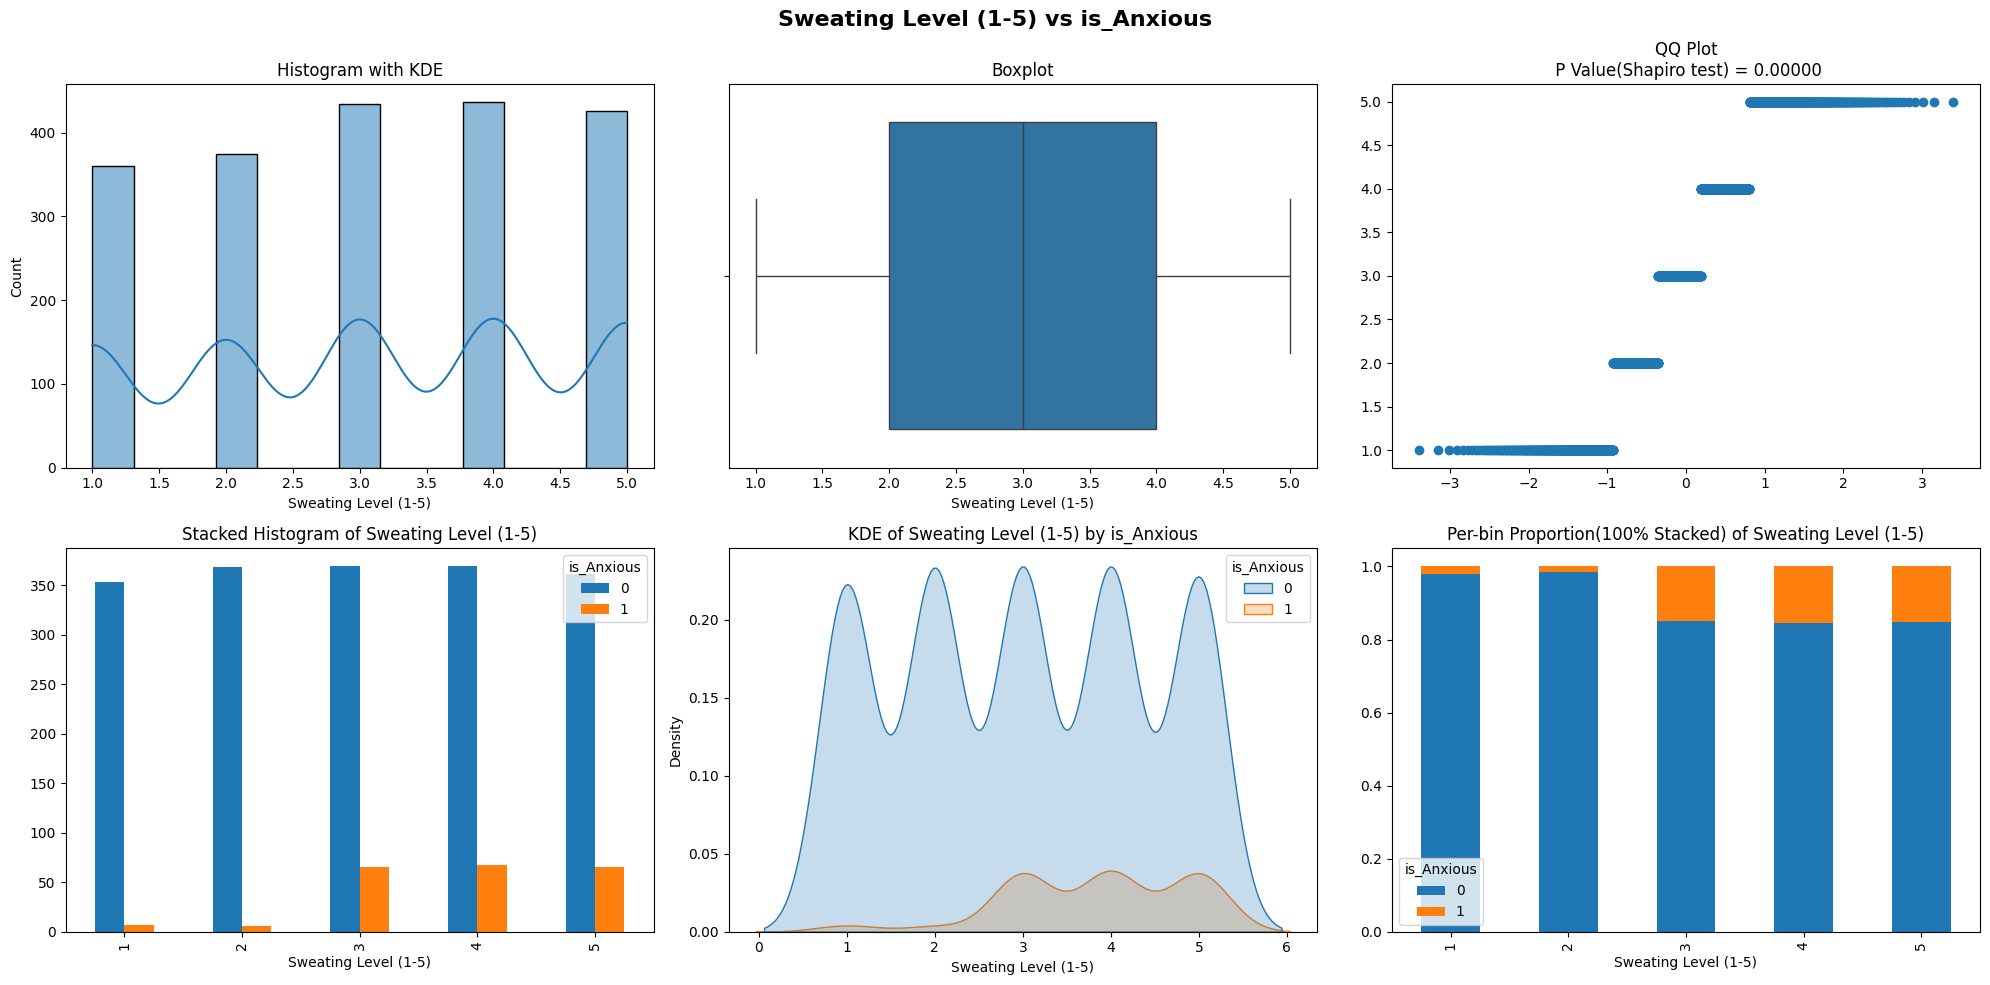

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [50]:
numerical_chart(df, "Sweating Level (1-5)", "is_Anxious")
statistical_tests(df, "Sweating Level (1-5)", "is_Anxious")

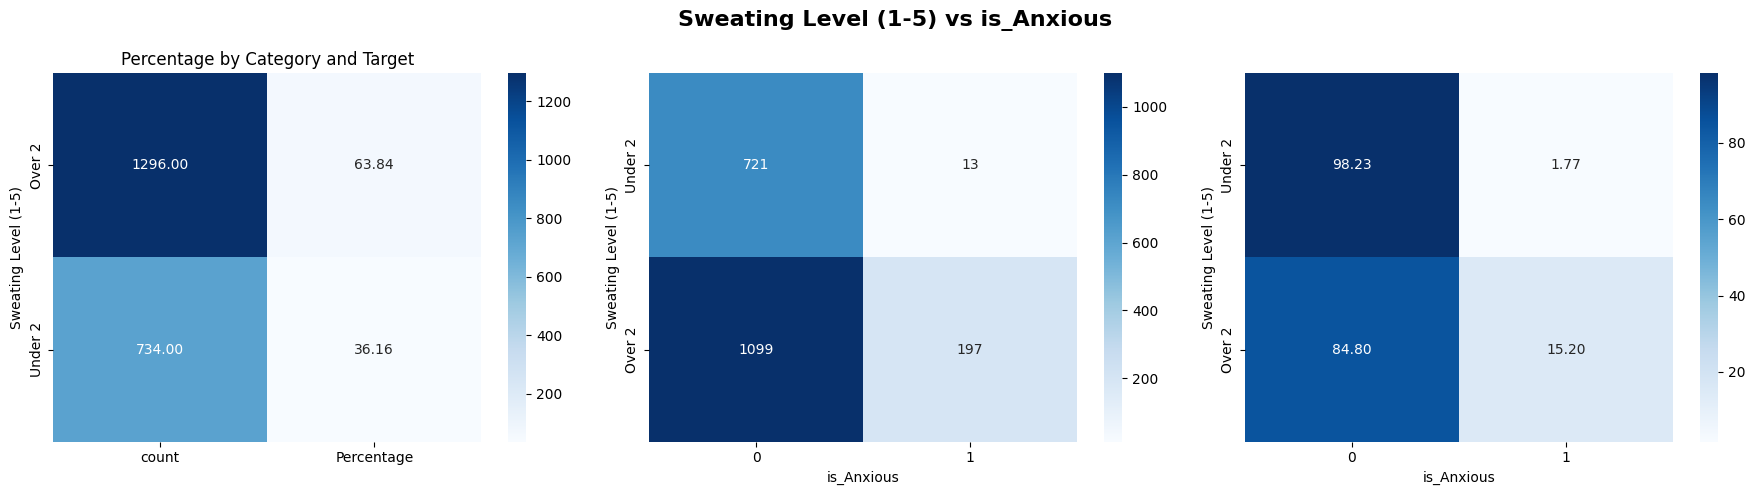

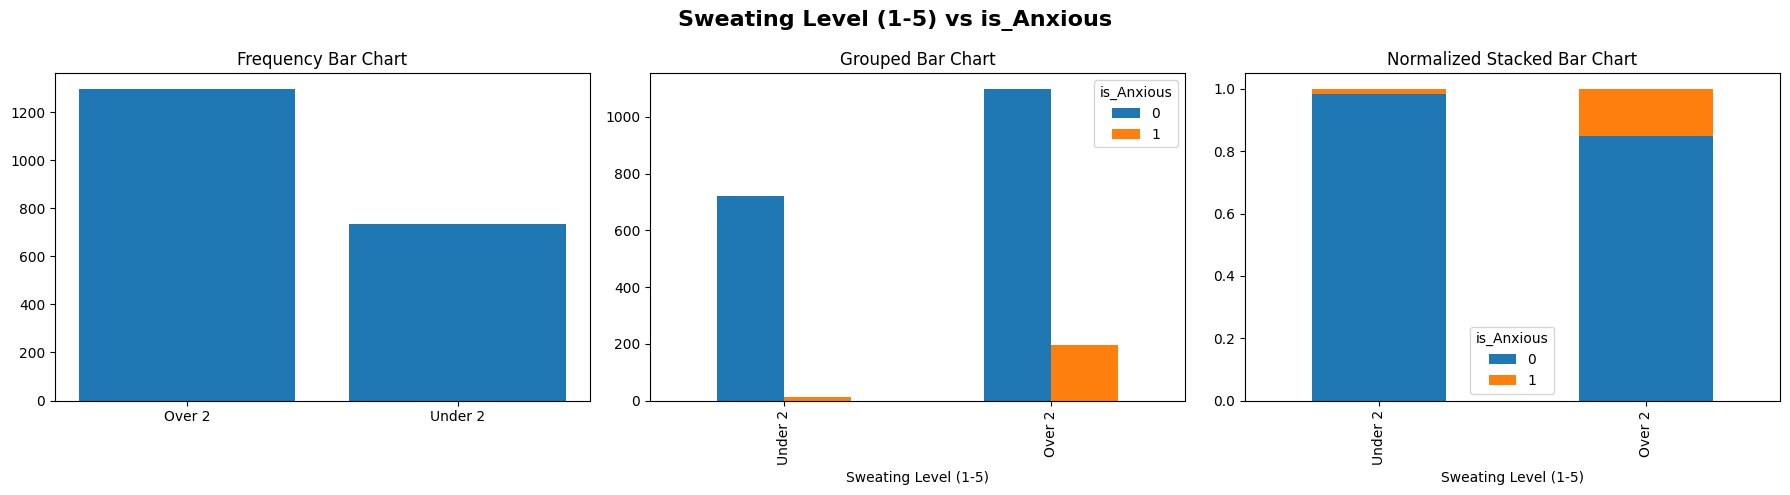

Sweating Level (1-5) vs is_Anxious
Chi-square statistic: 89.6804
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [51]:
bins = [0,2,5]
labels = ["Under 2", "Over 2"]
binning(df, "Sweating Level (1-5)", bins, labels)

show_category_data(df, "Sweating Level (1-5)", "is_Anxious")
ordinal_chi2(df, "Sweating Level (1-5)", "is_Anxious")

#### Diet Quality (1-10)

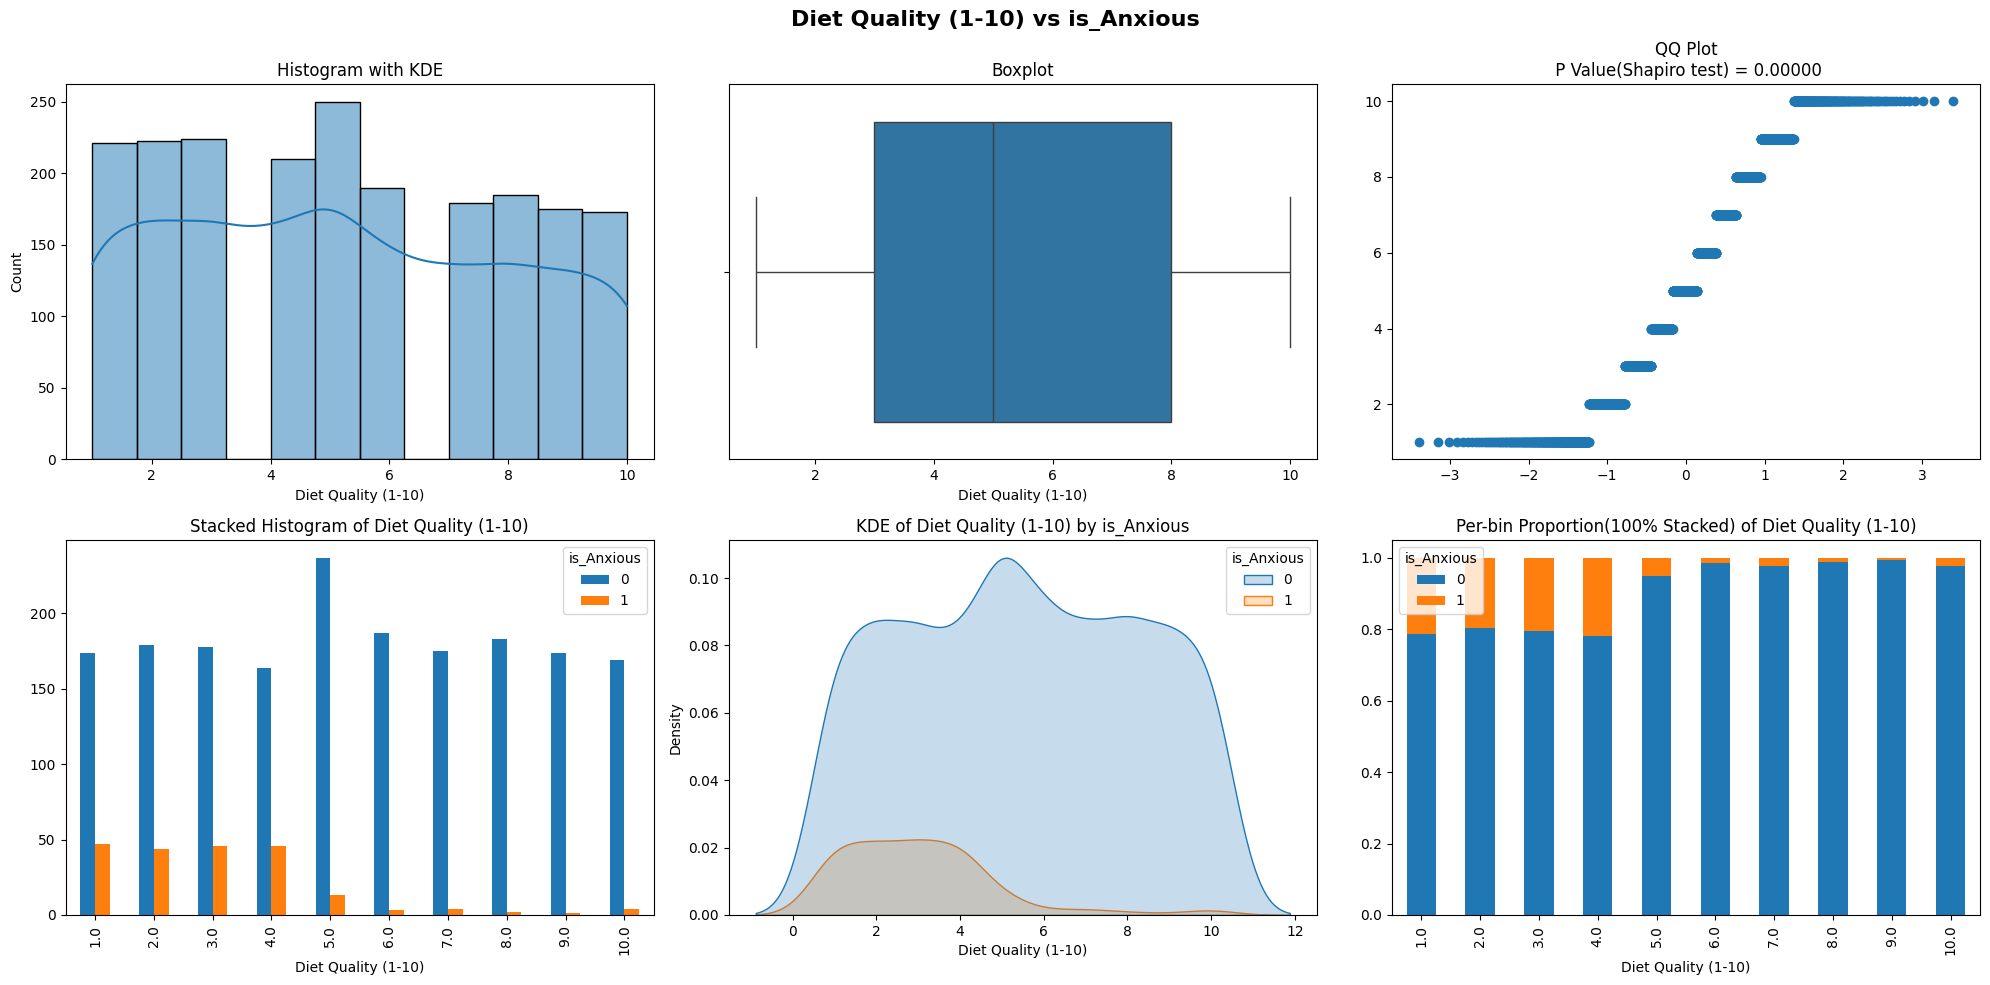

The data distribution is not normal.
 normalize the data...
Using Mann–Whitney U test:
P Value:0.0
 The data is not normalized.


In [52]:
numerical_chart(df, "Diet Quality (1-10)", "is_Anxious")
statistical_tests(df, "Diet Quality (1-10)", "is_Anxious")

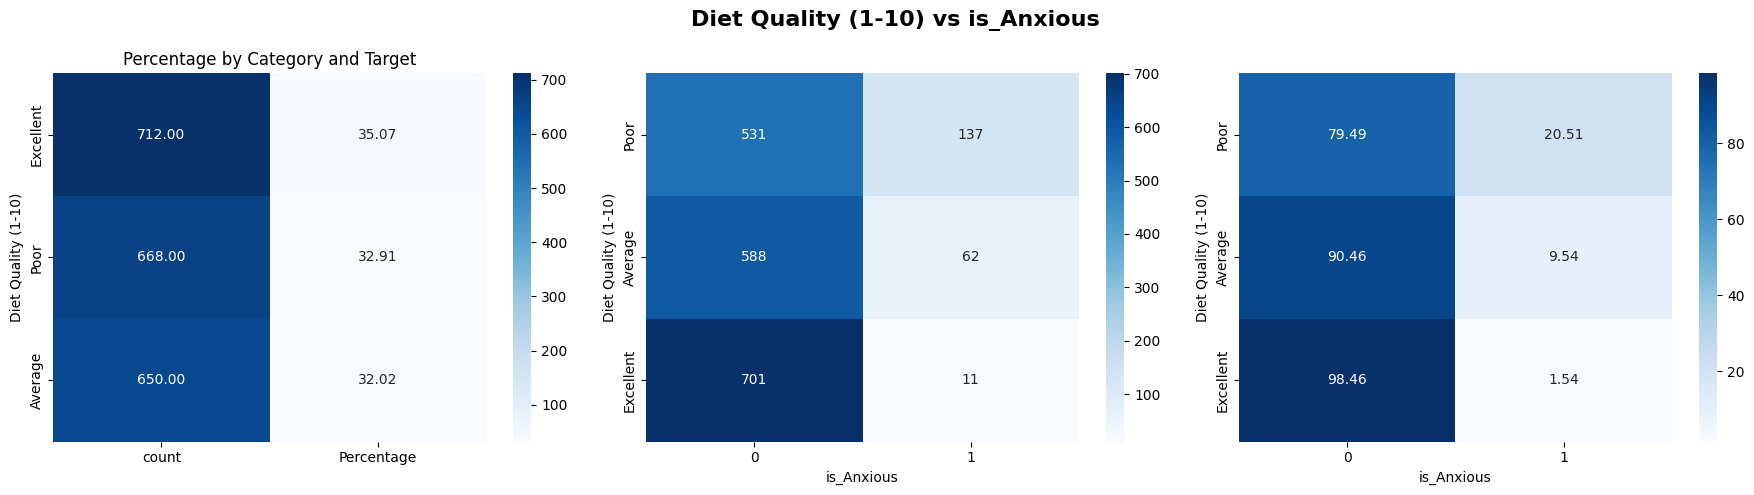

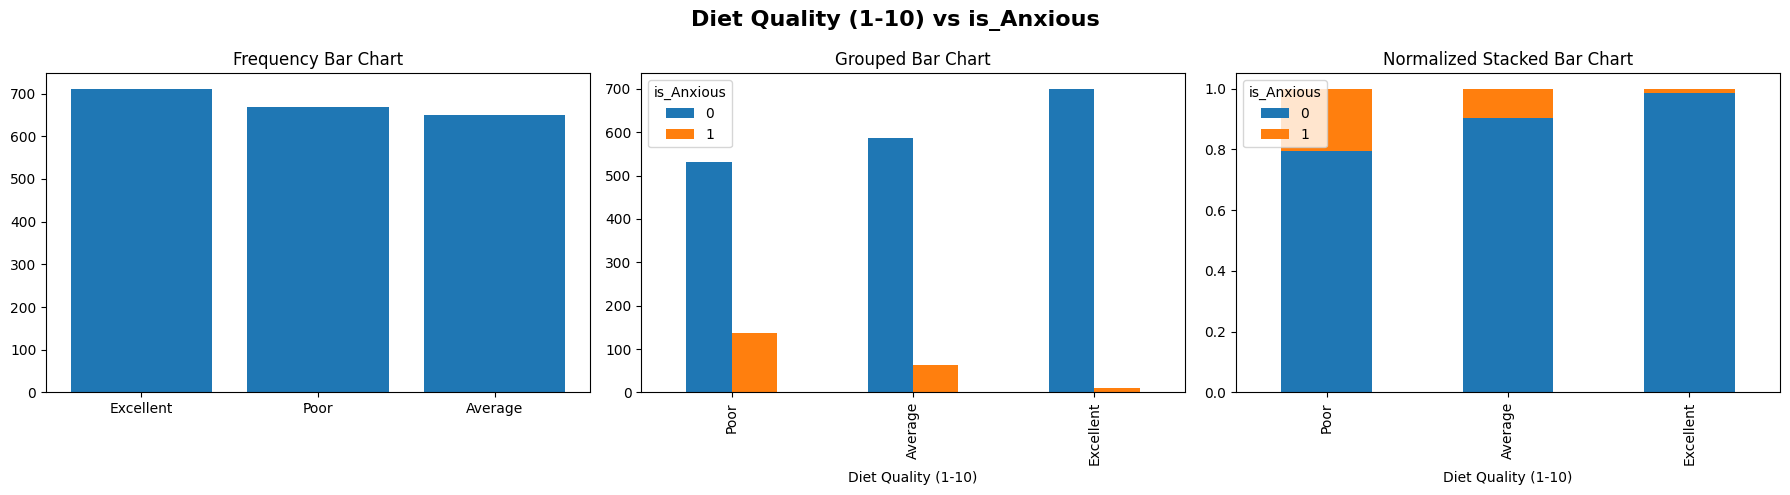

Diet Quality (1-10) vs is_Anxious
Chi-square statistic: 134.3116
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [53]:
bins = [0,3,6,10]
labels = ["َPoor", "Average", "Excellent"]
binning(df, "Diet Quality (1-10)", bins, labels)

show_category_data(df, "Diet Quality (1-10)", "is_Anxious")
ordinal_chi2(df, "Diet Quality (1-10)", "is_Anxious")

### Categorical 

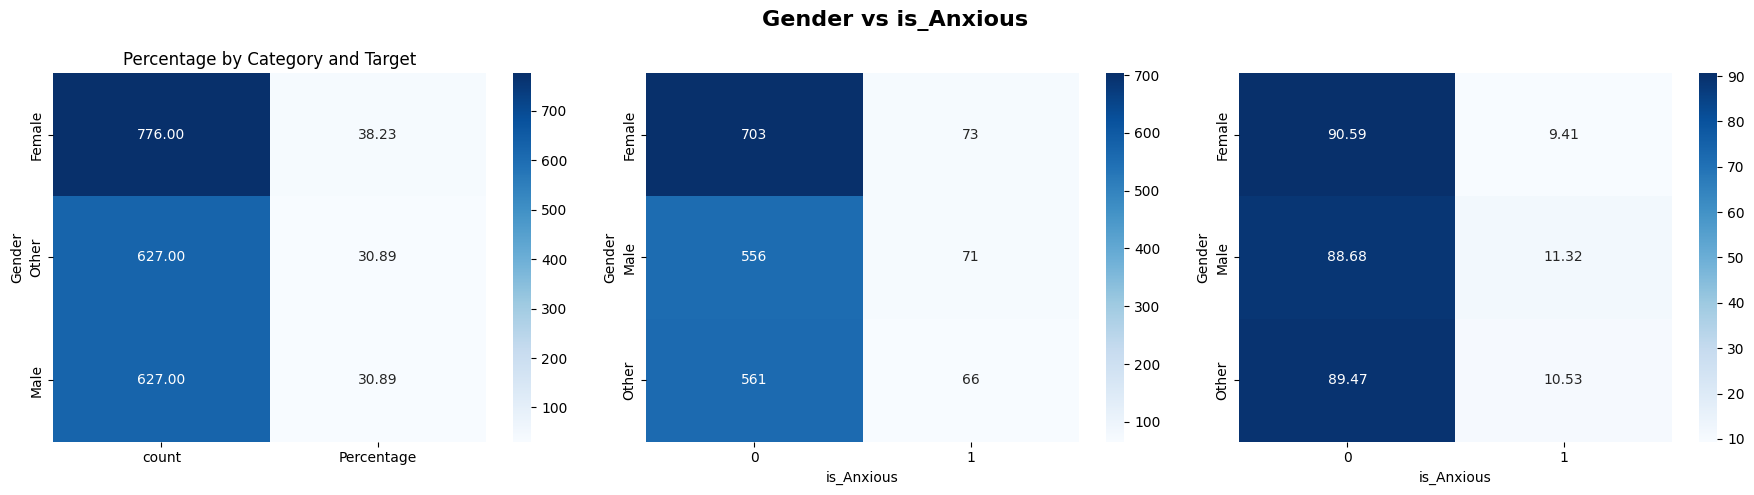

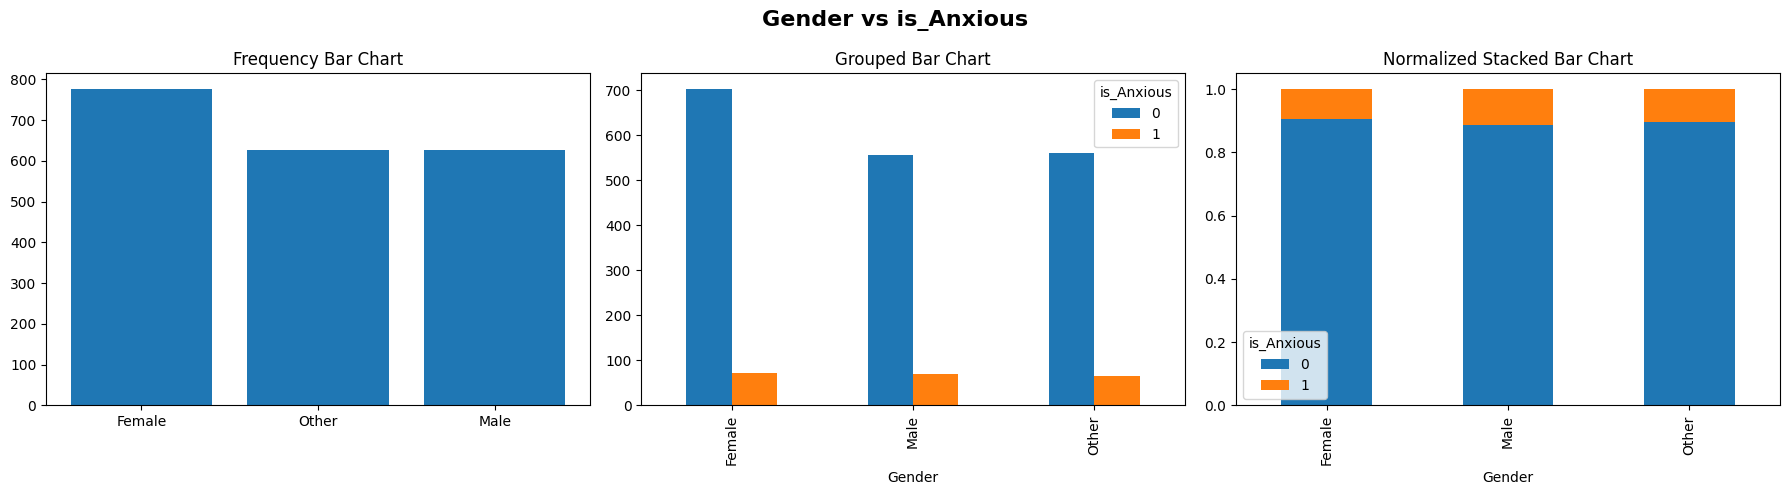

Gender vs is_Anxious
Chi-square statistic: 1.4057
P Value: 0.4952
Result: Fail to reject the null hypothesis (H0)
→ No significant relationship between variables



'fail to reject the H0'

In [54]:
show_category_data(df, "Gender", "is_Anxious")
ordinal_chi2(df, "Gender", "is_Anxious")

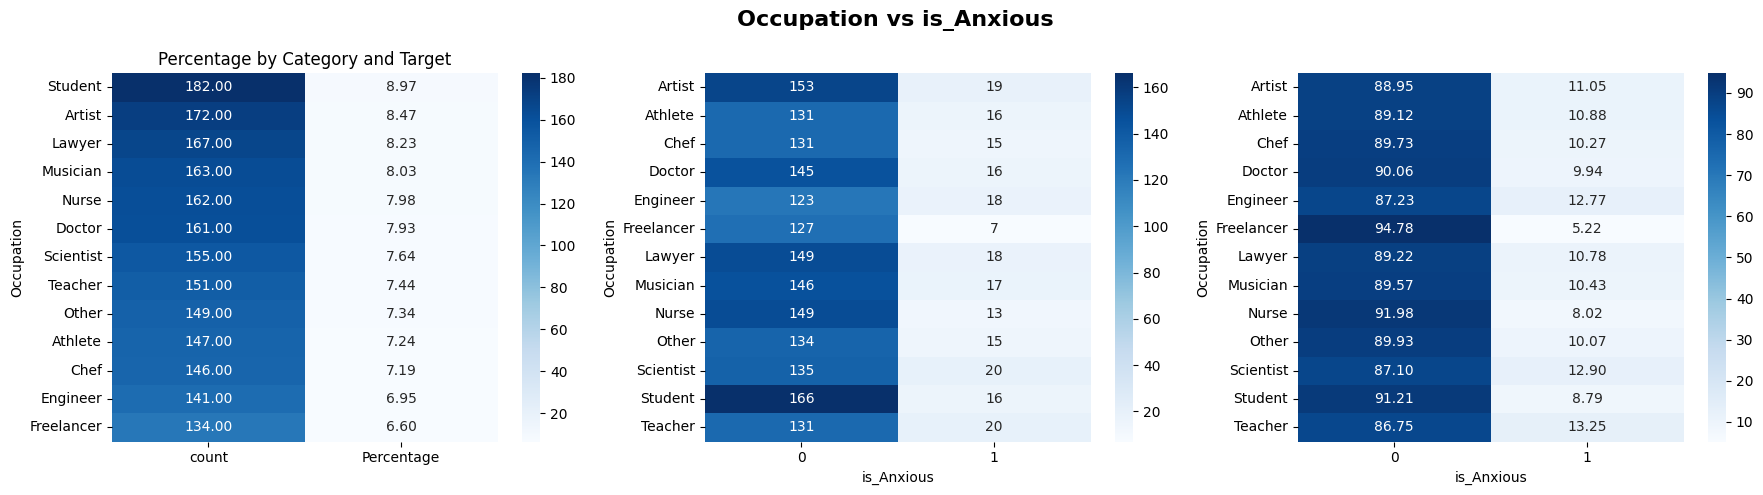

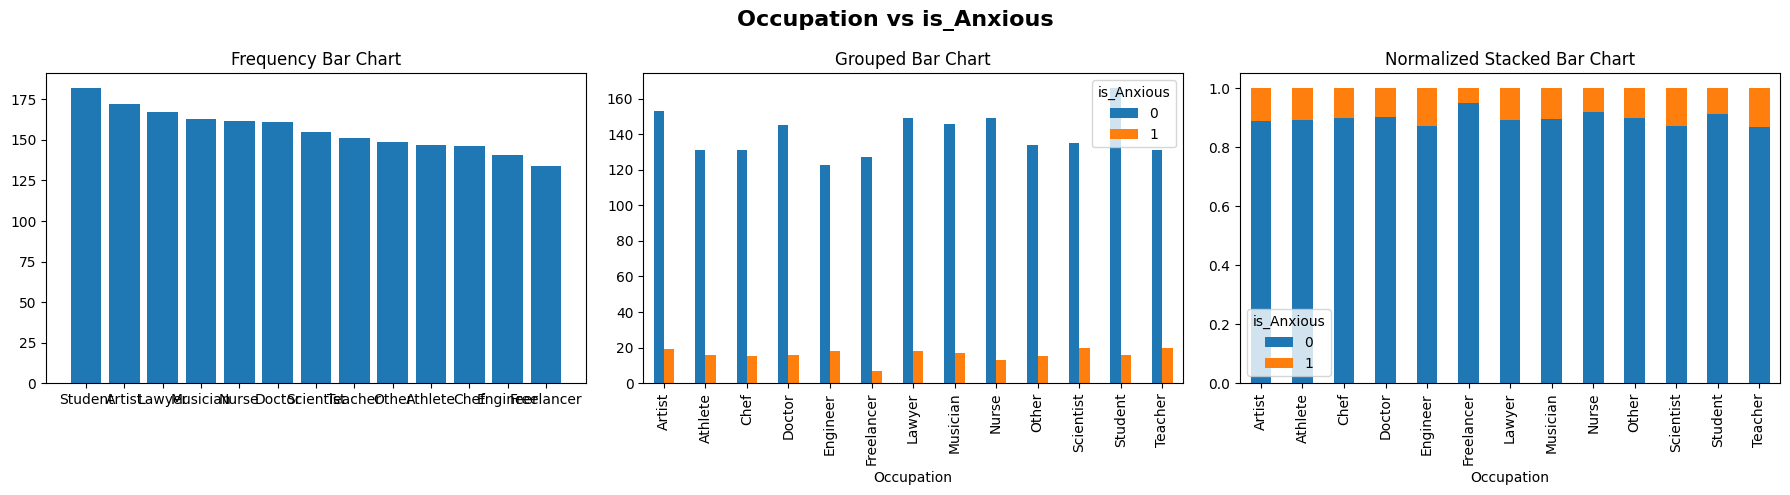

Occupation vs is_Anxious
Chi-square statistic: 8.7717
P Value: 0.7223
Result: Fail to reject the null hypothesis (H0)
→ No significant relationship between variables



'fail to reject the H0'

In [55]:
show_category_data(df, "Occupation", "is_Anxious")
ordinal_chi2(df, "Occupation", "is_Anxious")

In [56]:
mapping = {'Teacher' : 'Educational', 
           'Student':  'Educational', 
           'Scientist':'Professional', 
           'Lawyer':   'Professional', 
           'Nurse':    'Professional',
           'Doctor' :  'Professional',
           'Engineer': 'Professional',
           'Athlete' : 'Sports',
           'Musician': 'Creative',
           'Artist':   'Creative',
           'Chef':     'Creative' ,
           'Other':    'Freelance / Other', 
           'Freelancer': 'Freelance / Other'
      }

reclassifying(df, "Occupation", mapping)

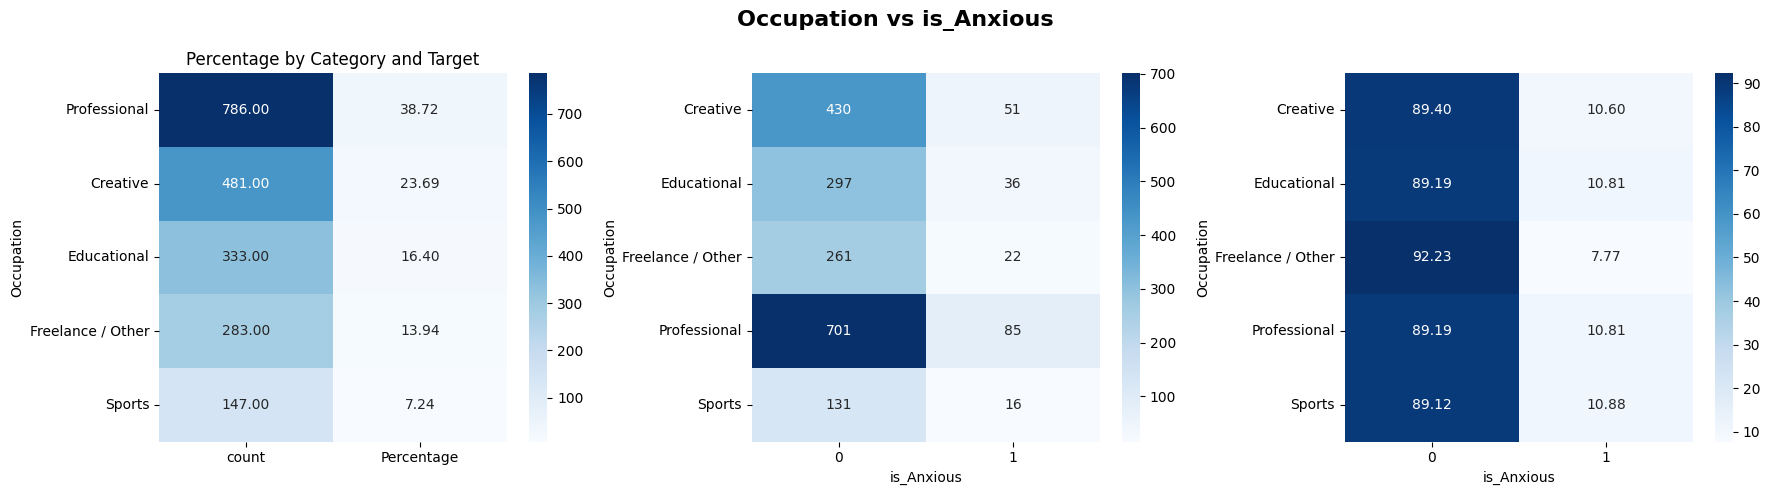

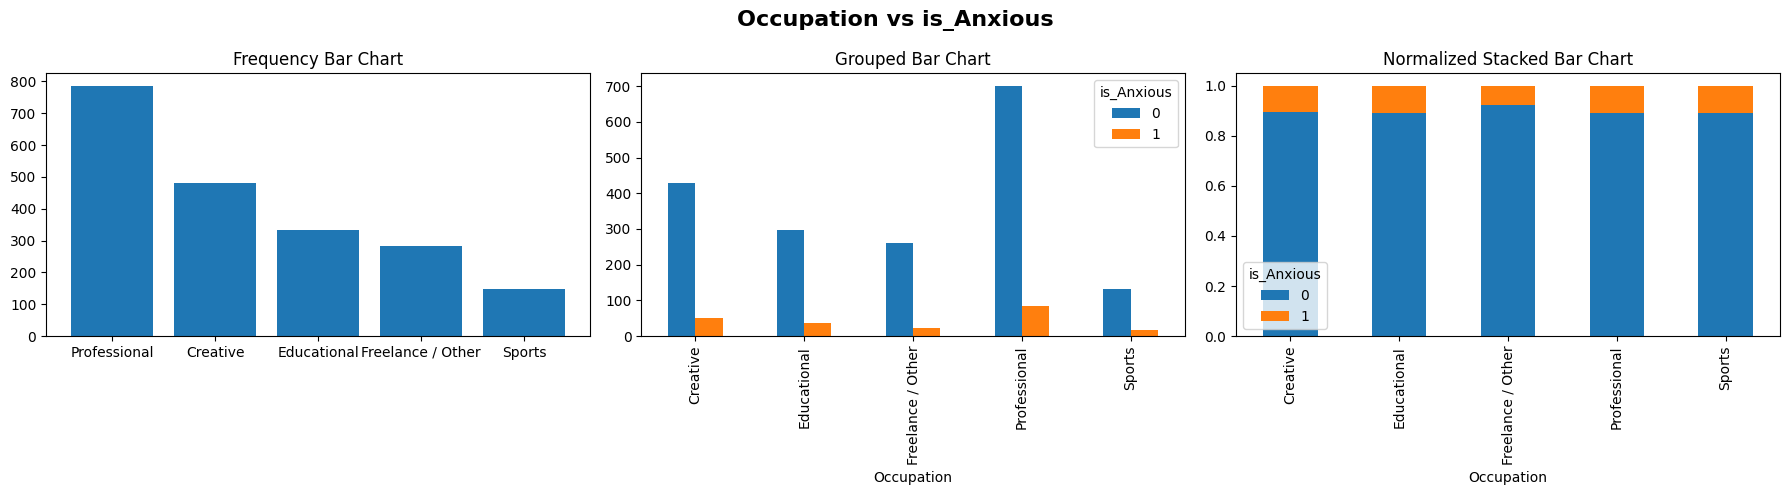

Occupation vs is_Anxious
Chi-square statistic: 2.3623
P Value: 0.6695
Result: Fail to reject the null hypothesis (H0)
→ No significant relationship between variables



'fail to reject the H0'

In [57]:
show_category_data(df, "Occupation", "is_Anxious")
ordinal_chi2(df, "Occupation", "is_Anxious")

#### Smoking

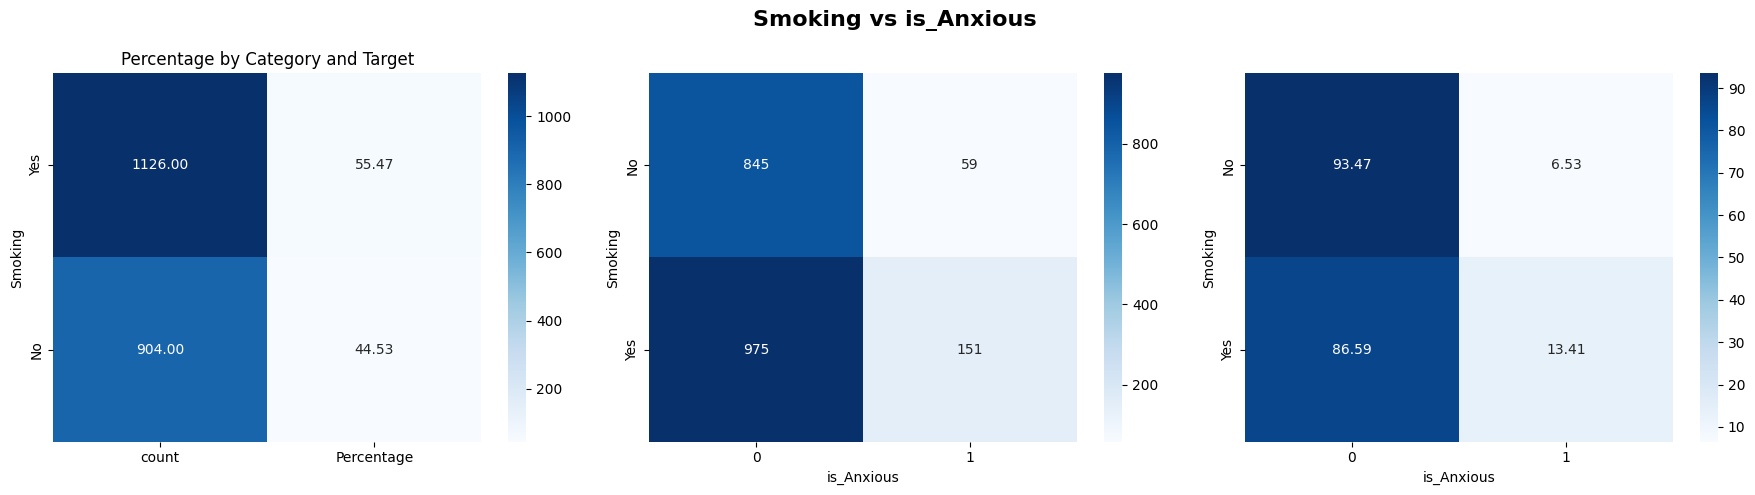

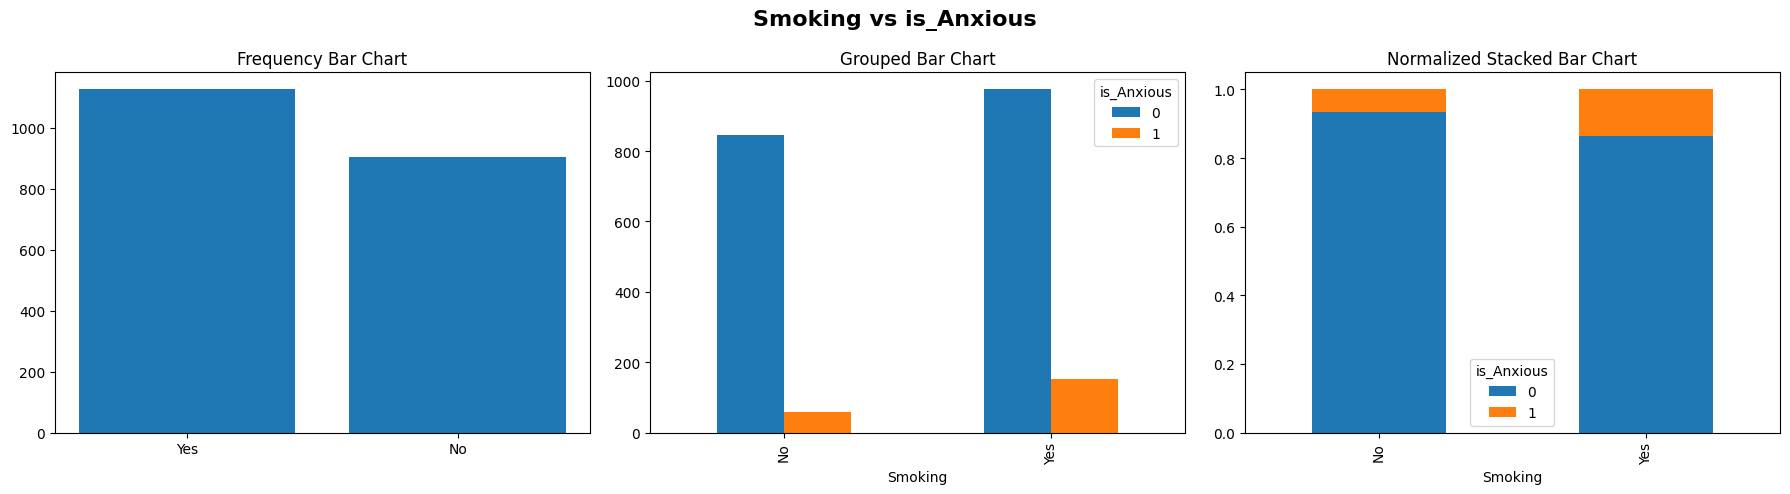

Smoking vs is_Anxious
Chi-square statistic: 24.8822
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [58]:
show_category_data(df, "Smoking", "is_Anxious")
ordinal_chi2(df, "Smoking", "is_Anxious")

#### Family History of Anxiety

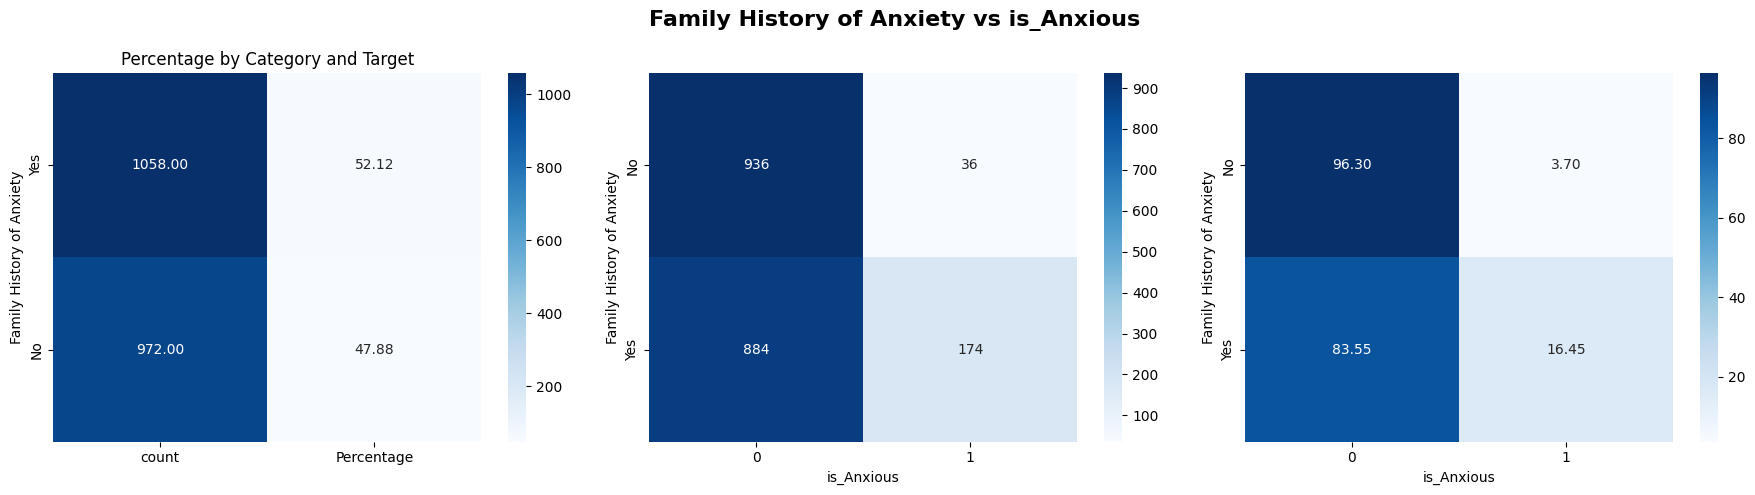

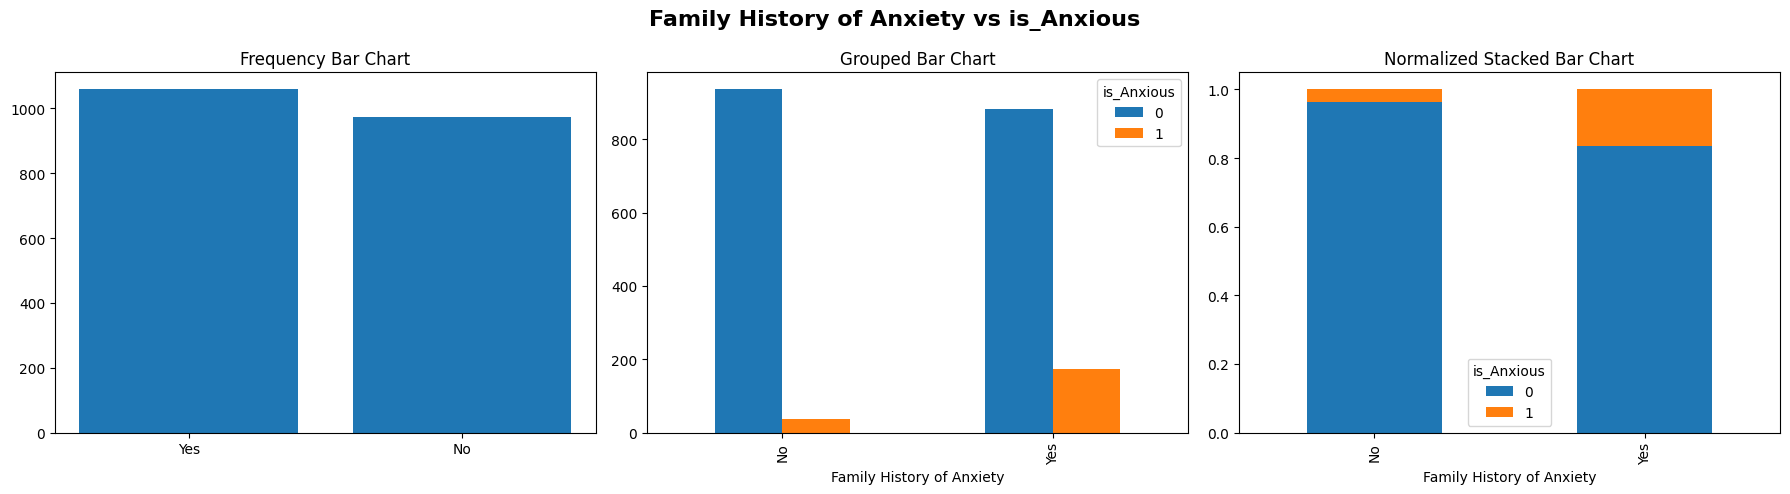

Family History of Anxiety vs is_Anxious
Chi-square statistic: 87.3187
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [59]:
show_category_data(df, "Family History of Anxiety", "is_Anxious")
ordinal_chi2(df, "Family History of Anxiety", "is_Anxious")

#### Dizziness

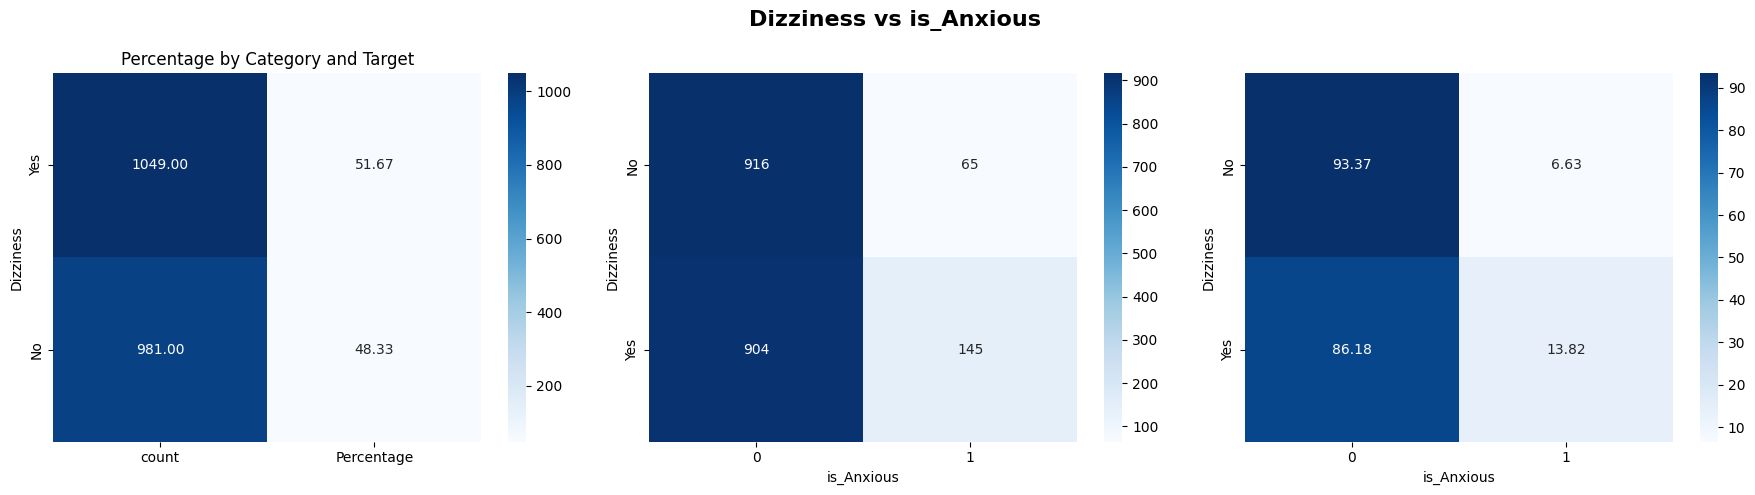

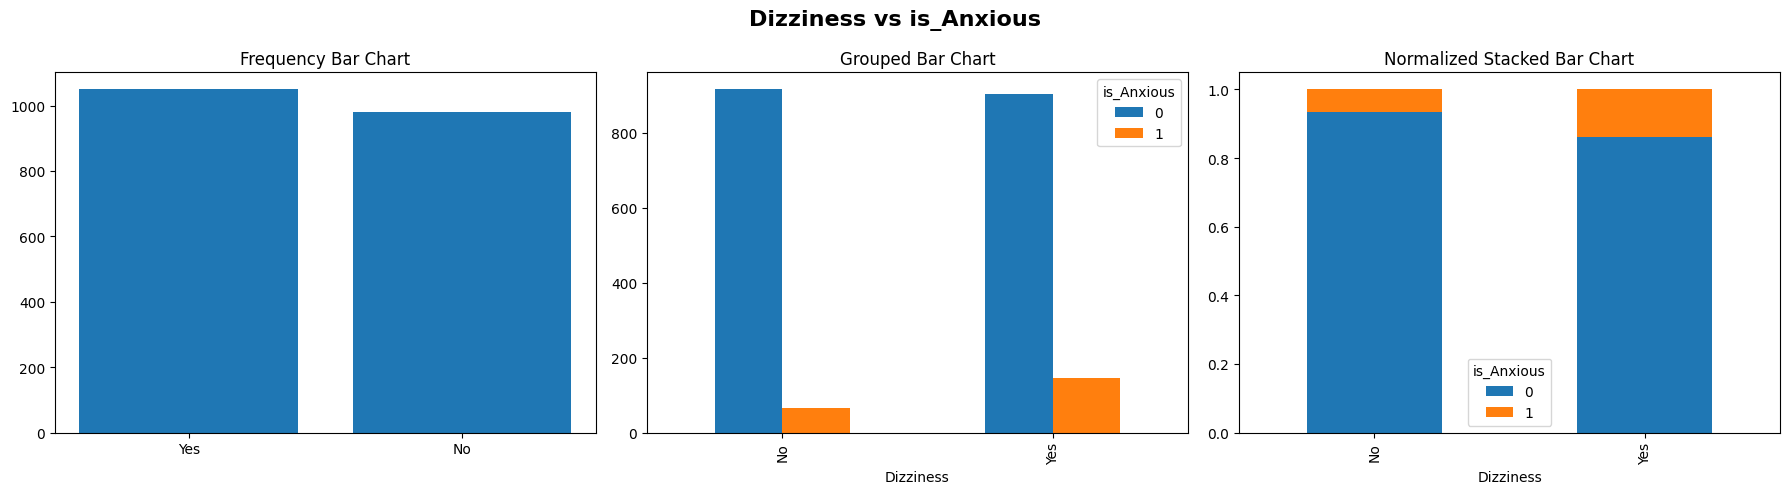

Dizziness vs is_Anxious
Chi-square statistic: 27.5386
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [60]:
show_category_data(df, "Dizziness", "is_Anxious")
ordinal_chi2(df, "Dizziness", "is_Anxious")

#### Medication

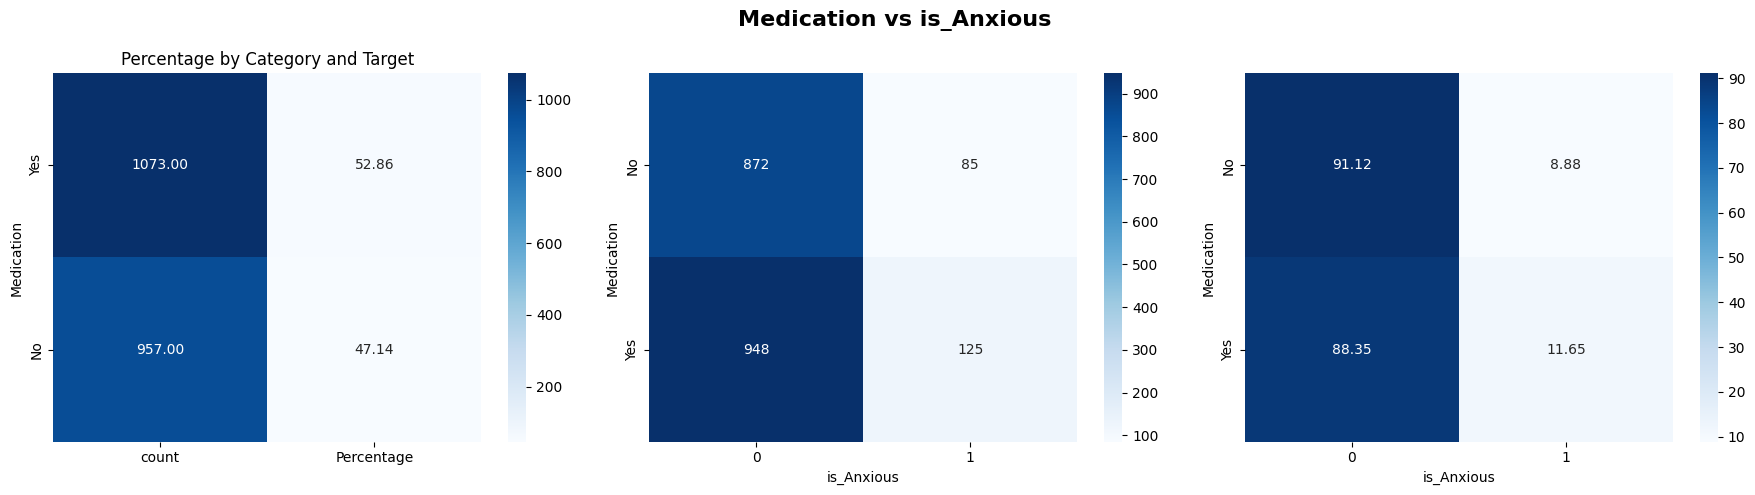

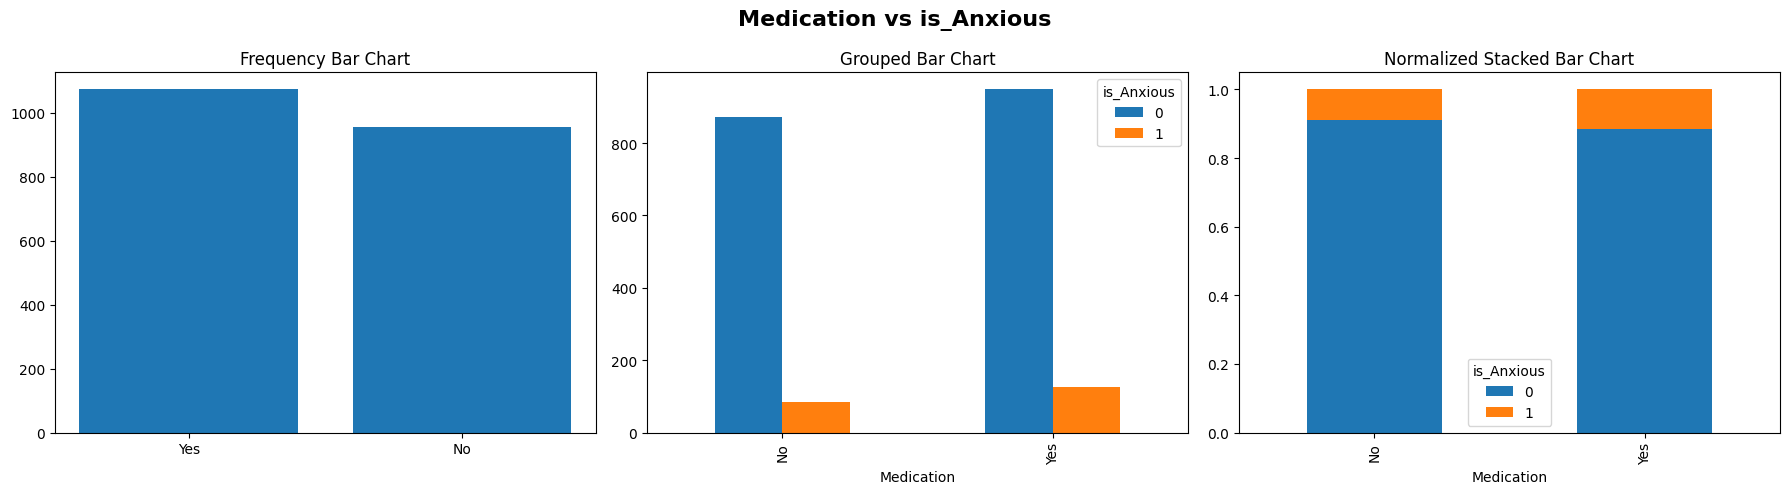

Medication vs is_Anxious
Chi-square statistic: 3.8847
P Value: 0.0487
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [61]:
show_category_data(df, "Medication", "is_Anxious")
ordinal_chi2(df, "Medication", "is_Anxious")

#### Recent Major Life Event

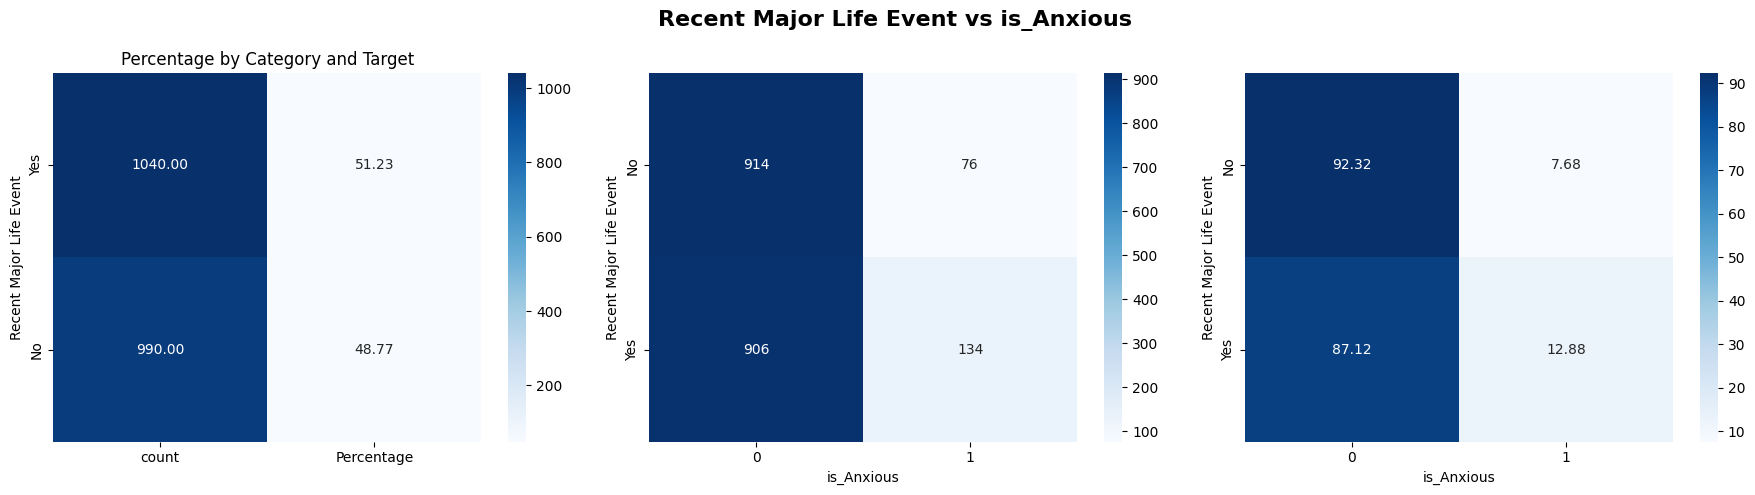

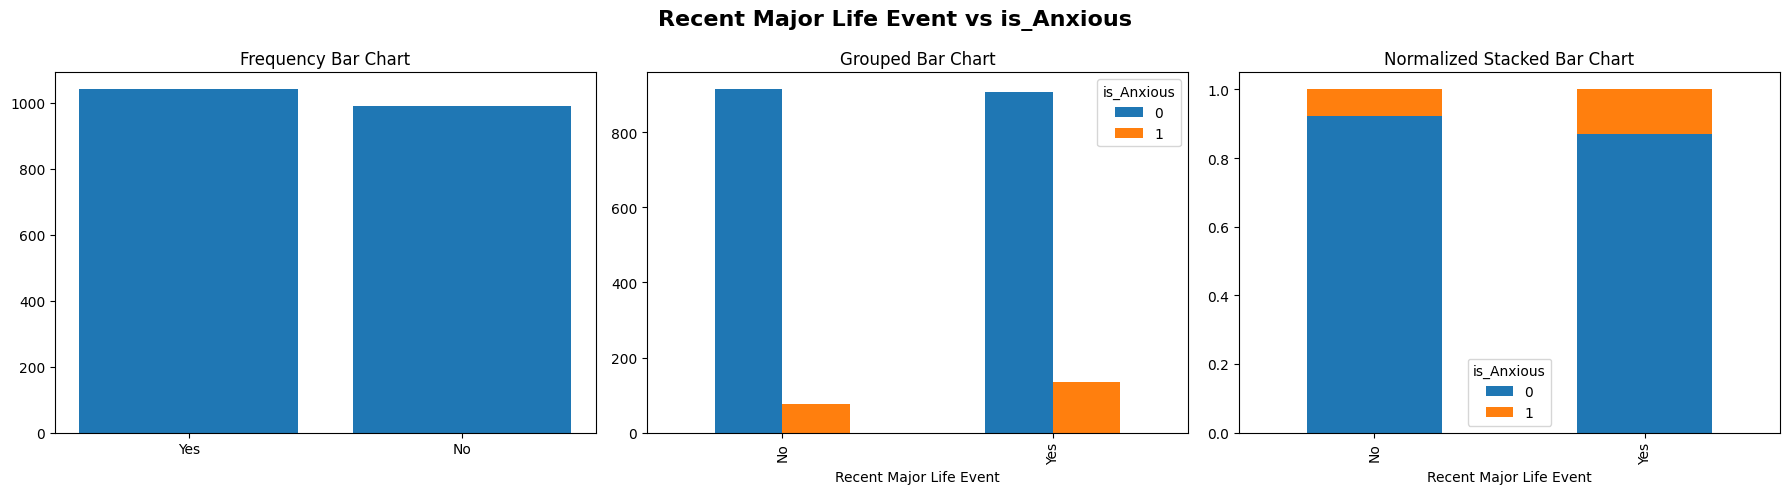

Recent Major Life Event vs is_Anxious
Chi-square statistic: 14.2755
P Value: 0.0002
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [62]:
show_category_data(df, "Recent Major Life Event", "is_Anxious")
ordinal_chi2(df, "Recent Major Life Event", "is_Anxious")

### Display a graph of two categorical variables

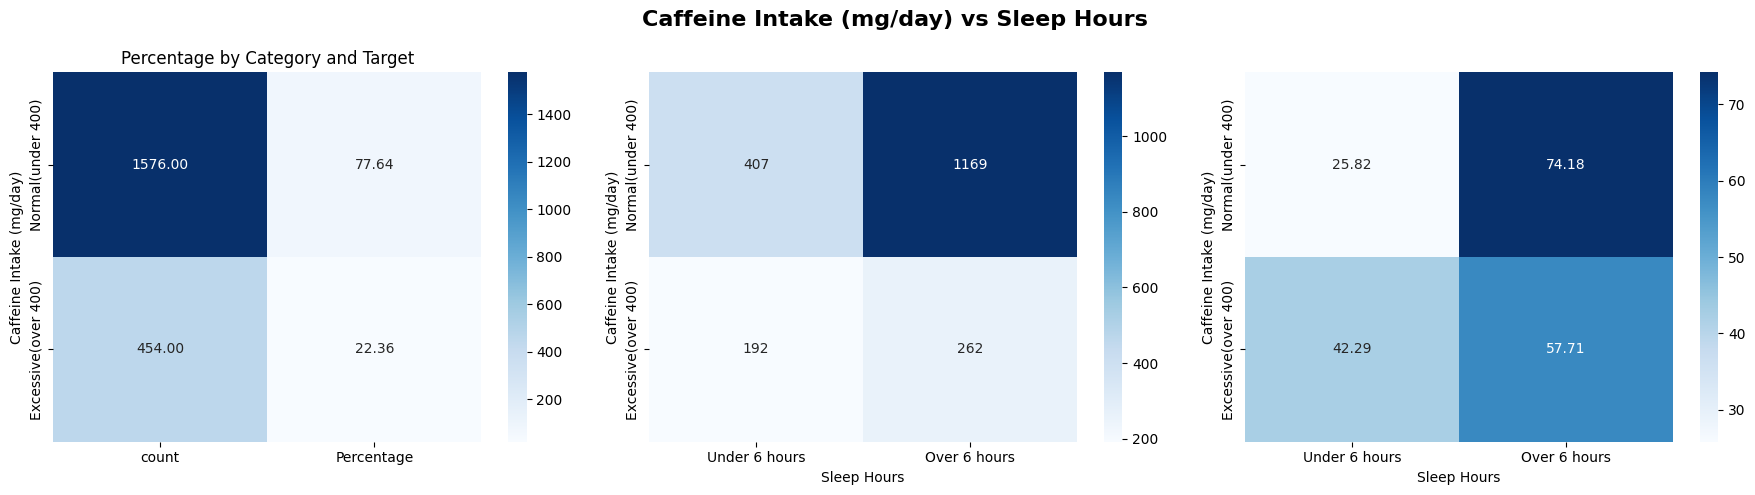

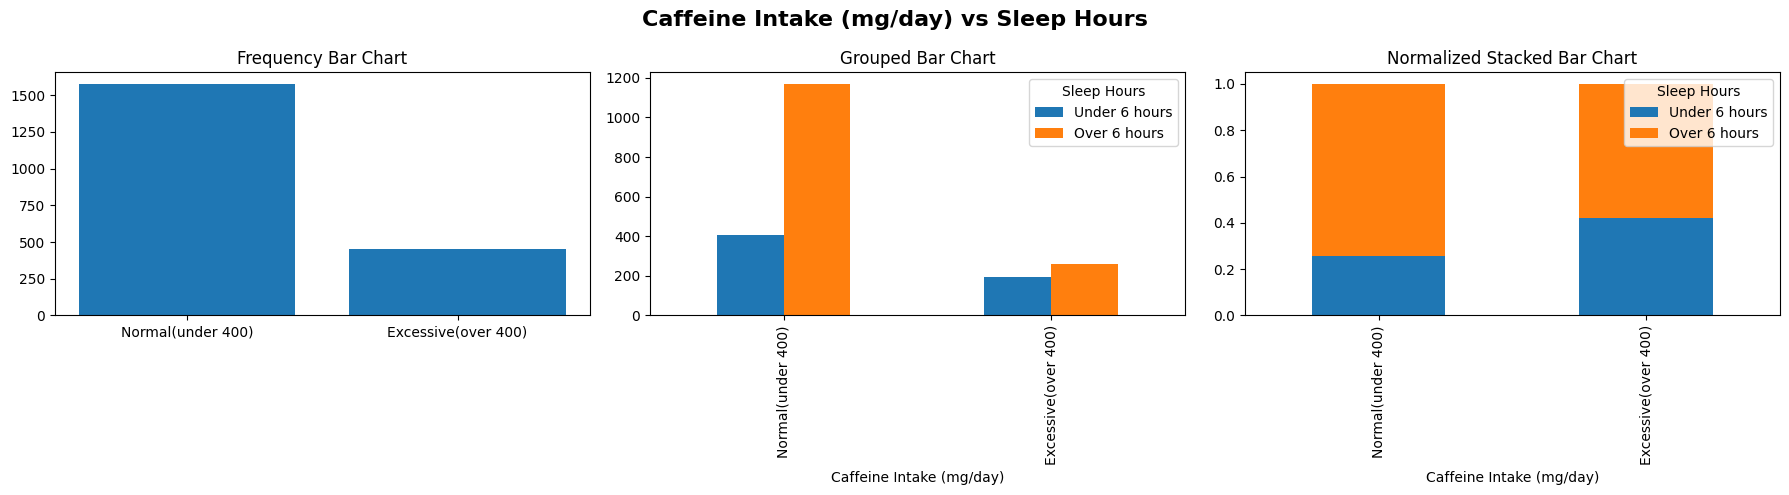

Caffeine Intake (mg/day) vs Sleep Hours
Chi-square statistic: 45.1540
P Value: 0.0000
Result: Reject the null hypothesis (H0)
→ Significant relationship exists between variables



'reject the H0'

In [63]:
show_category_data(df, "Caffeine Intake (mg/day)" , "Sleep Hours")
ordinal_chi2(df, "Caffeine Intake (mg/day)" , "Sleep Hours")

## Feature Engineering (KPIs)

In [64]:
# ============================================================================
# KPI 1: Overall Anxiety Rate
# ============================================================================
anxiety_rate = (df['is_Anxious'].sum() / len(df)) * 100
print(f"Overall Anxiety Rate: {anxiety_rate:.2f}%")
print(f"Total Anxious: {df['is_Anxious'].sum()}")
print(f"Total Not Anxious: {(df['is_Anxious'] == 0).sum()}\n")

# ============================================================================
# KPI 2: Anxiety by Demographics
# ============================================================================
print("---------------------------")
print("Anxiety Rate by Gender:")
gender_anxiety = df.groupby('Gender', observed=False)['is_Anxious'].agg(['sum', 'count'])
gender_anxiety['rate'] = (gender_anxiety['sum'] / gender_anxiety['count'] * 100).round(2)
print(f"{gender_anxiety}\n")

print("---------------------------")
print("Anxiety Rate by Occupation:")
occupation_anxiety = df.groupby('Occupation', observed=False)['is_Anxious'].agg(['sum', 'count'])
occupation_anxiety['rate'] = (occupation_anxiety['sum'] / occupation_anxiety['count'] * 100).round(2)
print(f"{occupation_anxiety}\n")

# ============================================================================
# KPI 3: Lifestyle Factors Impact
# ============================================================================
print("---------------------------")
print("Anxiety Rate by Sleep Hours Category:")
sleep_anxiety = df.groupby('Sleep Hours', observed=False)['is_Anxious'].agg(['sum', 'count'])
sleep_anxiety['rate'] = (sleep_anxiety['sum'] / sleep_anxiety['count'] * 100).round(2)
print(f"{sleep_anxiety}\n")

print("---------------------------")
print("Anxiety Rate by Physical Activity Level:")
activity_anxiety = df.groupby('Physical Activity (hrs/week)', observed=False)['is_Anxious'].agg(['sum', 'count'])
activity_anxiety['rate'] = (activity_anxiety['sum'] / activity_anxiety['count'] * 100).round(2)
print(f"{activity_anxiety}\n")

# ============================================================================
# KPI 4: Medical Factors Impact
# ============================================================================
print("---------------------------")
print("Anxiety Rate by Heart Rate Category:")
hr_bins = [0, 70, 85, 100, 150]
#df['HR_Category'] = pd.cut(df['Heart Rate (bpm)'], bins=hr_bins, labels=['Low', 'Normal', 'Elevated', 'High'])
hr_anxiety = df.groupby('Heart Rate (bpm)', observed=False)['is_Anxious'].agg(['sum', 'count'])
hr_anxiety['rate'] = (hr_anxiety['sum'] / hr_anxiety['count'] * 100).round(2)
print(f"{hr_anxiety}\n")

# ============================================================================
# KPI 5: Risk Factors Analysis
# ============================================================================
print("---------------------------")
print("Anxiety Rate by Smoking Status:")
smoking_anxiety = df.groupby('Smoking', observed=False)['is_Anxious'].agg(['sum', 'count'])
smoking_anxiety['rate'] = (smoking_anxiety['sum'] / smoking_anxiety['count'] * 100).round(2)
print(f"{smoking_anxiety}\n")

print("---------------------------")
print("Anxiety Rate by Family History of Anxiety:")
family_anxiety = df.groupby('Family History of Anxiety', observed=False)['is_Anxious'].agg(['sum', 'count'])
family_anxiety['rate'] = (family_anxiety['sum'] / family_anxiety['count'] * 100).round(2)
print(f"{family_anxiety}\n")

print("---------------------------")
print("Anxiety Rate by Medication Usage:")
med_anxiety = df.groupby('Medication', observed=False)['is_Anxious'].agg(['sum', 'count'])
med_anxiety['rate'] = (med_anxiety['sum'] / med_anxiety['count'] * 100).round(2)
print(f"{med_anxiety}\n")

# ============================================================================
# KPI 6: Therapy Impact
# ============================================================================
print("---------------------------")
print("Anxiety Rate by Therapy Sessions Per Month:")
therapy_anxiety = df.groupby('Therapy Sessions (per month)', observed=False)['is_Anxious'].agg(['sum', 'count'])
therapy_anxiety['rate'] = (therapy_anxiety['sum'] / therapy_anxiety['count'] * 100).round(2)
print(f"{therapy_anxiety}\n")

Overall Anxiety Rate: 10.34%
Total Anxious: 210
Total Not Anxious: 1820

---------------------------
Anxiety Rate by Gender:
        sum  count   rate
Gender                   
Female   73    776   9.41
Male     71    627  11.32
Other    66    627  10.53

---------------------------
Anxiety Rate by Occupation:
                   sum  count   rate
Occupation                          
Creative            51    481  10.60
Educational         36    333  10.81
Freelance / Other   22    283   7.77
Professional        85    786  10.81
Sports              16    147  10.88

---------------------------
Anxiety Rate by Sleep Hours Category:
               sum  count   rate
Sleep Hours                     
Under 6 hours  189    599  31.55
Over 6 hours    21   1431   1.47

---------------------------
Anxiety Rate by Physical Activity Level:
                              sum  count   rate
Physical Activity (hrs/week)                   
Under 3 hrs/week              199   1130  17.61
Over 3 hrs/week 


ANXIETY RATE VISUALIZATIONS



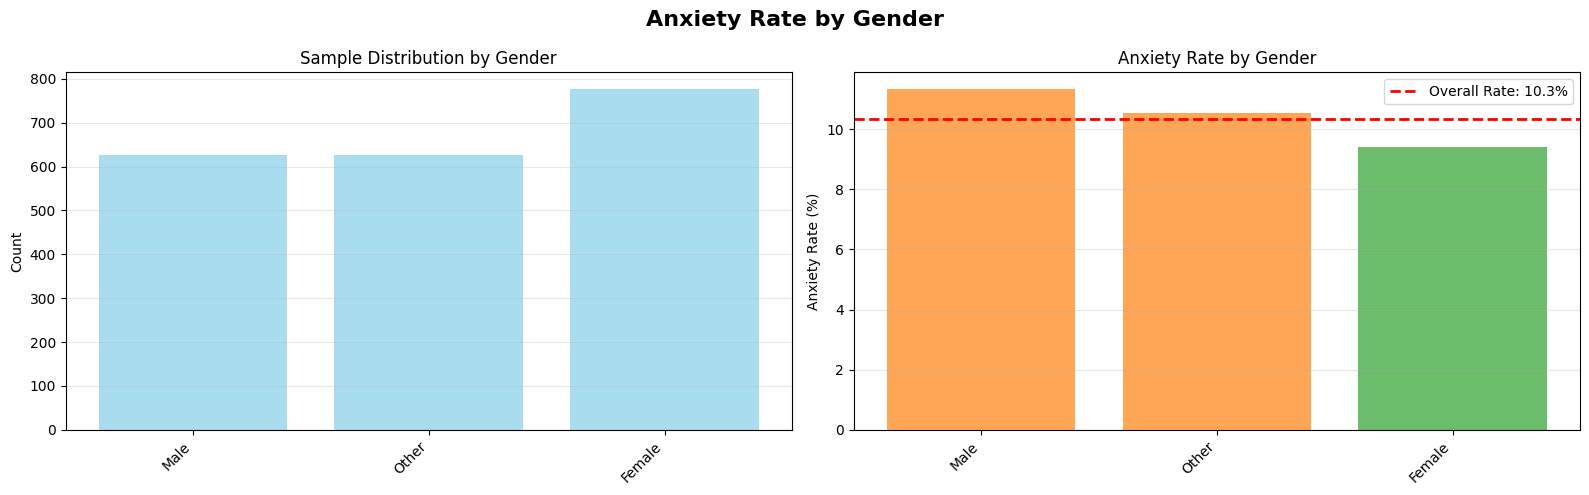

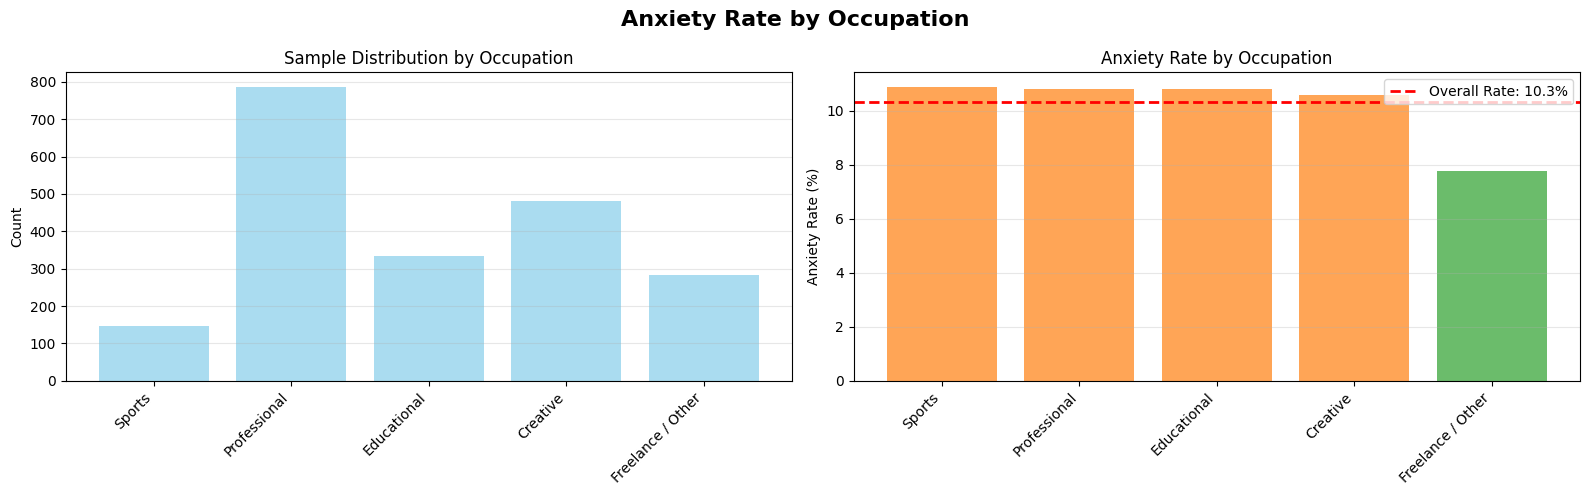

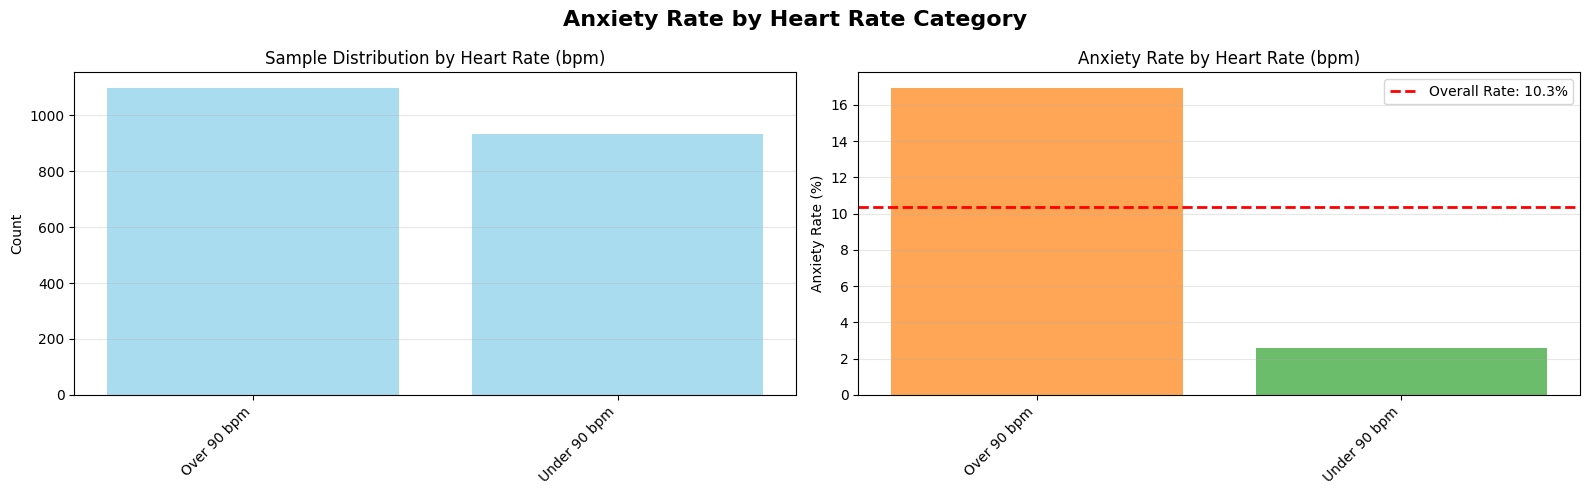

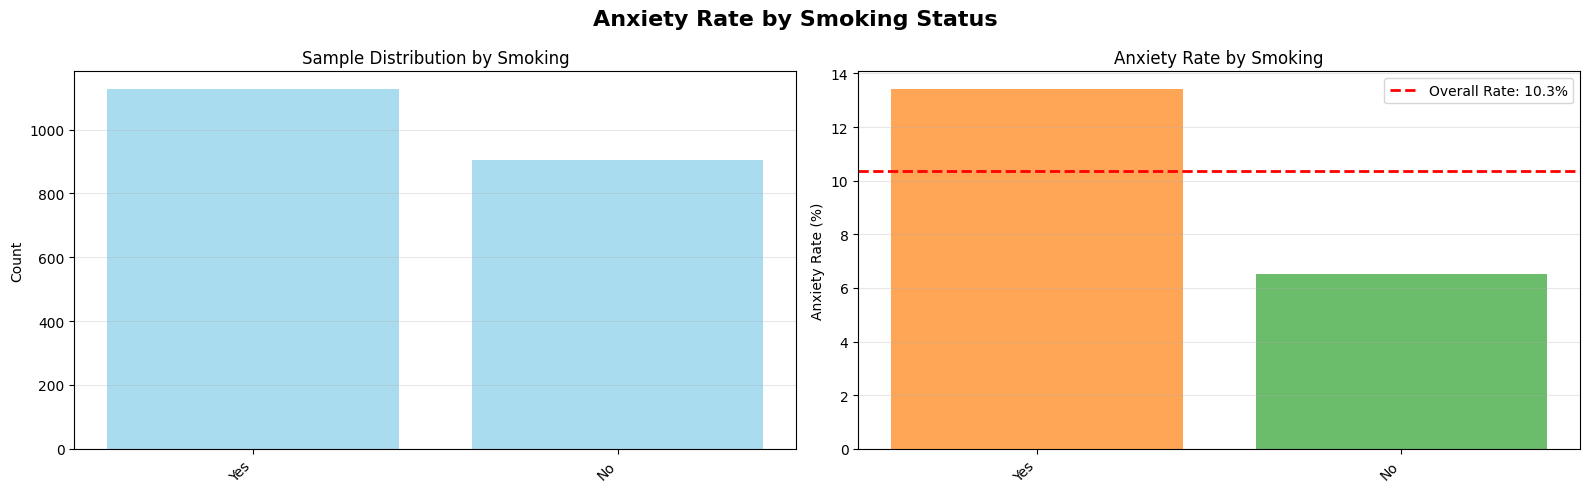

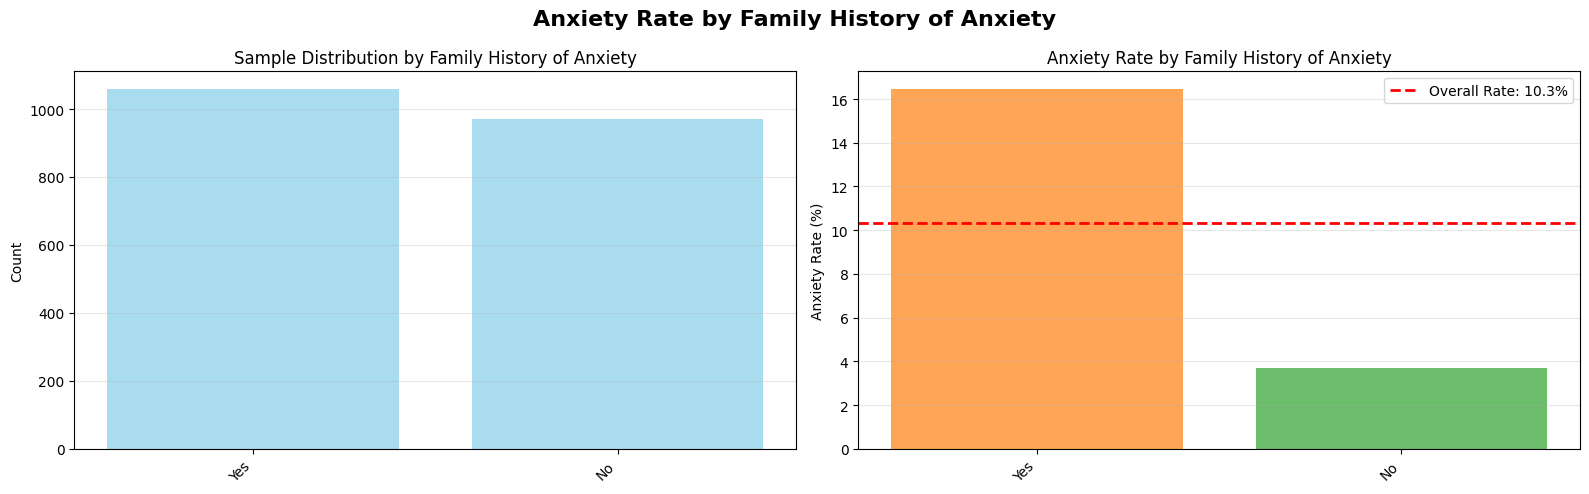

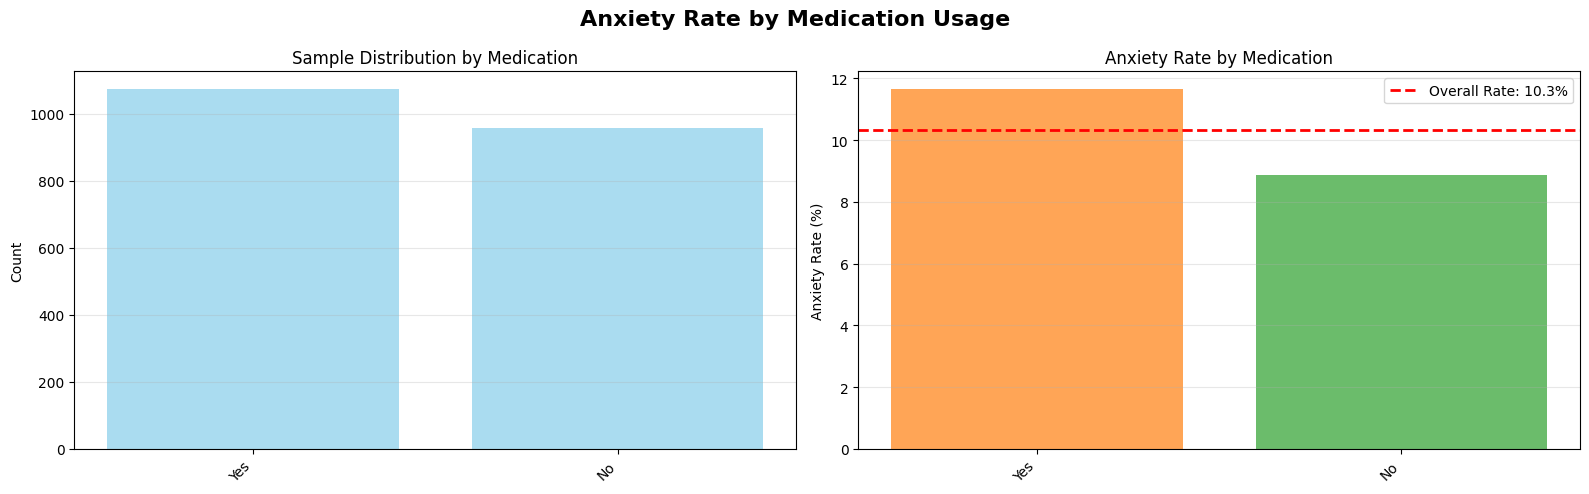

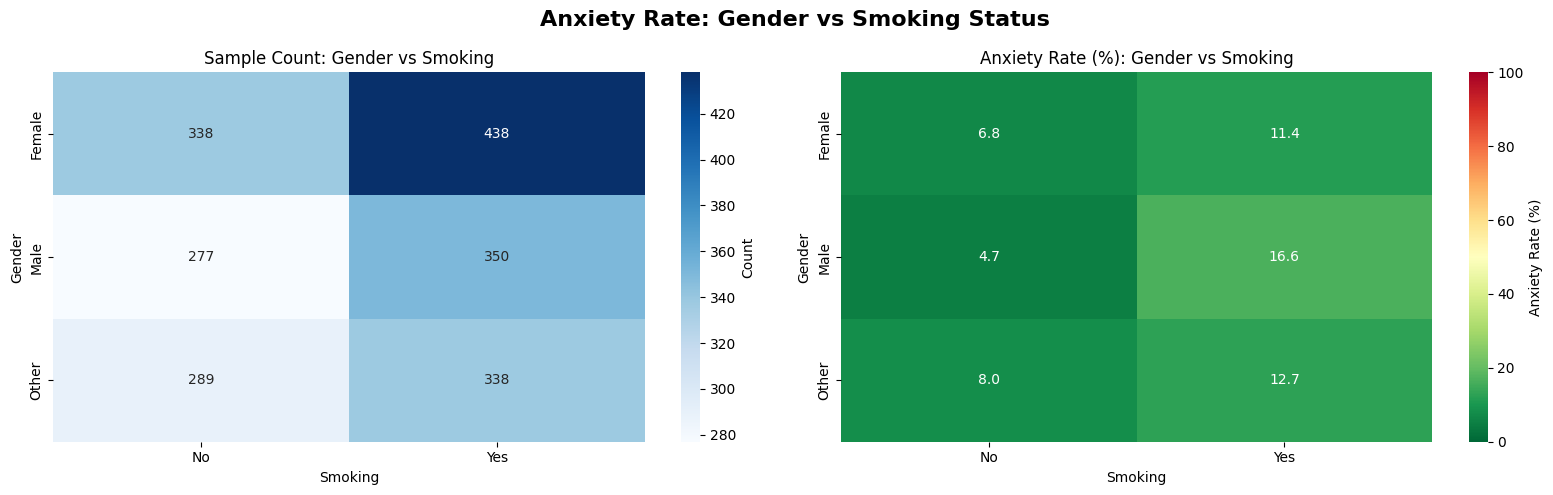

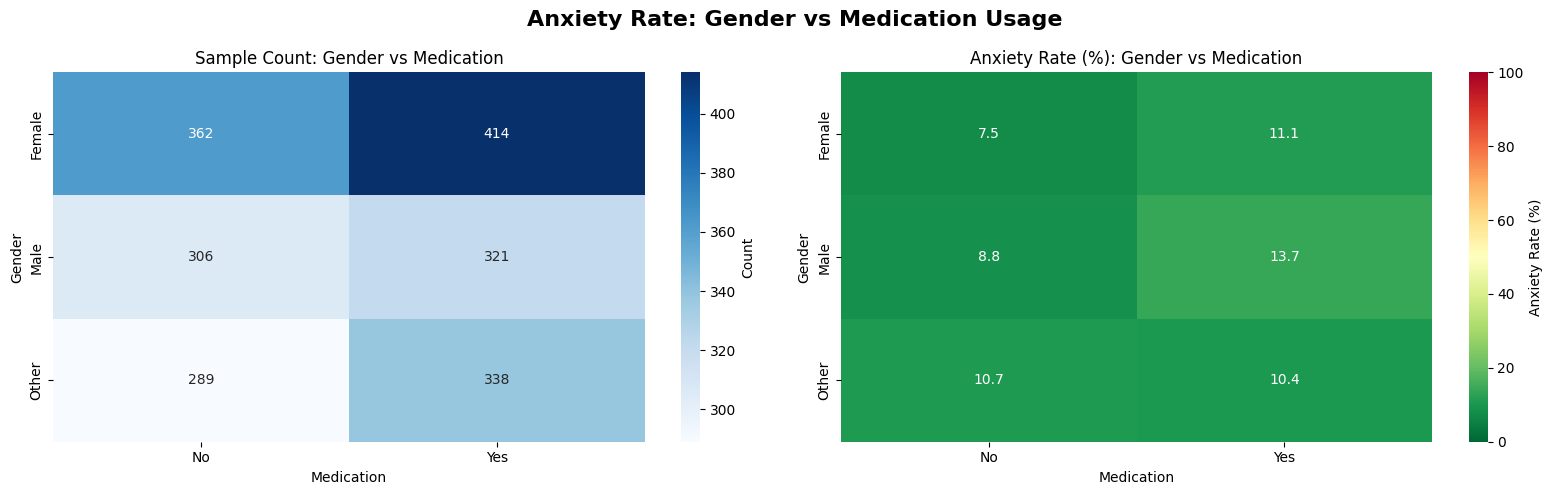

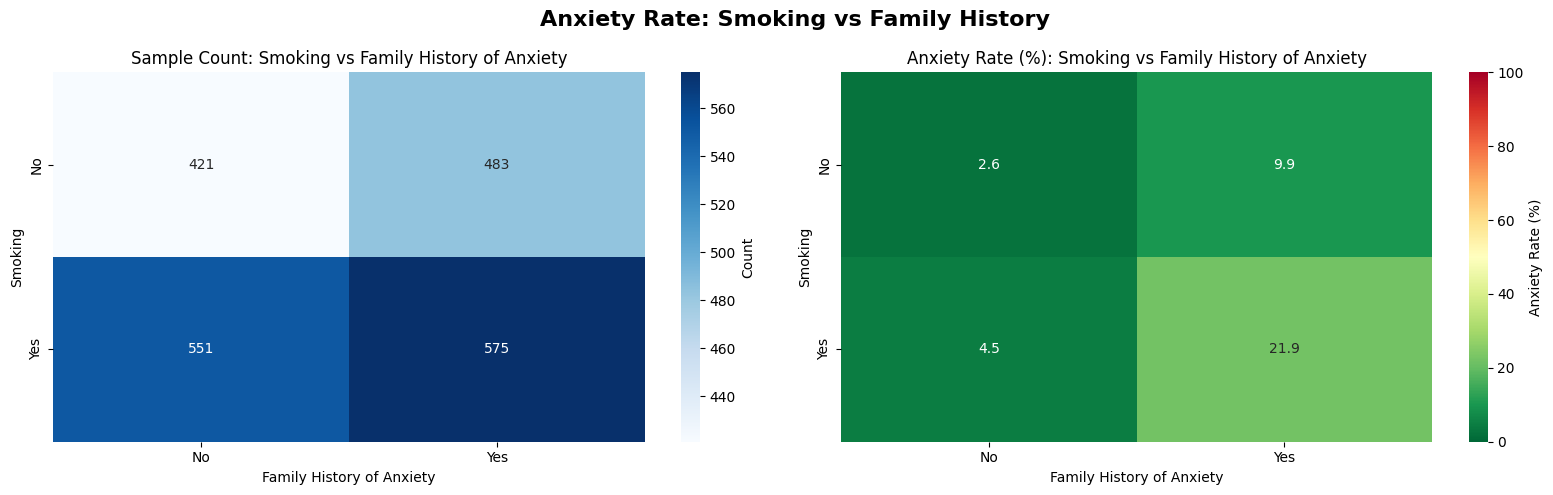

In [65]:
# ============================================================================
# KPI Visualization Functions
# ============================================================================

def plot_anxiety_rate_by_category(data, category, title):
    """
    Plot anxiety rate by category
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    fig.suptitle(title, fontsize=16, fontweight="bold")
    
    # Calculate anxiety rates
    anxiety_by_cat = data.groupby(category, observed=False)['is_Anxious'].agg(['sum', 'count'])
    anxiety_by_cat['rate'] = (anxiety_by_cat['sum'] / anxiety_by_cat['count'] * 100)
    anxiety_by_cat = anxiety_by_cat.sort_values('rate', ascending=False)
    
    # Plot 1: Count Bar Chart
    x_pos = range(len(anxiety_by_cat))
    axes[0].bar(x_pos, anxiety_by_cat['count'], color='skyblue', alpha=0.7, label='Total Count')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(anxiety_by_cat.index, rotation=45, ha='right')
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Sample Distribution by {category}')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Plot 2: Anxiety Rate Bar Chart
    colors = ['#ff7f0e' if x > anxiety_rate else '#2ca02c' for x in anxiety_by_cat['rate']]
    axes[1].bar(x_pos, anxiety_by_cat['rate'], color=colors, alpha=0.7)
    axes[1].axhline(y=anxiety_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Rate: {anxiety_rate:.1f}%')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(anxiety_by_cat.index, rotation=45, ha='right')
    axes[1].set_ylabel('Anxiety Rate (%)')
    axes[1].set_title(f'Anxiety Rate by {category}')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return anxiety_by_cat


def plot_heatmap_anxiety_cross(data, col1, col2, title):
    """
    Plot anxiety rate as heatmap for two categories
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    fig.suptitle(title, fontsize=16, fontweight="bold")
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(data[col1], data[col2], data['is_Anxious'], aggfunc='sum')
    cross_count = pd.crosstab(data[col1], data[col2])
    cross_rate = (cross_tab / cross_count * 100).fillna(0)
    
    # Plot 1: Count heatmap
    sns.heatmap(cross_count, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
    axes[0].set_title(f'Sample Count: {col1} vs {col2}')
    
    # Plot 2: Anxiety rate heatmap
    sns.heatmap(cross_rate, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=axes[1], cbar_kws={'label': 'Anxiety Rate (%)'}, vmin=0, vmax=100)
    axes[1].set_title(f'Anxiety Rate (%): {col1} vs {col2}')
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# Generate KPI Visualizations
# ============================================================================

print("\n" + "="*80)
print("ANXIETY RATE VISUALIZATIONS")
print("="*80 + "\n")

# KPI 1: Anxiety Rate by Gender
plot_anxiety_rate_by_category(df, 'Gender', 'Anxiety Rate by Gender')

# KPI 2: Anxiety Rate by Occupation
plot_anxiety_rate_by_category(df, 'Occupation', 'Anxiety Rate by Occupation')

# KPI 3: Anxiety Rate by Heart Rate Category
plot_anxiety_rate_by_category(df, 'Heart Rate (bpm)', 'Anxiety Rate by Heart Rate Category')

# KPI 4: Anxiety Rate by Smoking Status
plot_anxiety_rate_by_category(df, 'Smoking', 'Anxiety Rate by Smoking Status')

# KPI 5: Anxiety Rate by Family History
plot_anxiety_rate_by_category(df, 'Family History of Anxiety', 'Anxiety Rate by Family History of Anxiety')

# KPI 6: Anxiety Rate by Medication
plot_anxiety_rate_by_category(df, 'Medication', 'Anxiety Rate by Medication Usage')

# KPI 7: Cross-tabulation Heatmaps
plot_heatmap_anxiety_cross(df, 'Gender', 'Smoking', 'Anxiety Rate: Gender vs Smoking Status')
plot_heatmap_anxiety_cross(df, 'Gender', 'Medication', 'Anxiety Rate: Gender vs Medication Usage')
plot_heatmap_anxiety_cross(df, 'Smoking', 'Family History of Anxiety', 'Anxiety Rate: Smoking vs Family History')